# <font color='056938'> **Caso de estudio aprendizaje no supervisado**

**Grupo 3:**
* Ximena Castañeda Ruiz
* Sara Sandoval Alvarez
* Catalina Betancur Higuita
* Juan Manuel Arredondo

 # **Planteamiento del problema**

En el contexto actual, las empresas buscan comprender a sus clientes más allá de simples métricas de ventas o demográficas. El comportamiento de compra, las características socioeconómicas y las preferencias personales varían significativamente entre individuos, lo que dificulta diseñar estrategias de marketing efectivas de manera uniforme.

El problema principal es que la empresa no cuenta con una segmentación clara de sus clientes, lo que limita su capacidad para:

* Personalizar campañas de marketing.

* Identificar oportunidades de venta cruzada y fidelización.

* Optimizar la oferta de productos según las necesidades de distintos grupos de clientes.

Ante esta situación, surge la necesidad de identificar grupos de clientes con características similares basados en variables demográficas, financieras y de comportamiento de consumo. El desafío consiste en descubrir patrones ocultos en los datos que permitan segmentar la base de clientes de manera que cada grupo pueda recibir estrategias de marketing más ajustadas y efectivas.

Este planteamiento abre la puerta a aplicar técnicas de aprendizaje no supervisado, como clustering, para:

* Detectar grupos homogéneos de clientes.

* Comprender las diferencias entre ellos en términos de ingresos, edad, educación, comportamiento de compra y respuesta a campañas.

* Utilizar estos insights para diseñar estrategias de marketing personalizadas y más efectivas.

La segmentación se realizará sobre el dataset Customer Personality Analysis, el cual contiene la siguiente información:

**Datos**

**Atributos**

**Gente**

*   ID: Identificador único del cliente
*   Year_Birth: Año de nacimiento del cliente
*   Educación: Nivel de educación del cliente
*   Estado civil: Estado civil del cliente
*   Ingresos: Ingresos familiares anuales del cliente
*   Kidhome: Número de niños en el hogar del cliente
*   Teenhome: Número de adolescentes en el hogar del cliente
*   Dt_Customer: Fecha de alta del cliente en la empresa
*   Recency: Número de días desde la última compra del cliente
*   Queja: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

**Productos**

*   MntWines: Cantidad gastada en vino en los últimos 2 años
*   MntFruits: Cantidad gastada en frutas en los últimos 2 años
*   MntMeatProducts: Cantidad gastada en carne en los últimos 2 años
*   MntFishProducts: Cantidad gastada en pescado en los últimos 2 años
*   MntSweetProducts: Cantidad gastada en dulces en los últimos 2 años
*   MntGoldProds: Cantidad gastada en oro en los últimos 2 años

**Promoción**

*   NumDealsPurchases: Número de compras realizadas con descuento
*   AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1.ª campaña, 0 en caso contrario
*   AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2da campaña, 0 en caso *   contrario
*   AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3.ª campaña, 0 en caso contrario
*   AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ta campaña, 0 en caso contrario
*   AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ta campaña, 0 en caso contrario
*   Respuesta: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

**Lugar**

*   NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa
*   NumCatalogPurchases: Número de compras realizadas mediante un catálogo
*   NumStorePurchases: Número de compras realizadas directamente en tiendas
*   NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes

**Dataset:** https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

## **Librerias Necesarias**

In [119]:
!pip install kneed

In [120]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', None)

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Librerías de preprocesamiento
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Librerías de modelado
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors

# Librerías para análisis estadístico
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Librerías para clustering jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Librerías auxiliares
from kneed import KneeLocator
from collections import Counter
import itertools
import math
import warnings
warnings.filterwarnings("ignore")

## **Cargar base de datos**

In [121]:
# Lectura del dataset
df = pd.read_csv("https://raw.githubusercontent.com/sarasandoval/Customer-Personality-Analysis/refs/heads/main/marketing_campaign.csv", sep='\t' )
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# **Limpieza y transformación de los datos**

La columna Dt_Customer se convirtió al formato de fecha estándar (YYYY-MM-DD) para facilitar cálculos temporales.

In [122]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
current_date = pd.to_datetime(datetime.now().date())

In [123]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# **Variables complementarias**

**Customer_Days**

Se creó la variable `Customer_Days` con el propósito de medir la antigüedad del cliente en la empresa, calculando el número de días transcurridos desde su fecha de registro (`Dt_Customer`) hasta la fecha actual.

Esta nueva métrica complementa la variable Recency, que refleja el tiempo desde la última compra, permitiendo analizar de manera más integral el comportamiento del cliente.

In [124]:
df['Customer_Days'] = (current_date - df['Dt_Customer']).dt.days
df[['ID', 'Dt_Customer',  'Customer_Days']].head()

ID Dt_Customer  Customer_Days
0  5524  2012-09-04           4802
1  2174  2014-03-08           4252
2  4141  2013-08-21           4451
3  6182  2014-02-10           4278
4  5324  2014-01-19           4300

**Age**

Se utilizo la variable `Year_Birth` para obtener la edad actual con el fin de tener una medida más interpretable y útil en el análisis, ya que la edad permite identificar patrones de comportamiento entre grupos de clientes.

In [125]:
df['Age'] = datetime.now().year - df['Year_Birth']

**Total Spent**

Se creó la variable `Total_Spent` como la suma de los gastos realizados por cada cliente en todas las categorías de productos: vinos, frutas, carnes, pescado, dulces y productos de oro.

Esta nueva métrica permite obtener una medida global del comportamiento de consumo

In [126]:
df['Total_Spent'] = df[['MntWines','MntFruits','MntMeatProducts',
                            'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

## **Datos duplicados**

En esta etapa del preprocesamiento, se busca identificar registros duplicados dentro de las bases de datos. La presencia de duplicados puede afectar la calidad del análisis, generando sesgos en los resultados o inflando la representatividad de ciertos casos. Para ello, se utilizó el método .duplicated() de pandas, que permite detectar filas repetidas en su totalidad.

In [127]:
df.duplicated().sum()

np.int64(0)

In [128]:
duplicadas = df.T.duplicated() # identificar columnas duplicadas
print(duplicadas)

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
Customer_Days          False
Age                    False
Total_Spent            False
dtype: bool


Encontramos que no hay datos duplicados en la base de datos.

## **Datos faltantes**

En todo proyecto basado en análisis de datos reales, es común enfrentarse a la presencia de valores faltantes (nulos, vacíos o desconocidos). Ignorar estos valores puede tener consecuencias importantes sobre la calidad y validez de los resultados. Por esta razón, se consideró esencial realizar un tratamiento de los datos faltantes

Identificamos la cantidad de valores nulos (faltantes) por cada columna en el DataFrame.

In [129]:
df.isnull().sum().sort_values(ascending=False).head()

Income            24
ID                 0
Education          0
Year_Birth         0
Marital_Status     0
dtype: int64

### **Tratamiento de datos faltantes**

**Columna `Income`**

Se identificaron valores faltantes en la variable Income, que representa el nivel de ingresos de los clientes.
En lugar de eliminar registros, se aplicó imputación con la mediana, ya que esta medida no se ve afectada por valores atípicos y refleja mejor el ingreso típico de la mayoría de clientes.

In [130]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [131]:
df.isnull().sum().sort_values(ascending=False).head(6)

ID                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
Kidhome           0
dtype: int64

In [132]:
df.describe().T

count                           mean  \
ID                   2240.0                    5592.159821   
Year_Birth           2240.0                    1968.805804   
Income               2240.0                   52237.975446   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-07-10 10:01:42.857142784   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                       4.084821   
NumCatalogPurchases  2240.0                       2.662054   
NumStorePurchases    2240.0                       5.790179   
NumWebVisitsMonth    2240.0                       5.316518   
AcceptedCmp3         2240.0                       0.072768   
AcceptedCmp4         2240.0                       0.074554   
AcceptedCmp5         2240.0                       0.072768   
AcceptedCmp1         2240.0                       0.064286   
AcceptedCmp2         2240.0                       0.013393   
Complain             2240.0                       0.009375   
Z_CostContact        2240.0                            3.0   
Z_Revenue            2240.0                           11.0   
Response             2240.0                       0.149107   
Customer_Days        2240.0                    4492.582143   
Age                  2240.0                      56.194196   
Total_Spent          2240.0                     605.798214   

                                     min                  25%  \
ID                                   0.0              2828.25   
Year_Birth                        1893.0               1959.0   
Income                            1730.0             35538.75   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2013-01-16 00:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                23.75   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
AcceptedCmp3                         0.0                  0.0   
AcceptedCmp4                         0.0                  0.0   
AcceptedCmp5                         0.0                  0.0   
AcceptedCmp1                         0.0                  0.0   
AcceptedCmp2                         0.0                  0.0   
Complain                             0.0                  0.0   
Z_CostContact                        3.0                  3.0   
Z_Revenue                           11.0                 11.0   
Response                             0.0                  0.0   
Customer_Days                     4139.0              4319.75   
Age                                 29.0                 48.0   
Total_Spent                          5.0                68.75   

                                     50%                  75%  \
ID                

# **Análisis exploratorio de los datos**

 ***Revisión general del dataset***

 Se revisan las dimensiones, los tipos de variables y un resumen estadístico del dataset resultante (df). Esto permite identificar la cantidad de registros y columnas, así como verificar la naturaleza de cada campo (numérico, categórico u ordinal).
De esta forma se obtiene una primera visión de la calidad de los datos y posibles anomalías como valores atípicos o codificación incorrecta.

In [133]:
# Dimensiones de la base de datos
df.shape

(2240, 32)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [135]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Customer_Days  Age  Total_Spent  
0              3         11         1           4802   68         1617  
1              3         11         0           4252   71           27  
2              3         11         0           4451   60          776  
3              3         11         0           4278   41           53  
4              3         11         0           4300   44          422

## **Multicolinealidad (VIF)**

In [136]:
# Seleccionar solo las variables numéricas
X = df.select_dtypes(include=['int64', 'float64']).copy()

# Añadir constante para el modelo
X_const = sm.add_constant(X)

# Calcular VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif)

Variable       VIF
0                    ID  1.010615
1            Year_Birth       inf
2                Income  2.185690
3               Kidhome  1.889813
4              Teenhome  1.616560
5               Recency  1.067913
6              MntWines       inf
7             MntFruits       inf
8       MntMeatProducts       inf
9       MntFishProducts       inf
10     MntSweetProducts       inf
11         MntGoldProds       inf
12    NumDealsPurchases  1.691015
13      NumWebPurchases  1.949508
14  NumCatalogPurchases  3.066428
15    NumStorePurchases  2.433307
16    NumWebVisitsMonth  2.643137
17         AcceptedCmp3  1.170086
18         AcceptedCmp4  1.375036
19         AcceptedCmp5  1.660414
20         AcceptedCmp1  1.371407
21         AcceptedCmp2  1.159464
22             Complain  1.009834
23        Z_CostContact  0.000000
24            Z_Revenue  0.000000
25             Response  1.444314
26        Customer_Days  1.348884
27                  Age       inf
28          Total_Spent       inf

Se realizo analisis de multicolinealidad para identificar posibles relaciones lineales fuertes entre las variables numéricas.
Los valores de VIF inferiores a 10 indican ausencia de multicolinealidad problemática, por lo que no fue necesario eliminar variables.

Sin embargo, se observó que algunas variables como `Year_Birth` presentan un VIF infinito, lo que sugiere una relación directa o redundancia con otra variable derivada (por ejemplo, la edad).
En este caso, se propone conservar solo la variable transformada (Age) y eliminar el campo original para evitar duplicidad de información.

**Clasificación de variables**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## **Análisis Univariado**

### **Variables Categóricas**

Se realizó un análisis univariado para las variables categóricas del conjunto de datos. Estas variables incluyen tanto categorías nominales (como Education y Marital_Status) como variables binarias (como las respuestas a campañas o Complain). Incluimos en esta parte las variables de Kidhome y Teenhome para analizar su contenido sabiendo que estas son numericas

El objetivo del análisis fue observar la distribución de cada categoría y detectar posibles desbalances en la composición de los datos, lo que permite identificar predominancias o rarezas que podrían influir en análisis posteriores y en la toma de decisiones de modelado.

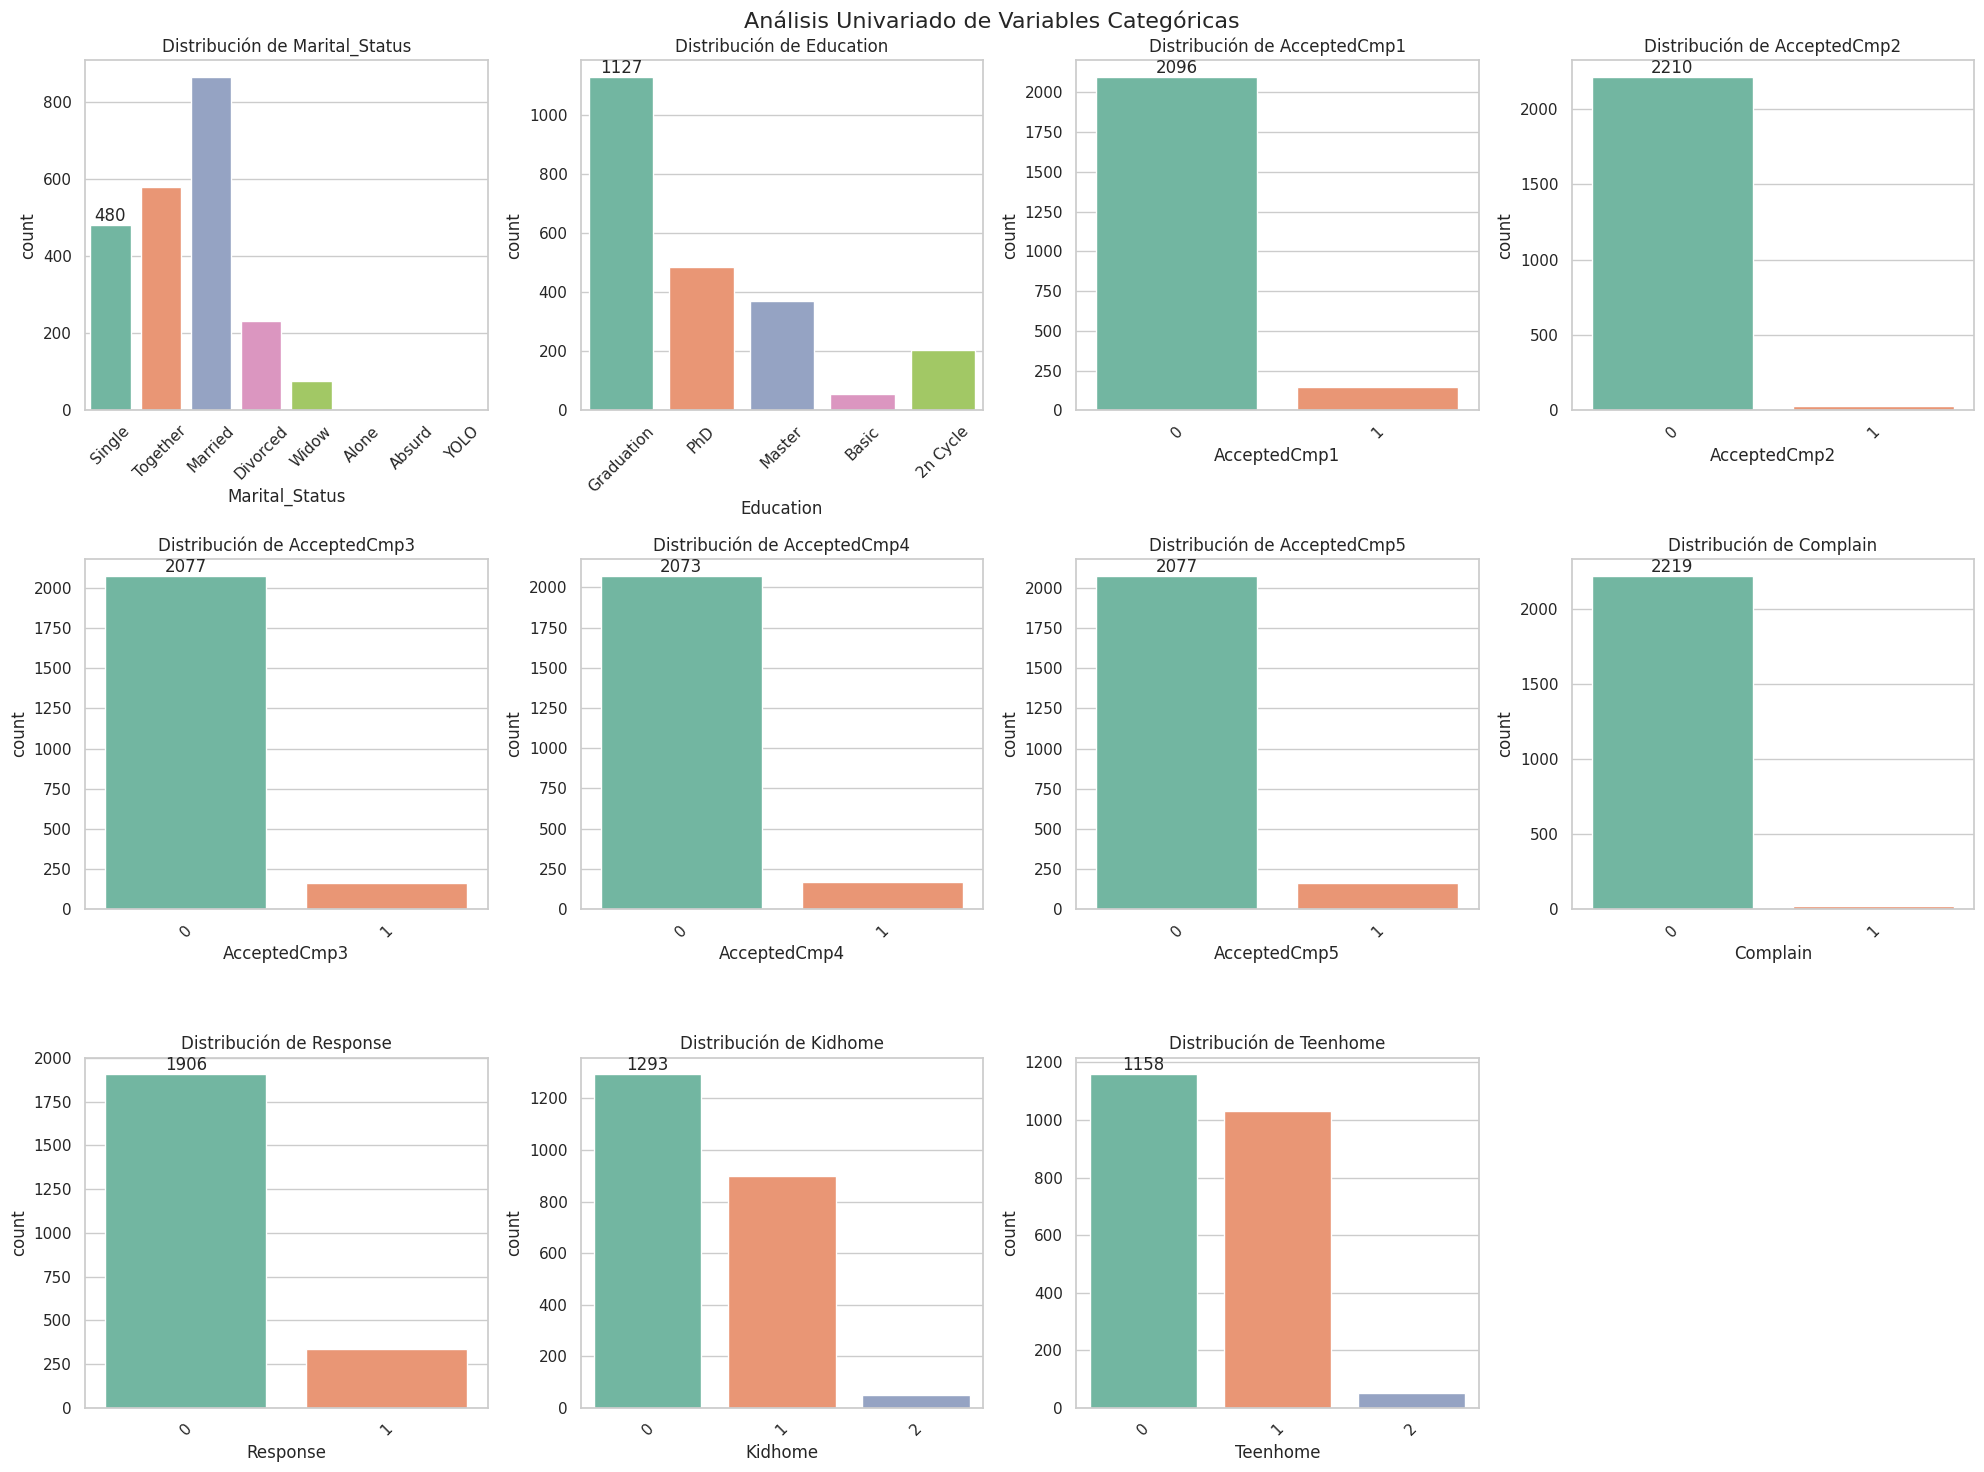

In [138]:
warnings.simplefilter(action='ignore', category=FutureWarning)

cat_cols = ['Marital_Status', 'Education',
            'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
            'Complain', 'Response', 'Kidhome','Teenhome']

sns.set(style="whitegrid")
n_cols = 4
n_rows = math.ceil(len(cat_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    n_categories = df[col].nunique()
    palette = sns.color_palette("Set2", n_categories)
    sns.countplot(data=df, x=col, ax=axes[i], palette=palette)
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].bar_label(axes[i].containers[0])
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Análisis Univariado de Variables Categóricas', fontsize=16)
plt.tight_layout()
plt.show()

**Marital_Status:** La mayoría de los clientes están casados o viven en pareja, mientras que categorías como Alone, Absurd y YOLO son muy poco frecuentes.

**Education:** Predominan los clientes con estudios de grado, seguidos por quienes tienen doctorado y maestría.

**AcceptedCmp1-5:** La participación en campañas es baja, indicando poca respuesta a las campañas anteriores.

**Complain:** Muy pocos clientes han reportado quejas, mostrando baja incidencia de reclamos.

**Response:** Solo una minoría de clientes respondió a la última campaña, mientras que la mayoría no respondió.

**Kidhome:** La mayoría de los clientes no tiene hijos pequeños en casa, mientras que un grupo menor tiene uno o dos hijos.

**Teenhome:** La mayoría de los clientes no tiene adolescentes en casa, mientras que un grupo significativo tiene uno o dos adolescentes.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### **Variables Númericas**

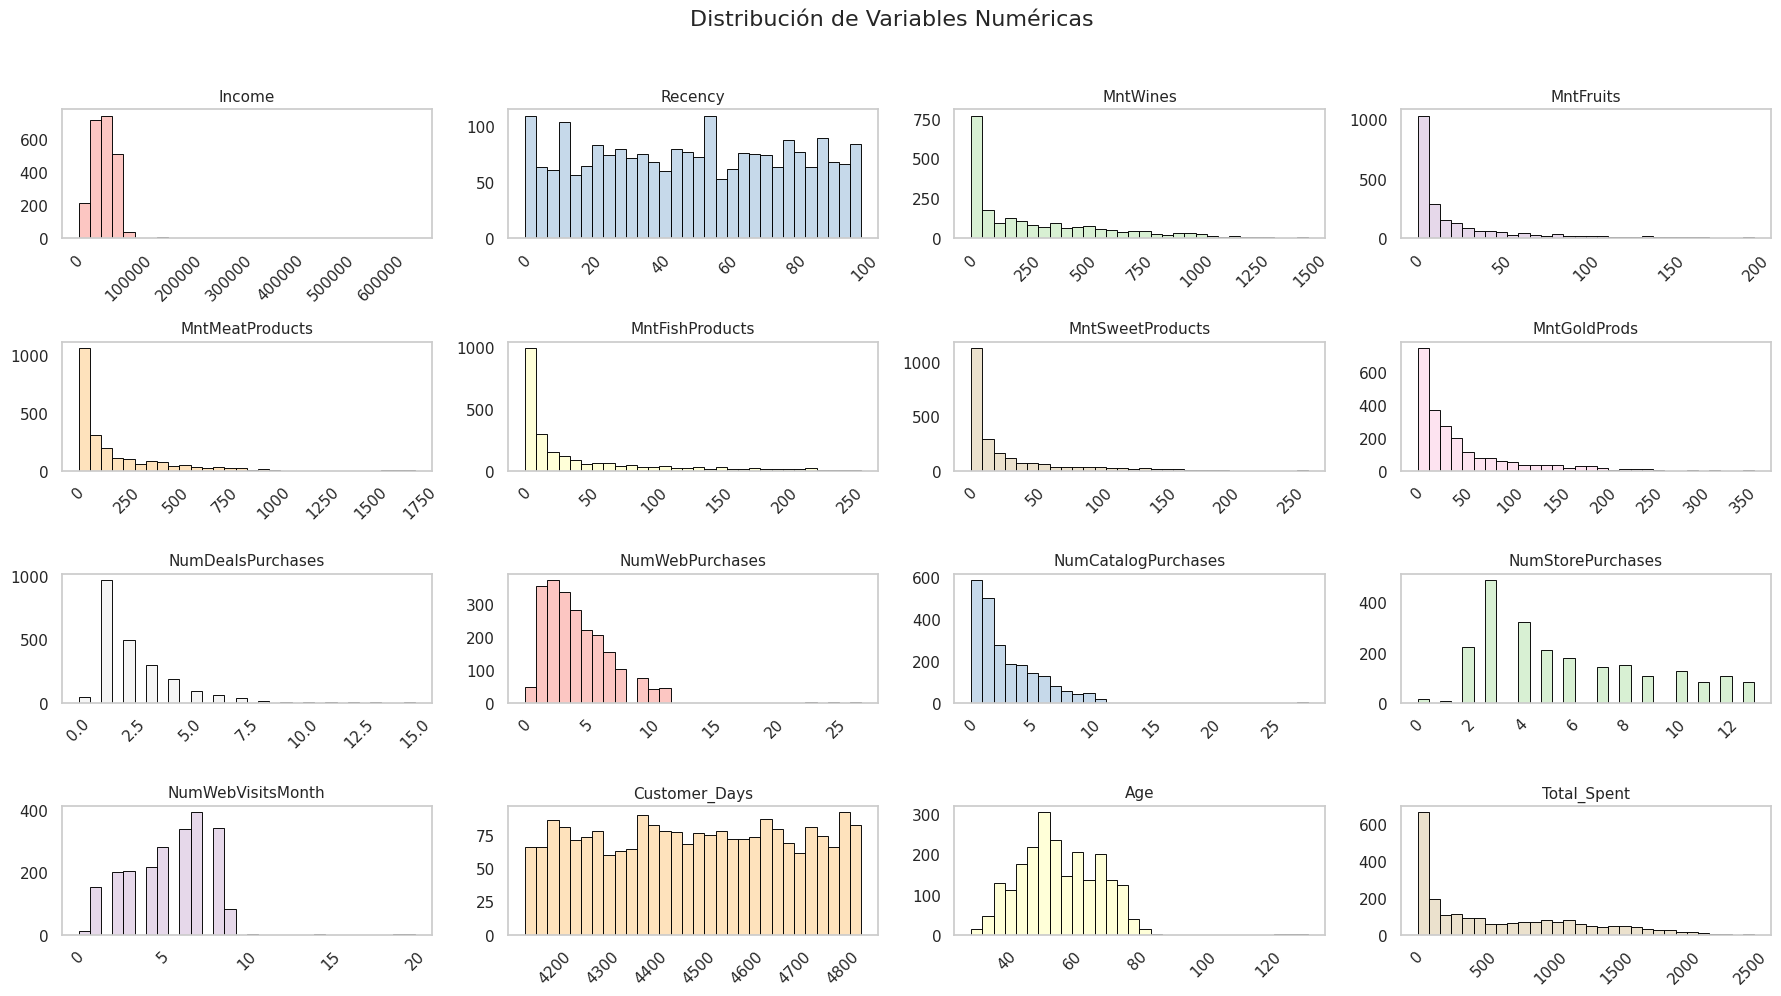

In [140]:
# Variables numéricas continuas
num_cols = ['Income', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth',
            'Customer_Days', 'Age', 'Total_Spent']

# Paleta de colores
palette = sns.color_palette("Pastel1", len(num_cols))

# Crear figura
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 12))
axes = axes.flatten()

# Crear histogramas
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=False, color=palette[i], edgecolor='black', ax=axes[i])
    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(False)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Income** La mayoría de los clientes tiene un nivel de ingreso moderado, aunque hay algunos con ingresos muy altos que se alejan del resto.

**Recency** Los clientes muestran variabilidad en cuánto tiempo ha pasado desde su última compra. La mayoría ha comprado relativamente recientemente, pero algunos tienen mucho tiempo sin actividad.

**MntWines** Las compras de vinos son muy heterogéneas: algunos clientes compran muy poco o nada, mientras que unos pocos compran cantidades muy grandes.

**MntFruits** Las compras de frutas son en general bajas para la mayoría, con algunos clientes que compran cantidades significativamente mayores.

**MntMeatProducts** La mayoría compra cantidades moderadas de productos cárnicos, pero hay clientes que destacan por comprar mucho más que el promedio.

**MntFishProducts** La distribución es desigual: la mayoría compra poco pescado, mientras que un pequeño grupo realiza compras más elevadas.

**MntSweetProducts** Los productos dulces tienen un patrón similar al de frutas y pescado: la mayoría compra poco y unos pocos concentran grandes cantidades.

**MntGoldProds** Los productos premium (gold) muestran que la mayoría de clientes compra cantidades bajas, con unos pocos que compran mucho más.

**NumDealsPurchases** La mayoría de clientes aprovecha pocas promociones, mientras que algunos compran con más frecuencia mediante ofertas y descuentos.

**NumWebPurchases** Las compras por web son moderadas en general, con un grupo de clientes que compra mucho más frecuentemente online.

**NumCatalogPurchases** La mayoría de clientes realiza pocas compras por catálogo, con algunos clientes que destacan por comprar más a través de este canal.

**NumStorePurchases** Las compras en tienda física son más frecuentes que por catálogo para la mayoría, aunque sigue existiendo un grupo que compra mucho más en tienda.

**NumWebVisitsMonth** La mayoría de clientes visita el sitio web pocas veces al mes, mientras que unos pocos son muy activos.

**Customer_Days** La cantidad de días como cliente es bastante similar para la mayoría, mostrando que la base tiene antigüedad similar, con pocos clientes muy nuevos o muy antiguos.

**Age** La mayoría de los clientes se concentra en edades medias y mayores; hay pocos clientes muy jóvenes o extremadamente mayores.

**Total_Spent** El gasto total sigue un patrón desigual: la mayoría gasta cantidades moderadas, pero unos pocos concentran gran parte del consumo total.

## **Datos Atipicos**

Para términos de análisis y de ver los datos atípicos, primero se hacen boxplot con el umbral determinado de 1.5 para entender y poder tratar este parte de los datos.

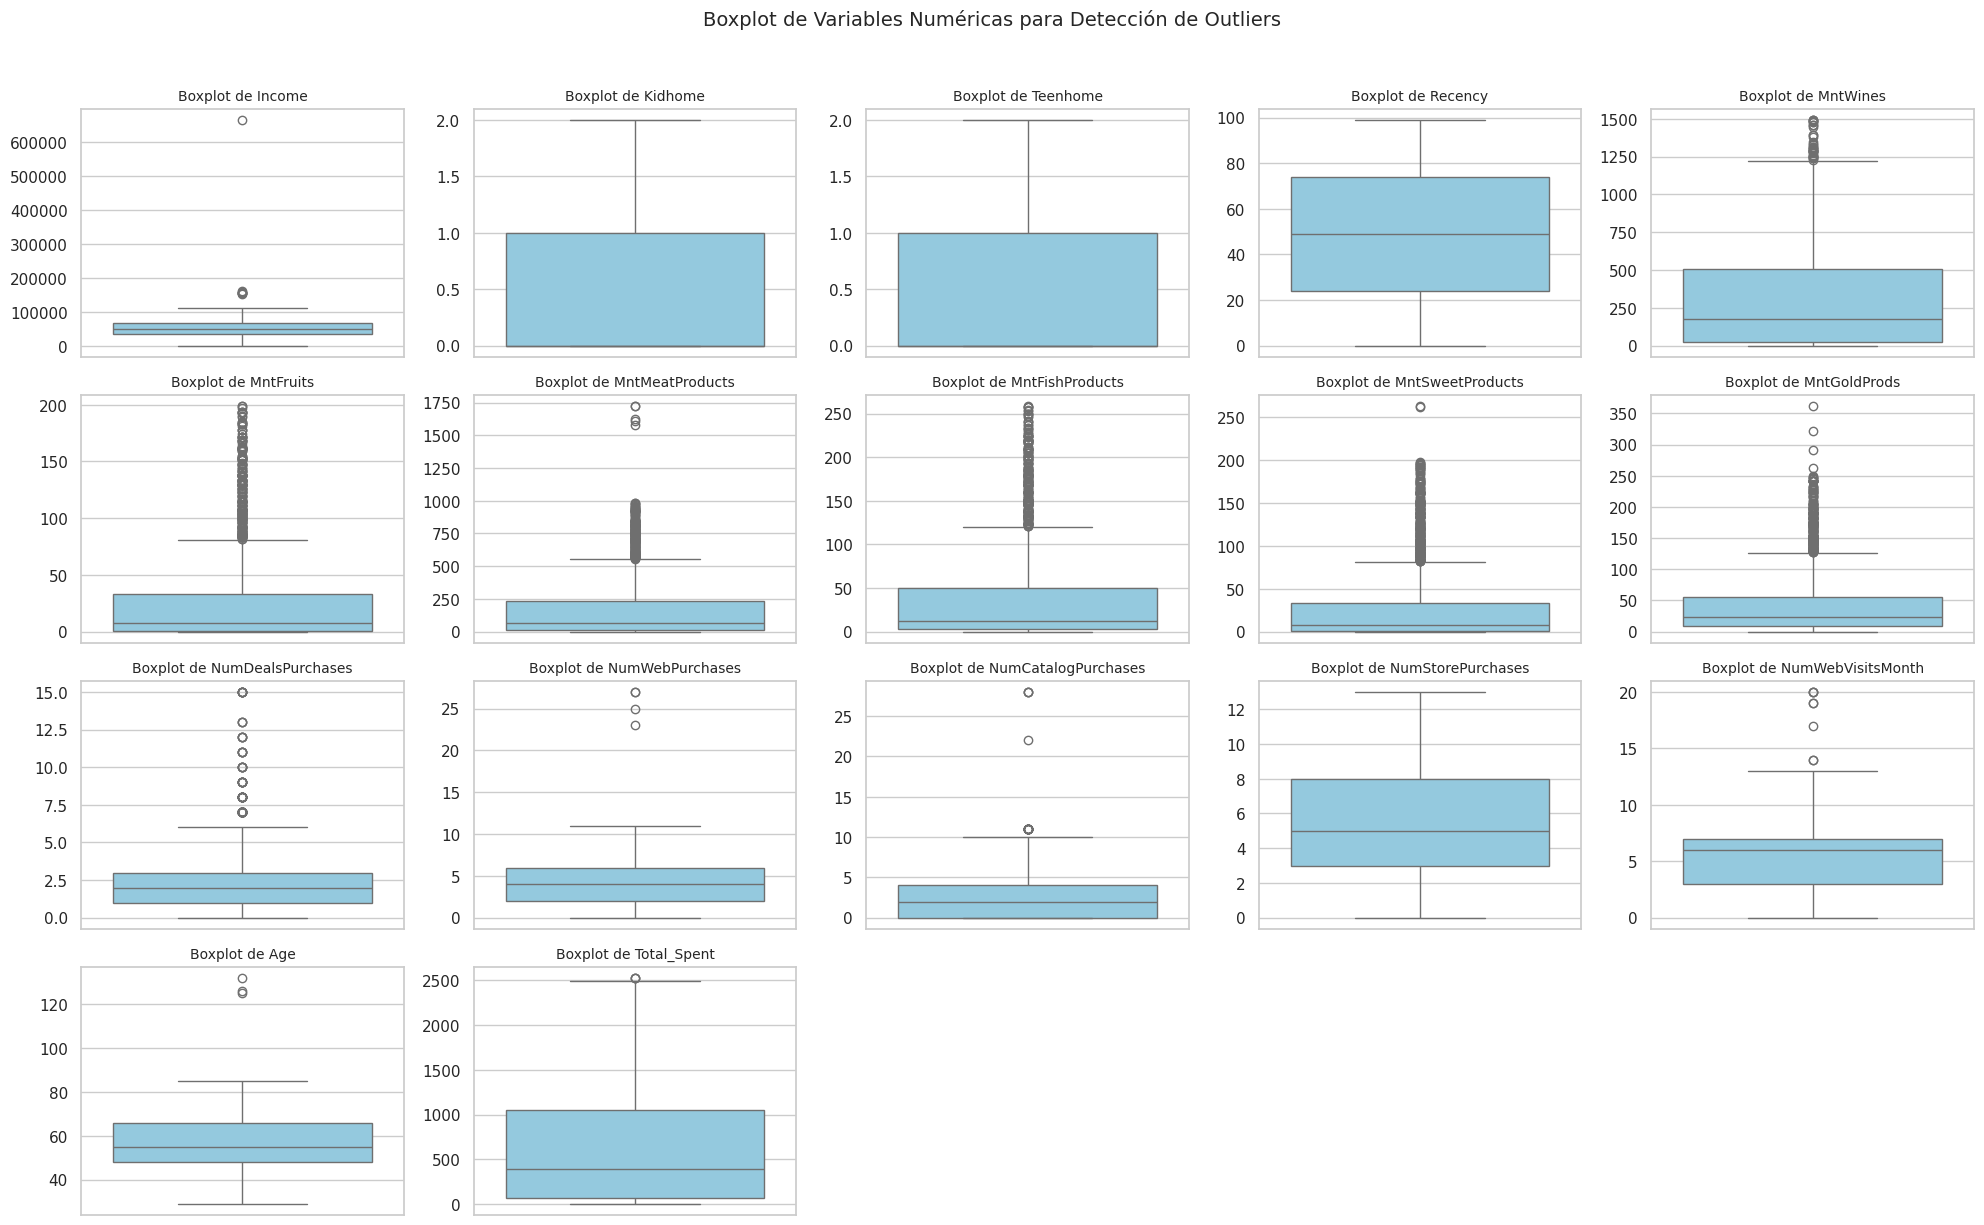

In [141]:
# Variables numéricas a analizar
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Spent']

# Configuración del tamaño y estilo
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 12))
axes = axes.flatten()

# Crear un boxplot por variable
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, color="skyblue", ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar ejes vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.suptitle('Boxplot de Variables Numéricas para Detección de Outliers', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

Cuando usamos 1.5·IQR, los boxplots muestran varios outliers en casi todas las variables:



| **Variable**            | **Outliers detectados** | **Comentario**                                                                           |
| :---------------------- | :---------------------: | :--------------------------------------------------------------------------------------- |
| **Income**              |            Sí           | Clientes con ingresos excepcionalmente altos; podrían influir en la media general.       |
| **Kidhome**             |            No           | Distribución estable; la mayoría de clientes tiene entre 0 y 1 hijo en casa.             |
| **Teenhome**            |            No           | Sin valores extremos; comportamiento homogéneo.                                          |
| **Recency**             |            No           | No presenta outliers relevantes; los valores se distribuyen de forma uniforme.           |
| **MntWines**            |            Sí           | Clientes con gasto elevado en vinos; representan consumidores de alto poder adquisitivo. |
| **MntFruits**           |            Sí           | Pequeños grupos con alto gasto; posible sesgo por compras especializadas.                |
| **MntMeatProducts**     |            Sí           | Alta variabilidad y presencia de valores extremos por grandes consumidores.              |
| **MntFishProducts**     |            Sí           | Algunos outliers, pero dentro de comportamientos plausibles.                             |
| **MntSweetProducts**    |            Sí           | Casos con consumo alto de productos dulces; comportamiento poco frecuente.               |
| **MntGoldProds**        |            Sí           | Outliers en clientes premium con alto gasto en productos de lujo.                        |
| **NumDealsPurchases**   |            Sí           | Pocos valores extremos; clientes con gran participación en promociones.                  |
| **NumWebPurchases**     |            Sí           | Clientes con alta actividad en compras online.                                           |
| **NumCatalogPurchases** |            Sí           | Casos puntuales de uso intensivo del canal catálogo.                                     |
| **NumStorePurchases**   |            No           | Distribución balanceada sin valores atípicos significativos.                             |
| **NumWebVisitsMonth**   |            Sí           | Clientes con visitas web muy frecuentes; comportamiento de navegación intensivo.         |
| **Age**                 |            Sí           | Algunos valores extremos asociados a clientes de edad avanzada (>100 años).              |
| **Total_Spent**         |            Sí           | Valores altos coherentes con clientes de gasto total elevado.                            |


Primero se identificaron outliers utilizando el criterio de 1.5·IQR para detectar valores atípicos moderados y extremos.
Sin embargo, dado que muchos representan comportamientos reales (por ejemplo, ingresos o gastos altos), se decidió mantenerlos en el análisis

### **Tratamiento de Atipicos**

Se calcularon los cuartiles (Q1 y Q3) y el rango intercuartílico (IQR = Q3 – Q1).

Los límites se definieron como:

Inferior: Q1 – 3*IQR

Superior: Q3 + 3*IQR

Este umbral de 3IQR es más estricto que el usual 1.5IQR y se utiliza para identificar solo outliers extremos que realmente podrían sesgar el modelo.

In [142]:
# Función para detectar outliers con IQR
def detectar_outliers_iqr(serie):
    Q1 = np.percentile(serie, 25)   # primer cuartil
    Q3 = np.percentile(serie, 75)   # tercer cuartil
    IQR = Q3 - Q1                   # rango intercuartílico

    lim_inf = Q1 - 3 * IQR # umbral 3: valores atipicos extremos
    lim_sup = Q3 + 3 * IQR

    outliers = serie[(serie < lim_inf) | (serie > lim_sup)]
    return outliers, lim_inf, lim_sup

for col in num_cols:
    outliers, li, ls = detectar_outliers_iqr(df[col])

    print(f"\nVariable: {col}")
    print("Posiciones de outliers:", outliers.index.tolist())
    print("Valores de outliers:", outliers.values.tolist())
    print("Número de outliers:", len(outliers))


Variable: Income
Posiciones de outliers: [2233]
Valores de outliers: [666666.0]
Número de outliers: 1

Variable: Kidhome
Posiciones de outliers: []
Valores de outliers: []
Número de outliers: 0

Variable: Teenhome
Posiciones de outliers: []
Valores de outliers: []
Número de outliers: 0

Variable: Recency
Posiciones de outliers: []
Valores de outliers: []
Número de outliers: 0

Variable: MntWines
Posiciones de outliers: []
Valores de outliers: []
Número de outliers: 0

Variable: MntFruits
Posiciones de outliers: [45, 102, 109, 126, 168, 198, 201, 243, 248, 252, 276, 288, 305, 312, 336, 339, 360, 390, 392, 426, 447, 506, 509, 519, 528, 537, 561, 591, 646, 672, 681, 723, 727, 739, 753, 790, 803, 812, 855, 897, 928, 970, 974, 984, 1031, 1075, 1089, 1100, 1134, 1199, 1265, 1280, 1288, 1313, 1355, 1421, 1444, 1451, 1480, 1492, 1495, 1508, 1510, 1526, 1552, 1589, 1612, 1627, 1648, 1695, 1733, 1745, 1782, 1813, 1853, 1869, 1871, 1890, 1891, 1910, 1912, 1921, 1924, 1946, 1965, 1976, 1982, 2039

In [143]:
for col in num_cols:
    outliers, li, ls = detectar_outliers_iqr(df[col])
    if len(outliers) > 0:  # solo muestra si hay outliers
        porcentaje = round((len(outliers) / df.shape[0]) * 100, 2)
        print(f"{col}: {porcentaje}% de outliers")
    else:
        pass

Income: 0.04% de outliers
MntFruits: 4.29% de outliers
MntMeatProducts: 1.29% de outliers
MntFishProducts: 3.21% de outliers
MntSweetProducts: 4.73% de outliers
MntGoldProds: 2.19% de outliers
NumDealsPurchases: 1.07% de outliers
NumWebPurchases: 0.18% de outliers
NumCatalogPurchases: 0.18% de outliers
NumWebVisitsMonth: 0.13% de outliers
Age: 0.13% de outliers


La mayoría de las variables no presentan valores atípicos.

Solo algunas variables relacionadas con ingresos, consumo y edad muestran casos extremos, que representan comportamientos normales y se mantuvieron en el análisis.

### **Winsorización**

Para el tratamiento, se aplicó la técnica de **Winsorización**:

Consiste en reemplazar los valores atípicos extremos por el valor del límite inferior o superior según corresponda.

De esta forma, no se eliminan registros y se reduce el impacto de valores muy extremos en el modelo.

In [144]:
# Función para winsorizar con método IQR
def winsorize_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 3 * IQR
    lim_sup = Q3 + 3 * IQR

    # Reemplazar valores fuera de rango por los límites
    return np.where(series < lim_inf, lim_inf,
                    np.where(series > lim_sup, lim_sup, series))

# Crear copia del dataframe para winsorización
df_wins = df.copy()

# Lista de variables numéricas a winsorizar (las que tienen outliers extremos)
variables_numericas = [
    'Income', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Age'
]

# Aplicar winsorización a cada variable numérica
for col in variables_numericas:
    df_wins[col] = winsorize_iqr(df_wins[col])

**Comparación Antes y Después**

In [145]:
for col in variables_numericas:
    print(f"\n{col}\n")
    resumen = pd.DataFrame({
        "Antes": df[col].describe(),
        "Después": df_wins[col].describe()
    })
    print(resumen)


Income

               Antes        Después
count    2240.000000    2240.000000
mean    52237.975446   52014.706138
std     25037.955891   21542.354280
min      1730.000000    1730.000000
25%     35538.750000   35538.750000
50%     51381.500000   51381.500000
75%     68289.750000   68289.750000
max    666666.000000  166542.750000

MntFruits

             Antes      Después
count  2240.000000  2240.000000
mean     26.302232    25.061161
std      39.773434    35.680525
min       0.000000     0.000000
25%       1.000000     1.000000
50%       8.000000     8.000000
75%      33.000000    33.000000
max     199.000000   129.000000

MntMeatProducts

             Antes      Después
count  2240.000000  2240.000000
mean    166.950000   164.656250
std     225.715373   215.154638
min       0.000000     0.000000
25%      16.000000    16.000000
50%      67.000000    67.000000
75%     232.000000   232.000000
max    1725.000000   880.000000

MntFishProducts

             Antes      Después
count  2240

La winsorización ajustó los valores extremos de ingresos, gastos y edad, reduciendo la variabilidad extrema sin alterar la distribución general de los datos.

# **Variables a eliminar**

Al revisar las columnas del dataset se encontró lo siguiente:

*  `ID` → contiene un valor único por cada cliente (2.
240 valores distintos).
Es solo un identificador y no aporta información.

*  `Year_Birth` → su información fue transformada en la variable Age, que resulta más interpretable y útil para el análisis.
Mantener ambas variables generaría redundancia en el modelo.

*  `Dt_Customer` → representa la fecha de registro del cliente.

*  `Z_CostContact y Z_Revenue` → presentan un único valor constante para todos los registros.
Al no existir variación, no aportan información útil al análisis ni influyen en los resultados del clustering.

Por estas razones, estas cinco columnas se eliminaron en la fase de preparación de los datos, conservando únicamente aquellas variables que aportan variabilidad y valor explicativo en el comportamiento de los clientes.

Se eliminaron las variables binarias` AcceptedCmp1` a `AcceptedCmp5`
Al ser variables binarias (0/1), su escala y distribución pueden sesgar los resultados del PCA y los algoritmos de clustering basados en distancias, afectando la formación de grupos homogéneos.
Por lo tanto, se excluyen del análisis para priorizar variables continuas y de comportamiento.

In [146]:
# Columnas sospechosas de ser constantes o identificadores
cols_irrelevantes = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                        'Response', 'Complain']

# Revisar cuántos valores únicos tiene cada columna
for col in cols_irrelevantes:
    print(f"{col} → valores únicos: {df_wins[col].nunique()}")

ID → valores únicos: 2240
Year_Birth → valores únicos: 59
Dt_Customer → valores únicos: 663
Z_CostContact → valores únicos: 1
Z_Revenue → valores únicos: 1
AcceptedCmp1 → valores únicos: 2
AcceptedCmp2 → valores únicos: 2
AcceptedCmp3 → valores únicos: 2
AcceptedCmp4 → valores únicos: 2
AcceptedCmp5 → valores únicos: 2
Response → valores únicos: 2
Complain → valores únicos: 2


In [147]:
df_var = df_wins.drop(columns=cols_irrelevantes)
df_var.shape

(2240, 20)

In [148]:
df_var.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   
3  Graduation       Together  26646.0        1         0       26        11   
4         PhD        Married  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       88.0            546.0            172.0              88.0   
1        1.0              6.0              2.0               1.0   
2       49.0            127.0            111.0              21.0   
3        4.0             20.0             10.0               3.0   
4       43.0            118.0             46.0              27.0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0          88.0                3.0              8.0                 10.0   
1           6.0                2.0              1.0                  1.0   
2          42.0                1.0              8.0                  2.0   
3           5.0                2.0              2.0                  0.0   
4          15.0                5.0              5.0                  3.0   

   NumStorePurchases  NumWebVisitsMonth  Customer_Days   Age  Total_Spent  
0                  4                7.0           4802  68.0         1617  
1                  2                5.0           4252  71.0           27  
2                 10                4.0           4451  60.0          776  
3                  4                6.0           4278  41.0           53  
4                  6                5.0           4300  44.0          422

# **Tratamiento de Categoricas**

## **Marital Status**

Se asignaron números a las categorías de Marital_Status para poder analizarlas como variables numéricas:

0: Personas sin pareja activa o independientes (Single, Alone, YOLO, Absurd).

1: Personas que han perdido o terminado una relación (Divorced, Widow).

2: Personas en una relación pero no casadas formalmente (Together).

3: Personas casadas formalmente (Married).

Esto permite que los análisis cuantitativos reflejen un orden aproximado de compromiso o estado civil, sin perder la información de cada categoría.

In [149]:
df_var = df_var.replace({
    "Single":0, "Alone":0, "YOLO":0, "Absurd":0,
    "Divorced":1, "Widow":1,
    "Together":2, "Married":3})

## **Education**

In [150]:
df_var['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Se codificó de manera ordinal asignando valores numéricos de menor a mayor nivel de educación:

0: Basic

1: 2n Cycle

2: Graduation

3: Master

4: PhD.

Esto permite incluir la variable en análisis estadísticos y modelos, preservando la jerarquía entre los niveles educativos.

In [151]:
df_var= df_var.replace({
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
})

In [152]:
df_var.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          2               0  58138.0        0         0       58       635   
1          2               0  46344.0        1         1       38        11   
2          2               2  71613.0        0         0       26       426   
3          2               2  26646.0        1         0       26        11   
4          4               3  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       88.0            546.0            172.0              88.0   
1        1.0              6.0              2.0               1.0   
2       49.0            127.0            111.0              21.0   
3        4.0             20.0             10.0               3.0   
4       43.0            118.0             46.0              27.0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0          88.0                3.0              8.0                 10.0   
1           6.0                2.0              1.0                  1.0   
2          42.0                1.0              8.0                  2.0   
3           5.0                2.0              2.0                  0.0   
4          15.0                5.0              5.0                  3.0   

   NumStorePurchases  NumWebVisitsMonth  Customer_Days   Age  Total_Spent  
0                  4                7.0           4802  68.0         1617  
1                  2                5.0           4252  71.0           27  
2                 10                4.0           4451  60.0          776  
3                  4                6.0           4278  41.0           53  
4                  6                5.0           4300  44.0          422

# **Análisis Bivariado**

## **Correlación**

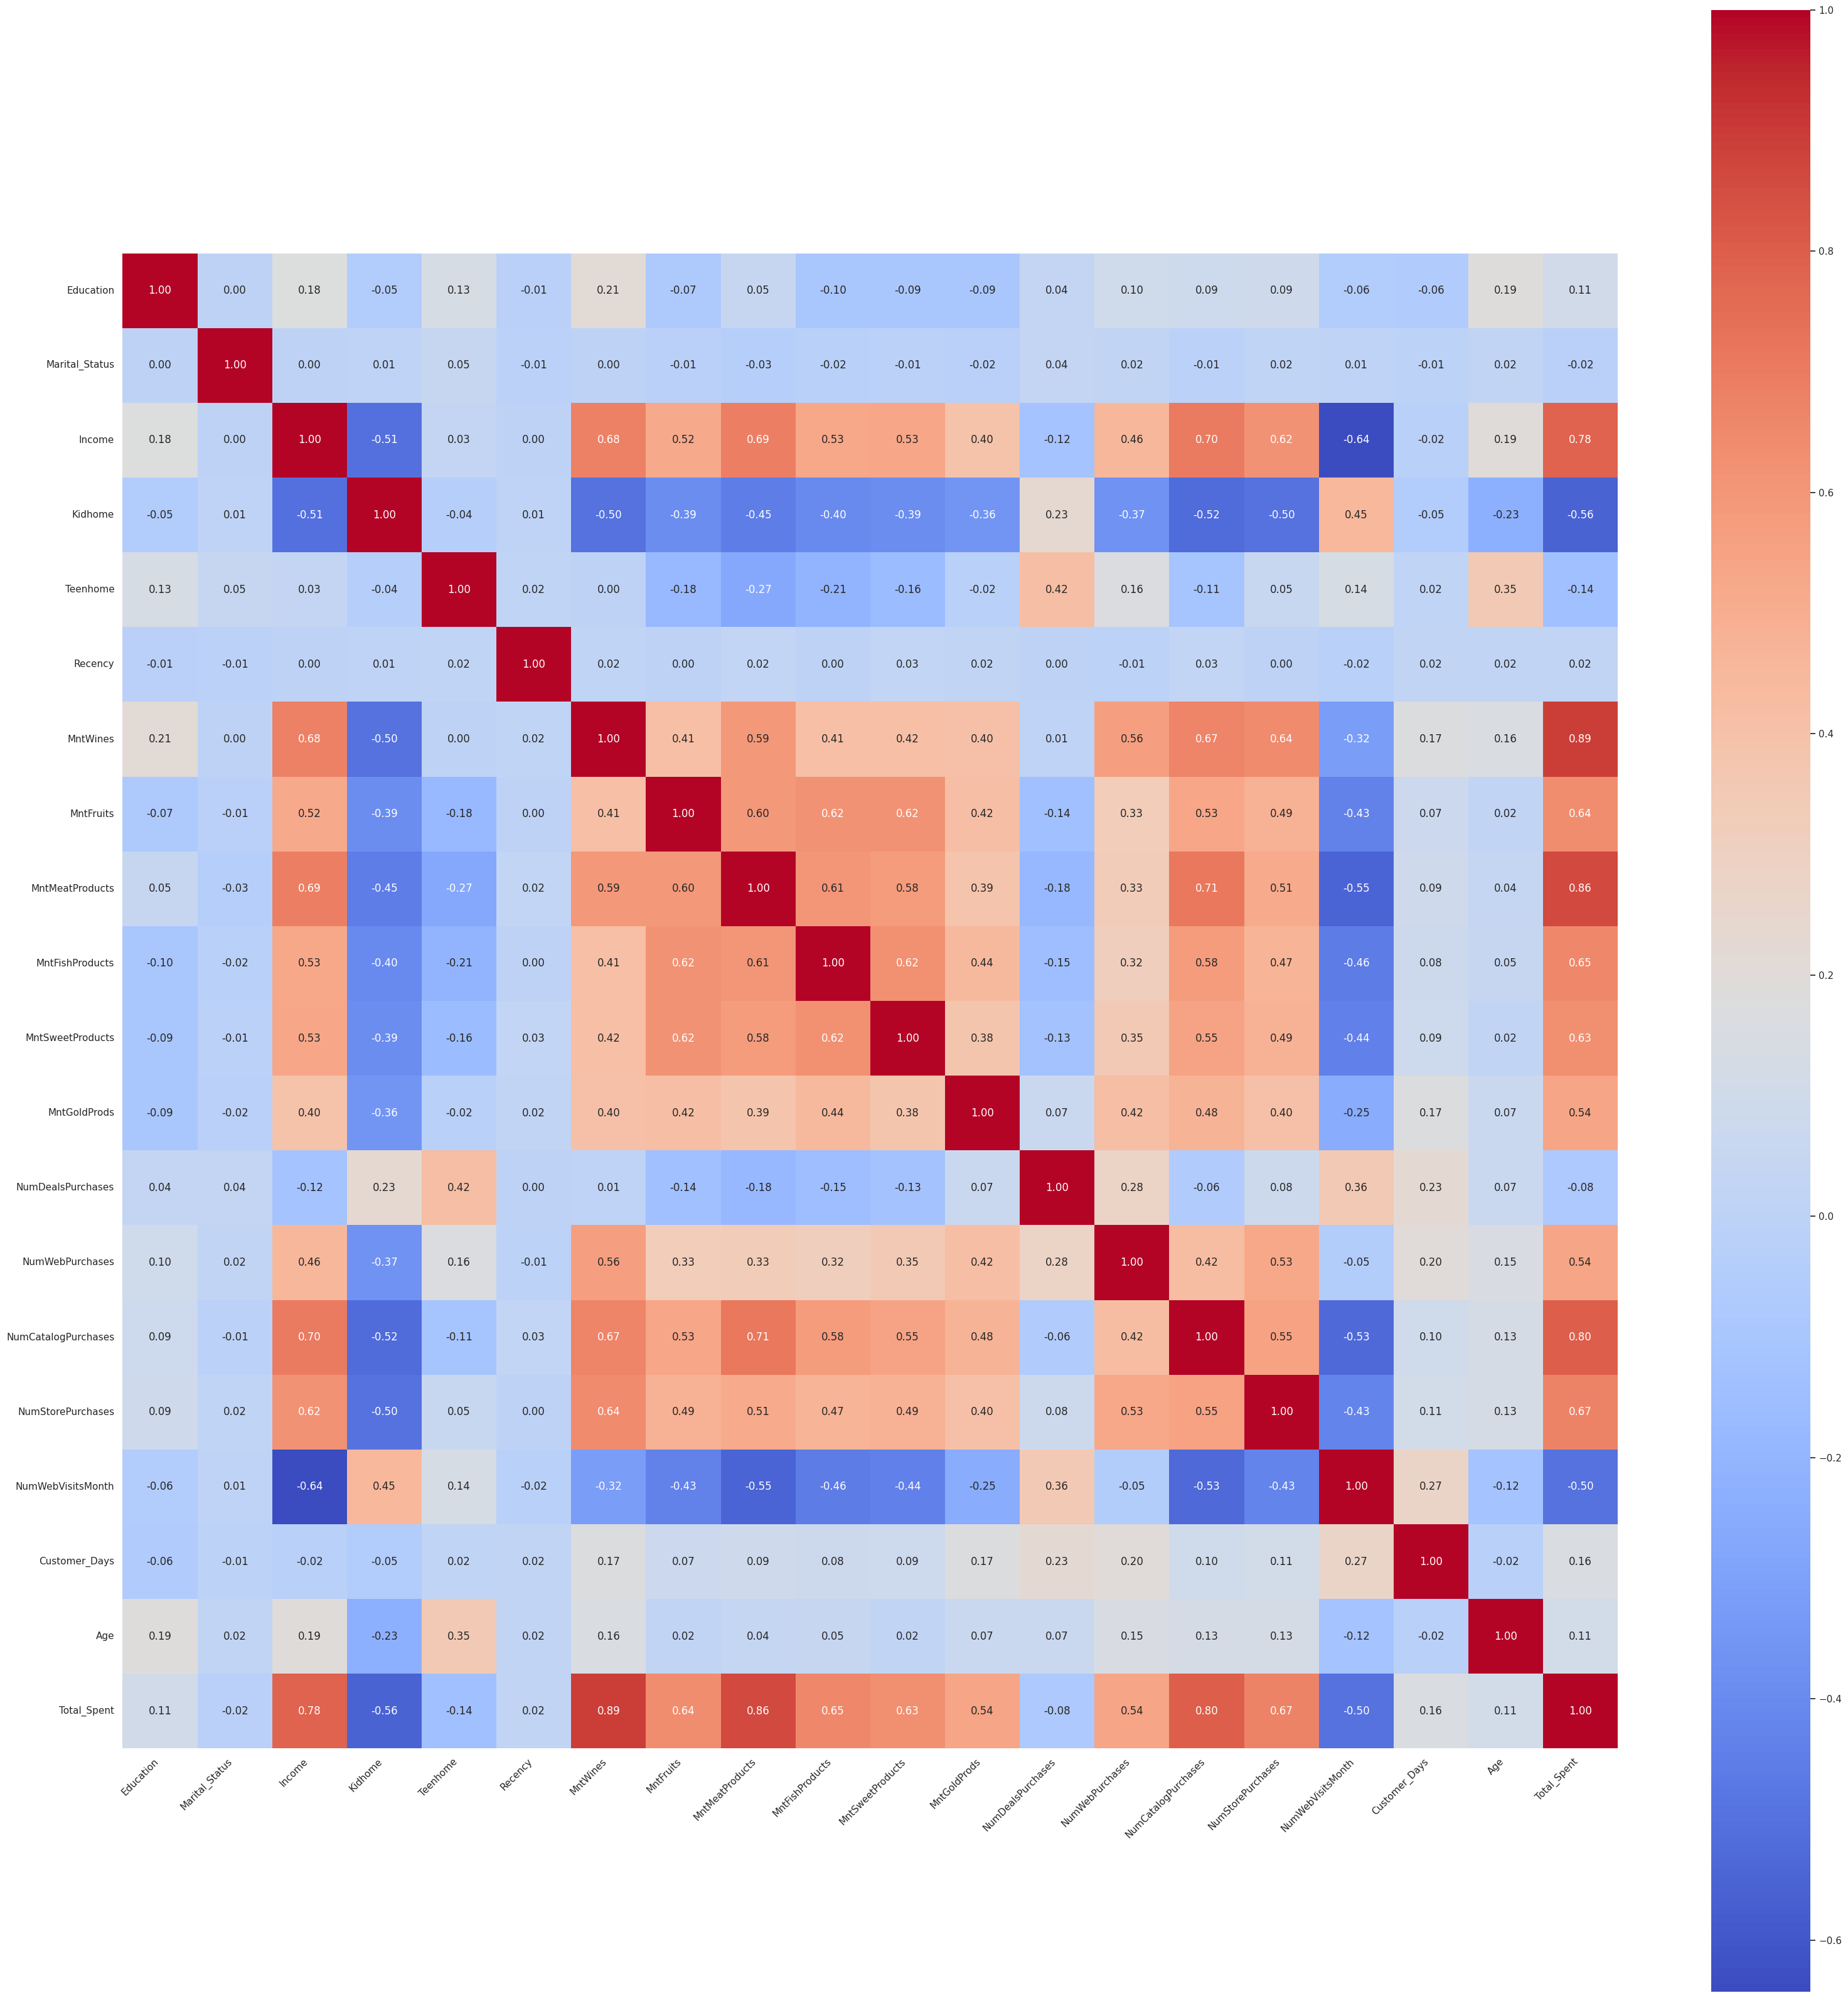

In [153]:
corrmat = df_var.corr()
plt.figure(figsize=(32,32))
sns.heatmap(corrmat, annot=True, fmt=".2f", square=True, cmap="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Análisis**

**1. Variables con alta correlación positiva**

Estas variables se mueven casi en la misma dirección, lo cual indica comportamientos muy similares entre los clientes:

| Par de variables                  | Correlación | Interpretación |
|----------------------------------|------------|----------------|
| Total_Spent – MntWines           | 0.89       | El gasto total está fuertemente influido por las compras de vino; quienes compran más vino son los que más gastan en general. |
| MntMeatProducts – Total_Spent    | 0.86       | Las carnes también tienen gran peso en el gasto total. |
| Total_Spent – NumCatalogPurchases| 0.80       | Los clientes que compran más por catálogo tienden a gastar más. |
| Total_Spent – Income             | 0.78       | A mayor ingreso, mayor gasto total; una relación esperada. |
| NumCatalogPurchases – MntMeatProducts | 0.71  | Los clientes que compran más por catálogo suelen comprar más carne. |
| Income – NumCatalogPurchases     | 0.70       | Los clientes con más ingresos prefieren el canal de catálogo para sus compras. |

**Interpretación general:**

El gasto total (Total_Spent) se explica principalmente por las compras en productos como vino y carne, y está fuertemente asociado al nivel de ingreso y al canal de compra por catálogo.
Esto sugiere que los clientes con mayor poder adquisitivo tienden a usar el canal de catálogo y realizan compras de mayor valor en alimentos premium.

**2. Otras correlaciones relevantes**

| Par de variables                  | Correlación | Interpretación |
|----------------------------------|------------|----------------|
| MntFishProducts – Total_Spent     | 0.65       | Las compras de pescado también aumentan con el gasto total. |
| NumStorePurchases – MntWines      | 0.64       | Los clientes que compran en tienda física tienden a comprar más vino. |
| MntSweetProducts – Total_Spent    | 0.63       | Los dulces también contribuyen al gasto general, aunque en menor medida. |


**Interpretación:**  
Las distintas categorías de productos (`MntWines`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`) están positivamente correlacionadas entre sí y con el gasto total, lo cual indica un perfil de cliente de alto consumo transversal (no solo compra una categoría, sino varias).

**3. Correlaciones negativas destacadas**

| Par de variables                  | Correlación | Interpretación |
|----------------------------------|------------|----------------|
| Income – Kidhome                  | -0.51      | A mayor ingreso, menos hijos pequeños en el hogar. |
| NumWebVisitsMonth – Total_Spent   | -0.50      | Los clientes que visitan con mayor frecuencia el sitio web tienden a gastar menos; podrían ser visitantes curiosos o indecisos. |
| Kidhome – Total_Spent              | -0.56      | Quienes tienen hijos pequeños gastan menos en general, posiblemente por menor capacidad adquisitiva. |

**Interpretación general:**  
Las correlaciones negativas muestran que el tamaño y composición del hogar afectan el consumo, y que no todos los canales digitales reflejan ventas altas (muchas visitas web no necesariamente significan más compras).

**4. Correlaciones bajas o sin relación**

Variables como `Education`, `Marital_Status` presentan correlaciones muy bajas (cercanas a 0) con la mayoría de las variables numéricas, indicando que no influyen directamente en el comportamiento de compra ni en el gasto total.

Según el análisis de correlación, las variables más representativas para comparar serían:

* Total_Spent (gasto total)

* MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts (categorías de productos con alta correlación con el gasto)

* Income (nivel de ingreso)

* NumCatalogPurchases (canal relevante)

**Eliminación de Education y Marital Status**

Las variables `Education` y `Marital_Status` fueron eliminadas del conjunto de datos para la fase de modelado, ya que son de tipo categórico y su codificación podría introducir sesgos en los métodos basados en distancias.

Además, el análisis de correlaciones mostró que estas variables presentan coeficientes muy bajos (cercanos a 0) respecto a la mayoría de las variables numéricas del conjunto, lo que indica que no influyen de forma directa en el comportamiento de compra ni en el gasto total de los clientes.

Ambas variables se conservaron para la etapa de interpretación de los grupos, ya que su incorporación posterior permitirá describir los clústeres desde una perspectiva sociodemográfica, enriqueciendo el análisis de perfiles de cliente.

In [154]:
# Eliminar variables categóricas no utilizadas para modelado
df = df_var.drop(['Education', 'Marital_Status'], axis=1)

# Confirmar la eliminación
print("Columnas restantes en df:")
print(df.columns.tolist())

Columnas restantes en df:
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Days', 'Age', 'Total_Spent']


## **Pairplot**

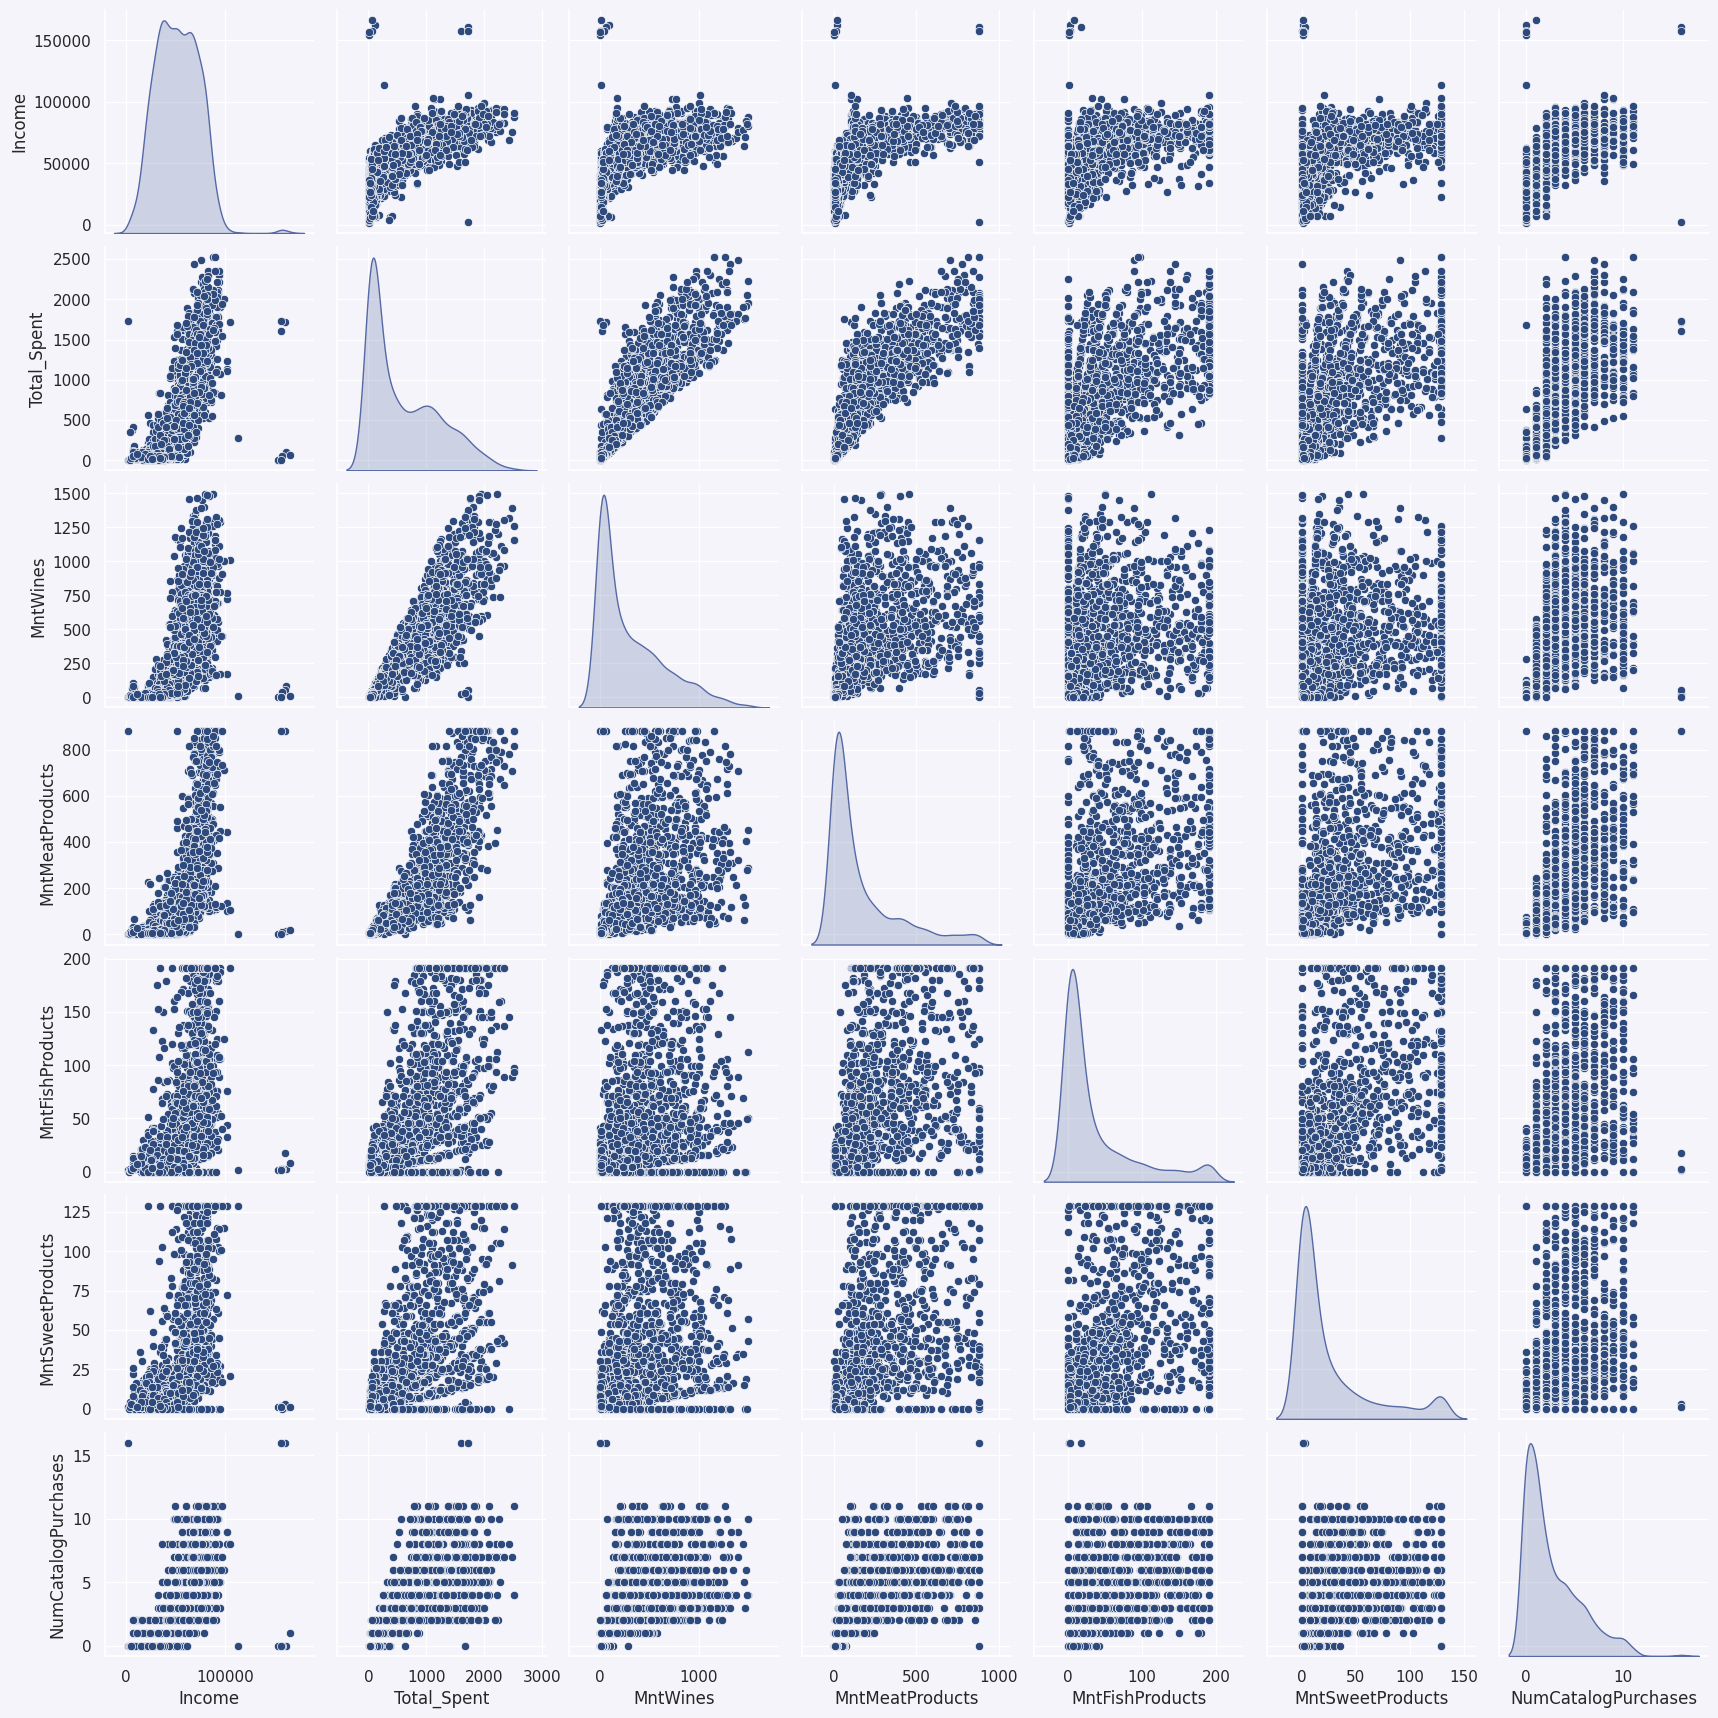

In [155]:
# Paleta  de colores personalizada
pallet = ["#2E4A7D","#5469A5","#7E6BCB","#A36CD0","#D76D82","#B84040"]

# Selección de variables representativas
vars_representativas = ["Income", "Total_Spent", "MntWines", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "NumCatalogPurchases"]

# Pairplot
sns.set(rc={"axes.facecolor":"#F5F4FA","figure.facecolor":"#F5F4FA"})
sns.pairplot(df[vars_representativas],
             diag_kind="kde",
             plot_kws={"color":pallet[0]},
             diag_kws={"color":pallet[1]})
plt.show()

**Análisis de relaciones entre variables representativas**

1. Income vs Total_Spent
Se observa que a mayor ingreso, tiende a ser mayor el gasto total, aunque con bastante dispersión. Esto indica que clientes con ingresos altos suelen gastar más, pero no todos lo hacen uniformemente.

2. Total_Spent vs MntWines y MntMeatProducts
El gasto en vino y carne está fuertemente correlacionado con el gasto total. Los clientes que compran mucho vino o carne son generalmente los que tienen un Total_Spent alto.

3. MntFishProducts y MntSweetProducts
Estas categorías muestran valores más bajos en comparación con vino y carne, pero todavía mantienen cierta relación positiva con el gasto total.

4. NumCatalogPurchases
Los clientes que compran más por catálogo tienden a gastar más en general, lo que refuerza la relación positiva con Total_Spent y con categorías como MntMeatProducts y MntWines.

## **Relación Total_Spent**

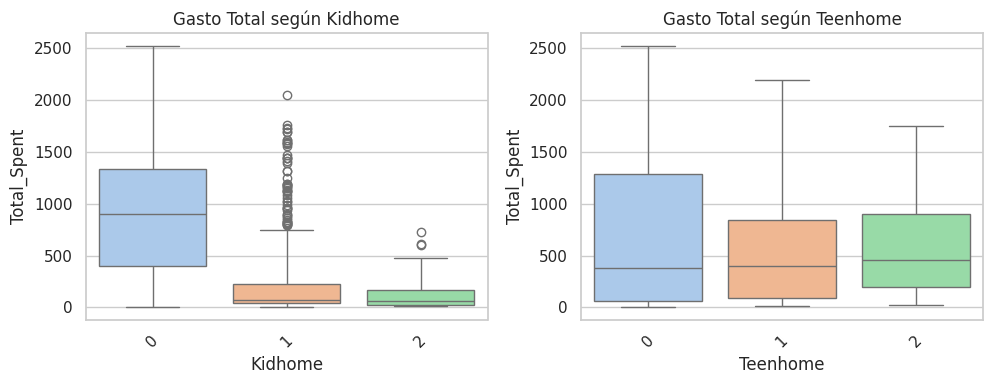

In [156]:
categoricas = ['Kidhome', 'Teenhome']

# Configuración de estilo
sns.set_style("whitegrid")

# Número de columnas
n_cols = 4
n_rows = (len(categoricas) + n_cols - 1) // n_cols  # Calcula filas necesarias

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # Facilita iterar sobre los ejes

# Generar boxplots
for i, col in enumerate(categoricas):
    sns.boxplot(x=col, y='Total_Spent', data=df, palette='pastel', ax=axes[i], whis= 3)
    axes[i].set_title(f'Gasto Total según {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Quitar ejes vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

La presencia de hijos pequeños o adolescentes tiende a reducir el gasto, reflejando restricciones familiares.

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2240 non-null   float64
 1   Kidhome              2240 non-null   int64  
 2   Teenhome             2240 non-null   int64  
 3   Recency              2240 non-null   int64  
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   float64
 6   MntMeatProducts      2240 non-null   float64
 7   MntFishProducts      2240 non-null   float64
 8   MntSweetProducts     2240 non-null   float64
 9   MntGoldProds         2240 non-null   float64
 10  NumDealsPurchases    2240 non-null   float64
 11  NumWebPurchases      2240 non-null   float64
 12  NumCatalogPurchases  2240 non-null   float64
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   float64
 15  Customer_Days        2240 non-null   i

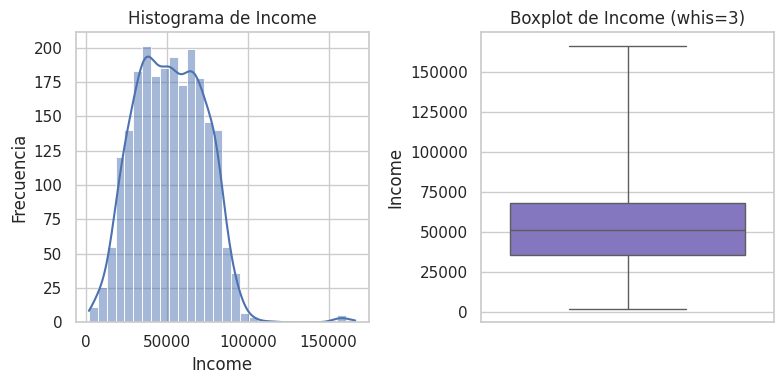

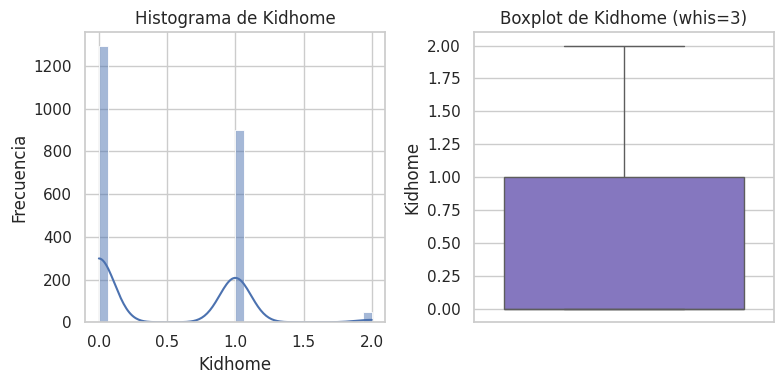

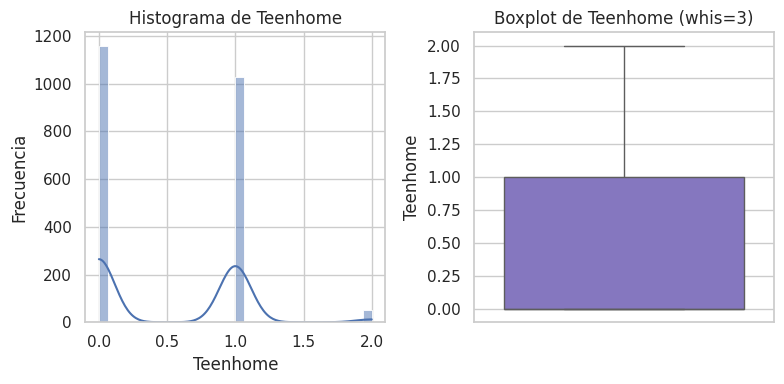

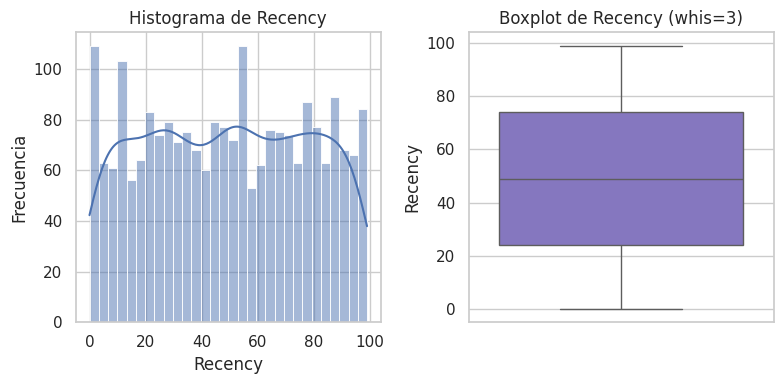

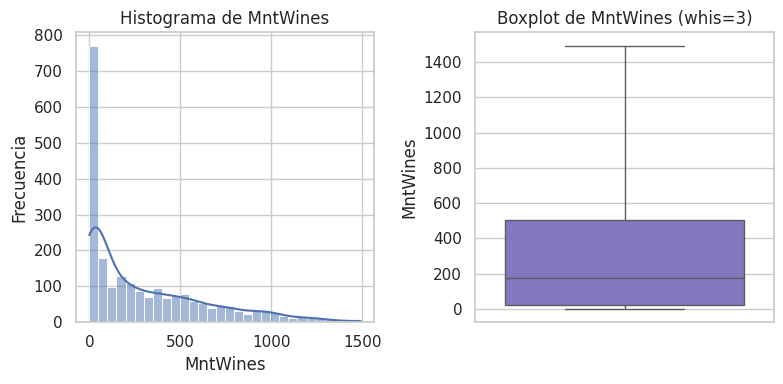

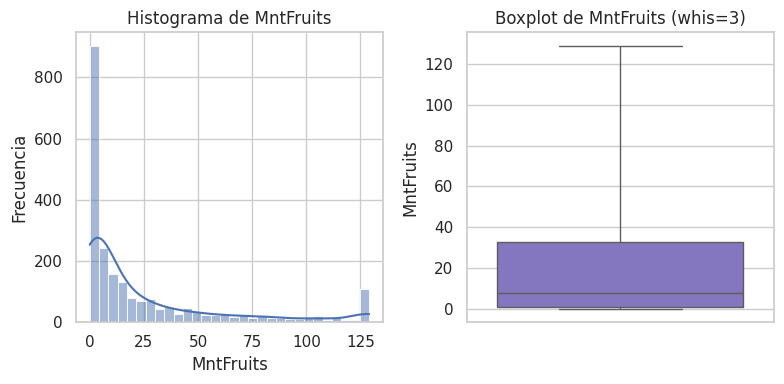

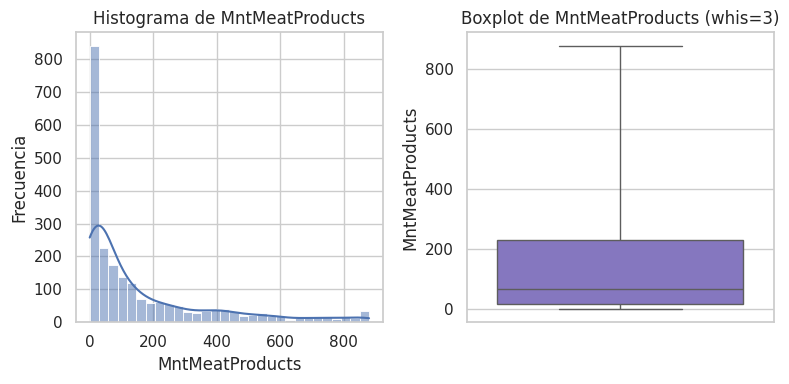

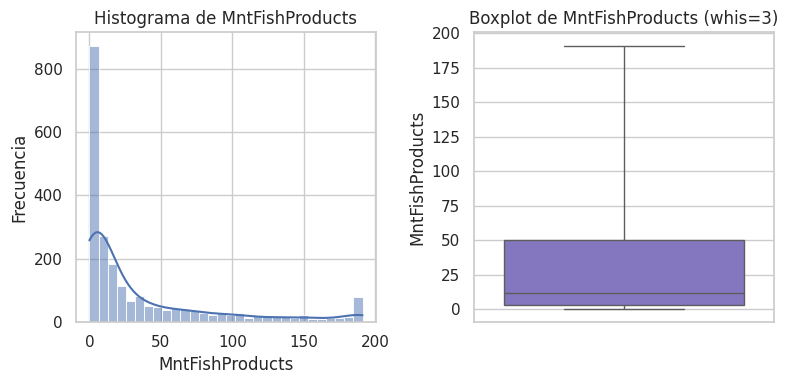

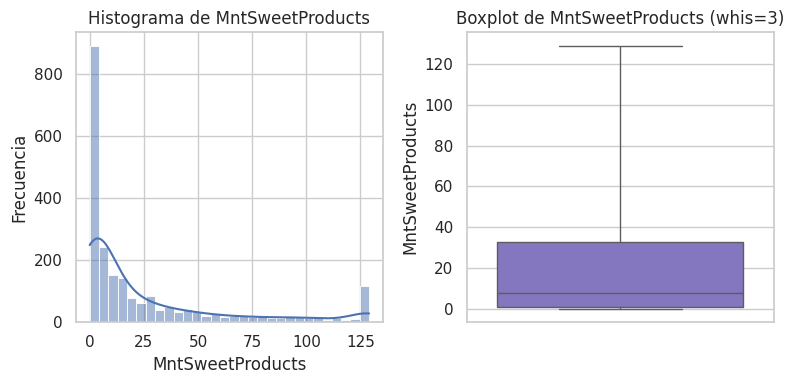

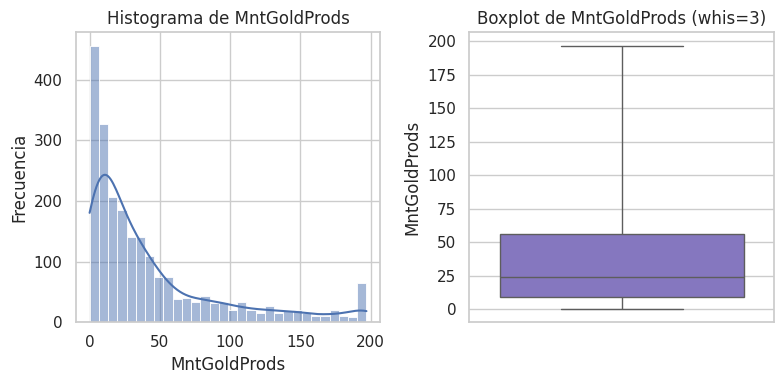

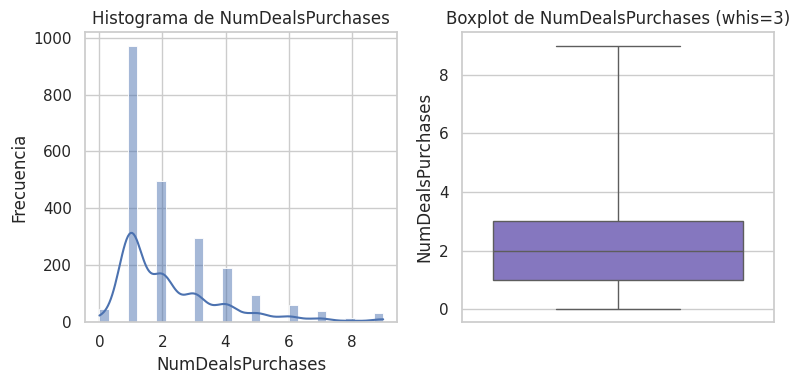

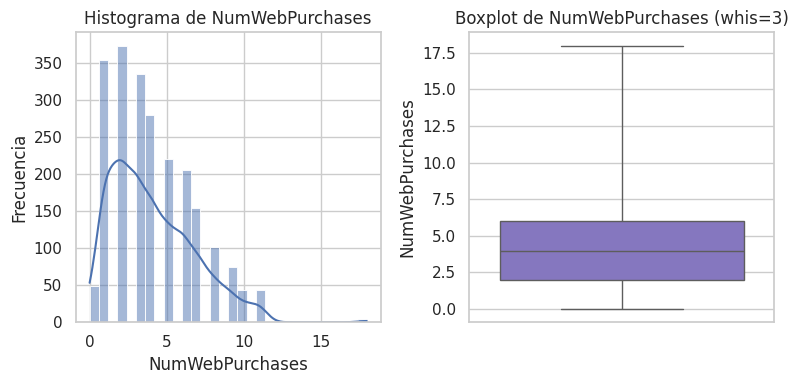

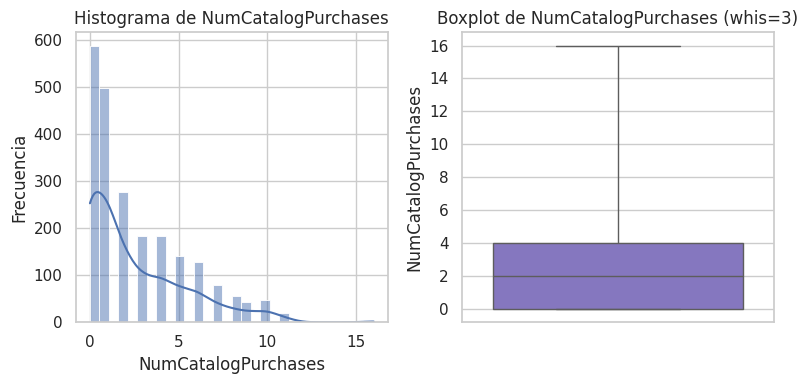

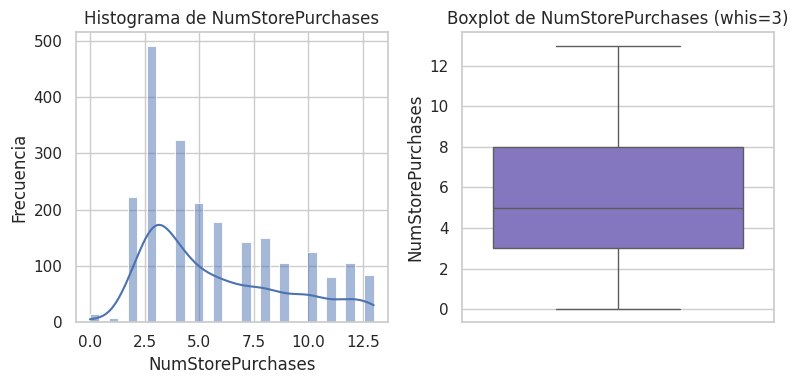

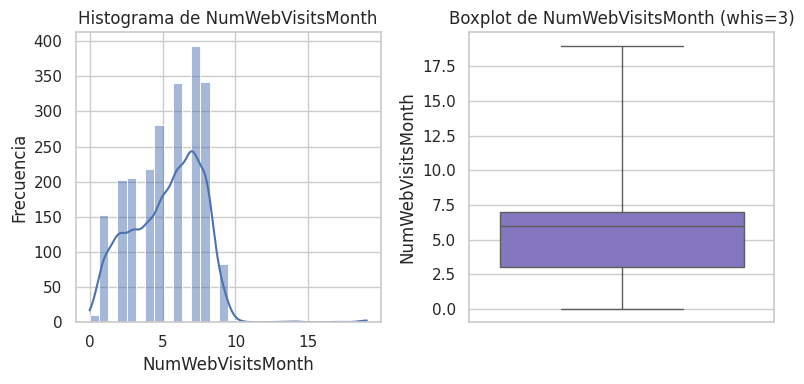

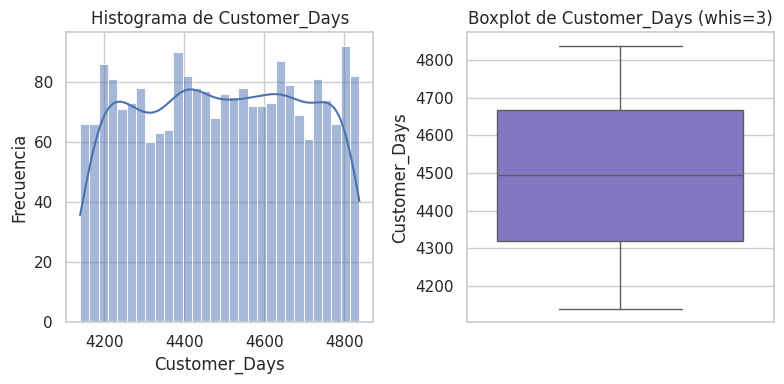

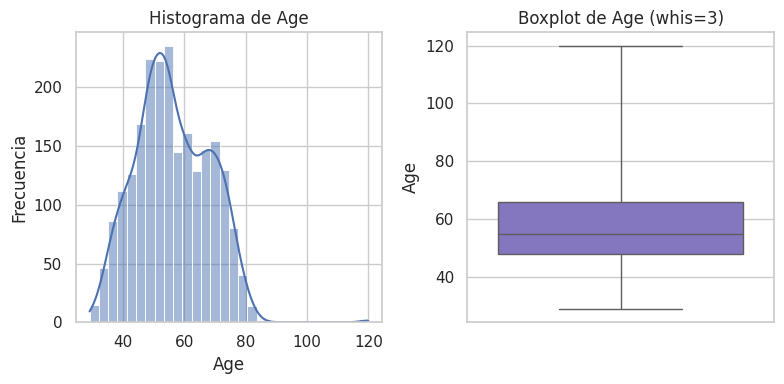

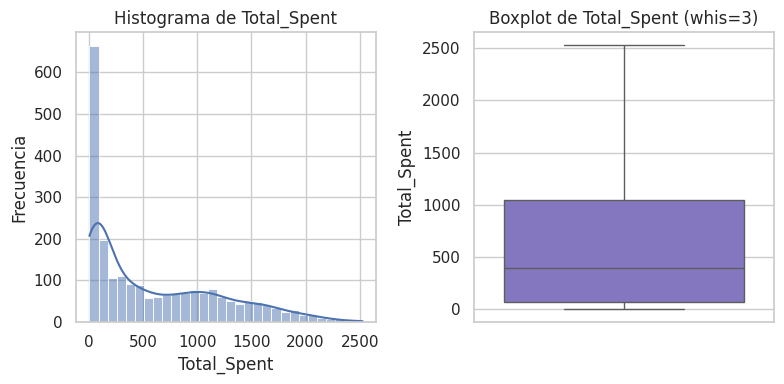

In [158]:
for column in df.columns:
    plt.figure(figsize=(8, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

    # Boxplot con umbral IQR = 3
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column], whis=3, color="#7E6BCB")
    plt.title(f'Boxplot de {column} (whis=3)')
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

**Análisis de distribuciones**

* Muchas variables, como Total_Spent, MntWines o Income, muestran distribuciones con sesgo positivo: la mayoría de clientes tiene valores bajos o moderados, y unos pocos clientes tienen valores muy altos. Esto indica que unos pocos clientes concentran gran parte del gasto y poder adquisitivo.

* Las compras de productos como carne, vino, pescado o dulces no están distribuidas uniformemente: la mayoría compra poco, y unos pocos compran mucho. Esto genera un perfil de clientes “grandes consumidores” que puede ser clave para estrategias de marketing y fidelización.

* Variables como Kidhome o Teenhome tienen valores bajos para la mayoría de clientes, indicando hogares pequeños. Esto impacta en el gasto total, ya que clientes con hijos tienden a gastar menos en productos premium.

**Consecuencia principal:**

La distribución de la mayoría de variables muestra clientes concentrados en consumo bajo-moderado con un grupo reducido de clientes de alto valor. Esto sugiere que las estrategias de marketing y promociones deberían enfocarse en identificar y retener a estos clientes de alto gasto, mientras se mantiene la relación con la base general.

# **Estandarización de datos**

In [159]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

# Ajustar y transformar los datos
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

In [160]:
df_scaled.head()

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.284308 -0.825218 -0.929894  0.307039  0.983781   1.764349   
1 -0.263294  1.032559  0.906934 -0.383664 -0.870479  -0.674501   
2  0.909960 -0.825218 -0.929894 -0.798086  0.362723   0.671072   
3 -1.177883  1.032559 -0.929894 -0.798086 -0.870479  -0.590402   
4  0.291505  1.032559 -0.929894  1.550305 -0.389085   0.502875   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.772813         2.626317          1.714675      0.902961   
1        -0.737570        -0.671007         -0.675260     -0.753114   
2        -0.175059         1.443159         -0.125849     -0.026057   
3        -0.672486        -0.515839         -0.620319     -0.773310   
4        -0.216898         0.182418          0.038974     -0.571350   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.404784         1.460088             2.628859          -0.550785   
1          -0.164404        -1.141524            -0.587222          -1.166125   
2          -0.733591         1.460088            -0.229880           1.295237   
3          -0.164404        -0.769865            -0.944564          -0.550785   
4           1.543159         0.345112             0.127463           0.064556   

   NumWebVisitsMonth  Customer_Days       Age  Total_Spent  
0           0.696708       1.531185  0.991053     1.679417  
1          -0.130333      -1.190545  1.242673    -0.961275  
2          -0.543853      -0.205773  0.320066     0.282673  
3           0.283188      -1.061881 -1.273526    -0.918094  
4          -0.130333      -0.953012 -1.021906    -0.305254

# **Reducción de la dimensionalidad - PCA**

Primero aplicamos PCA con todas las componentes para conocer cuánta varianza explica cada una, identificar redundancias y decidir cuántas conservar en etapas posteriores

In [161]:
# Aplicar PCA para ver todas las componentes inicialmente
pca_full = PCA(random_state=42)
pca_full.fit(df_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

Se elige un umbral del 75% de varianza explicada porque permite conservar la gran parte de la información relevante del conjunto de datos, reduciendo la dimensionalidad sin perder patrones significativos.

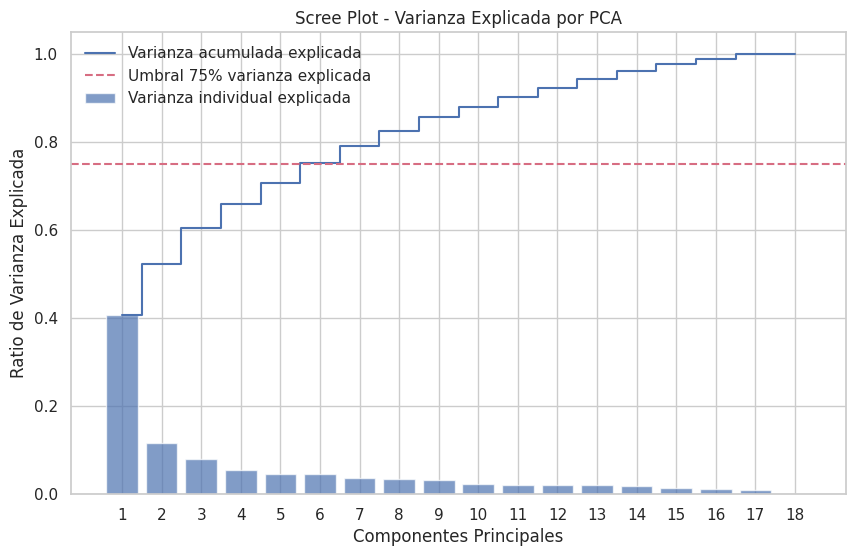

In [162]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Scree Plot - Varianza Explicada por PCA')
plt.axhline(y=0.75, color="#D76D82", linestyle='--', label="Umbral 75% varianza explicada")
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [163]:
cumulative_explained_variance

array([0.40817362, 0.52423537, 0.6044002 , 0.66035014, 0.70736456,
       0.75330537, 0.79107943, 0.82497967, 0.85646383, 0.88047142,
       0.90258182, 0.92400015, 0.94405385, 0.96278999, 0.97747339,
       0.98983688, 0.99986339, 1.        ])

In [164]:
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1
print(n_components)

6


Se observó que las primeras 6 componentes acumulaban aproximadamente 75% de la varianza total, lo que indica que conservan la mayor parte de la información relevante del dataset, mientras se eliminan dimensiones redundantes o poco informativas.

**Elección**

Se realiza una comparación entre dos configuraciones del modelo de clustering jerárquico: una utilizando 3 componentes principales y otra con 6 componentes, obtenidas mediante PCA.
El objetivo es evaluar cómo la cantidad de dimensiones retenidas influye en la calidad del agrupamiento.

Para ambas configuraciones, se aplica el método de Agglomerative Clustering con linkage = average y 2 clusters, empleando como métricas de desempeño el Silhouette Score (cohesión y separación entre grupos)

Esta comparación permite verificar si reducir la dimensionalidad a 3 componentes —lo cual facilita la visualización 3D— afecta significativamente la calidad del modelo respecto a las 6 componentes que explican el 75% de la varianza total.

In [165]:
# 1. Clustering con 3 componentes

df_pca_3 = PCA(n_components=3, random_state=42).fit_transform(df_scaled)

hc_3 = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_3 = hc_3.fit_predict(df_pca_3)

sil_3 = silhouette_score(df_pca_3, labels_3)
ch_3 = calinski_harabasz_score(df_pca_3, labels_3)

print("Con 3 componentes:")
print("Silhouette Score:", sil_3)

# 2. Clustering con 6 componentes

df_pca_6 = PCA(n_components=6, random_state=42).fit_transform(df_scaled)

hc_6 = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_6 = hc_6.fit_predict(df_pca_6)

sil_6 = silhouette_score(df_pca_6, labels_6)
ch_6 = calinski_harabasz_score(df_pca_6, labels_6)

print("\nCon 6 componentes:")
print("Silhouette Score:", sil_6)

Con 3 componentes:
Silhouette Score: 0.4248296063742412

Con 6 componentes:
Silhouette Score: 0.35321899502836374


Aunque el modelo con 6 componentes principales presenta un Silhouette Score ligeramente inferior (0.3532) frente al obtenido con 3 componentes (0.4248), la diferencia no resulta relevante en términos de segmentación.
Por tanto, se decide mantener únicamente las tres primeras componentes, ya que estas retienen la mayor parte de la estructura informativa del conjunto de datos y, además, facilitan la visualización e interpretación de los clusters en un espacio tridimensional.
Esta elección busca un equilibrio entre simplicidad, interpretabilidad y capacidad explicativa del modelo.

In [166]:
## Transformación de los datos
n_components_pca = 3
pca = PCA(n_components=n_components_pca, random_state=42)
data_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data_pca, columns=[f'CP{i+1}' for i in range(n_components_pca)])

print(f"\nPrimeras filas de datos transformados por PCA ({n_components_pca} componentes):")
print(df_pca.head())
print(f"Forma de los datos transformados: {df_pca.shape}")


Primeras filas de datos transformados por PCA (3 componentes):
        CP1       CP2       CP3
0  4.501167  0.562020 -1.989930
1 -2.581958 -0.326944  1.937877
2  1.964325 -0.357105  0.213472
3 -2.776199 -1.467990 -0.550921
4 -0.336682 -0.248677 -0.797518
Forma de los datos transformados: (2240, 3)


Estas tres componentes se utilizarán para los modelos de clustering, ya que permiten mantener un equilibrio entre la varianza explicada, la calidad de los grupos y la facilidad de interpretación tridimensional.

In [167]:
loadings_df = pd.DataFrame(pca.components_.T,
                           columns = [f'CP{i+1}' for i in range(pca.n_components_)],
                           index = df_scaled.columns)
loadings_df

CP1       CP2       CP3
Income               0.309601  0.007620  0.197351
Kidhome             -0.242213 -0.013539 -0.228238
Teenhome            -0.044071  0.470263  0.395154
Recency              0.007261  0.009721  0.003391
MntWines             0.289999  0.174188  0.001699
MntFruits            0.266932 -0.110639 -0.136592
MntMeatProducts      0.306973 -0.133578 -0.079650
MntFishProducts      0.272152 -0.125703 -0.129245
MntSweetProducts     0.267243 -0.097087 -0.129468
MntGoldProds         0.217944  0.130807 -0.160050
NumDealsPurchases   -0.047378  0.528430 -0.151524
NumWebPurchases      0.209879  0.374889 -0.094414
NumCatalogPurchases  0.310430  0.000921  0.009077
NumStorePurchases    0.276945  0.156614  0.041127
NumWebVisitsMonth   -0.231609  0.294973 -0.342110
Customer_Days        0.042013  0.288663 -0.487615
Age                  0.058109  0.245078  0.524672
Total_Spent          0.350388  0.032342 -0.070569

| **Componente** | **Principales Variables Asociadas**                                                                              | **Interpretación Principal**                                                                                                                                                                                                                           |
| -------------- | ---------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **CP1**        | `Income`, `Total_Spent`, `MntWines`, `MntMeatProducts`, `MntFishProducts`, `NumCatalogPurchases`, `MntGoldProds` | Representa el **nivel económico y de gasto** del cliente. Agrupa variables relacionadas con ingresos, compras en diferentes categorías y gasto total. Los clientes con valores altos en CP1 son los de **mayor poder adquisitivo** y **alto consumo**. |
| **CP2**        | `NumDealsPurchases`, `NumWebPurchases`, `NumWebVisitsMonth`, `Teenhome`, `Customer_Days`                         | Refleja un **perfil de comportamiento digital y familiar joven**. Los clientes con valores altos en CP2 tienden a interactuar más online (compras y visitas web) y provienen de hogares con adolescentes.                                              |
| **CP3**        | `Age`, `Customer_Days`, `NumWebVisitsMonth`                                                                      | Distingue clientes según su **edad y antigüedad en la base de datos**. Representa un eje de **madurez y relación temporal con la empresa**, donde valores altos indican clientes de **mayor edad** o con características más tradicionales.            |


**Visualizacion**

In [168]:
fig = px.scatter_3d(
    data_frame=df_pca,
    x='CP1',
    y='CP2',
    z='CP3',
    title='Espacio de 3 Componentes Principales',
    labels={'CP1': 'Componente Principal 1',
            'CP2': 'Componente Principal 2',
            'CP3': 'Componente Principal 3'},
    opacity=0.7,
    size_max=10,
    color_discrete_sequence=['#9b59b6']
)

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
    scene=dict(
        xaxis_title='CP1',
        yaxis_title='CP2',
        zaxis_title='CP3'
    )
)

fig.show()


#**Comparación y selección de técnicas**

A continuación, se implementarán distintos algoritmos de clustering con el objetivo de identificar cuál de ellos logra una segmentación más adecuada del conjunto de datos.

# **K-MEANS**

K-Means es un algoritmo de aprendizaje no supervisado que agrupa observaciones en un número definido de clusters (k), de forma que los elementos dentro de un mismo grupo sean lo más similares posible entre sí y diferentes de los otros grupos.
Su objetivo es minimizar la variabilidad interna de los clusters y maximizar la separación entre ellos, permitiendo identificar patrones o segmentos ocultos dentro de los datos.

## **Elección de k**

### **Método del codo**

El método del codo permite determinar el número óptimo de clusters (k) para el algoritmo K-Means. Se basa en analizar la inercia o WCSS (Within-Cluster Sum of Squares), que mide la compactación de los grupos. A medida que aumenta k, el WCSS disminuye, pero llega un punto donde la mejora se vuelve marginal; ese punto de inflexión se interpreta como el número óptimo de clusters.

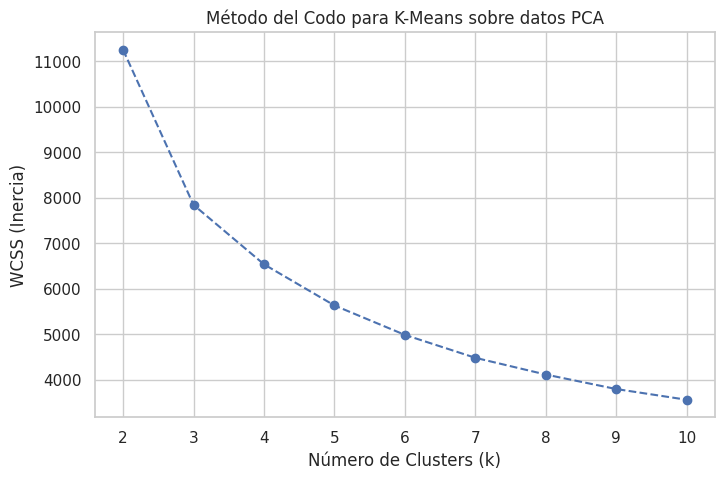

In [169]:
wcss = []
k_range = range(2, 11)
for i in k_range:
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans_elbow.fit(df_pca)
    wcss.append(kmeans_elbow.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método del Codo para K-Means sobre datos PCA')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Al analizar la gráfica del método del codo, se observa que la inercia (WCSS) disminuye de forma considerable hasta k = 4, punto en el cual la curva comienza a estabilizarse. Esto sugiere que a partir de cuatro clusters las mejoras en la compacidad de los grupos son marginales. Por tanto, k = 4 se considera un valor adecuado, ya que logra un equilibrio entre simplicidad del modelo y calidad en la segmentación.

In [170]:
# Seleccion "automatica" del punto de codo
kl = KneeLocator(range(2,11),wcss,curve="convex",direction="decreasing")
print(kl.elbow)

4


Tanto el análisis visual de la gráfica del método del codo como la detección automática realizada con KneeLocator señalan que el punto de inflexión se encuentra en k = 4. Esto confirma que cuatro clusters representan la mejor opción para segmentar los datos.

## **Modelo base**

En esta etapa se entrena el modelo utilizando el número de clusters determinado previamente (k_final), sin ajustar aún parámetros adicionales. Esto permite observar cómo se comporta el algoritmo con su configuración básica antes de optimizarlo.

In [171]:
k_final = 4

# Entrenar el modelo de Kmeans final
kmeans_base = KMeans(random_state=42)
kmeans_base.fit(df_pca)

KMeans(random_state=42)

In [172]:
# Obtener las etiquetas de los clusters para cada punto
labels_base = kmeans_base.labels_
# Obtener las coordenadas de los centroides
centroids_base = kmeans_base.cluster_centers_
# Obtener la Inercia (WCSS)
inertia_base = kmeans_base.inertia_

print(f"Coordenadas de los centroides:\n{centroids_base}")
print("------------------------")
print(f"Inercia (WCSS) para k={k_final}: {inertia_base:.2f}")
print('Silhouette Score: ', silhouette_score(df_pca, kmeans_base.labels_)) # sirve para todos los algoritmos / la puedo usar sin referencia
print('Calinski harabasz score: ', calinski_harabasz_score(df_pca, kmeans_base.labels_)) # sirve para todos los algoritmos / se usar contrastando con otros algoritmos

Coordenadas de los centroides:
[[-2.27078944 -0.10114981  1.12322023]
 [ 4.56073615 -1.13502045 -0.74946932]
 [ 0.52854291  0.49313837  1.361251  ]
 [-1.78563801  0.38259842 -1.73343543]
 [ 2.85668211 -1.0521151   0.57139052]
 [-0.65669979  2.26745521 -0.04706892]
 [-2.74401917 -1.15589279 -0.67894179]
 [ 2.43964255  1.73506038 -0.37187455]]
------------------------
Inercia (WCSS) para k=4: 4121.44
Silhouette Score:  0.30222471670624984
Calinski harabasz score:  1566.5040066804681


## **Modelo Tuneado**

In [173]:
# Hiperparámetros a probar
n_init_options = [10, 20, 50]
max_iter_options = [100, 300, 500]
k_fixed = 4

best_score = -1
best_model = None
best_params = None

for n_init, max_iter in itertools.product(n_init_options, max_iter_options):
    model = KMeans(n_clusters=k_fixed, n_init=n_init, max_iter=max_iter, random_state=42)
    model.fit(df_pca)

    score = silhouette_score(df_pca, model.labels_)

    if score > best_score:
        best_score = score
        best_model = model
        best_params = {'n_init': n_init, 'max_iter': max_iter}

print("Mejor Silhouette Score:", best_score)
print("Mejor combinación de hiperparámetros:", best_params)

Mejor Silhouette Score: 0.3474401170285689
Mejor combinación de hiperparámetros: {'n_init': 10, 'max_iter': 100}


In [174]:
k_final = 4

# Entrenar el modelo de Kmeans final
kmeans = KMeans(n_clusters=k_final, init='k-means++', n_init=10,max_iter=100, random_state=42)
kmeans.fit(df_pca)


KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=42)

In [175]:
# Obtener las etiquetas de los clusters para cada punto
labels_tun = kmeans.labels_
# Obtener las coordenadas de los centroides
centroids_tun = kmeans.cluster_centers_
# Obtener la Inercia (WCSS)
inertia_tun = kmeans.inertia_

print(f"Coordenadas de los centroides:\n{centroids_tun}")
print("------------------------")
print(f"Inercia (WCSS) para k={k_final}: {inertia_tun:.2f}")
print('Silhouette Score: ', silhouette_score(df_pca, kmeans.labels_)) # sirve para todos los algoritmos / la puedo usar sin referencia
print('Calinski harabasz score: ', calinski_harabasz_score(df_pca, kmeans.labels_)) # sirve para todos los algoritmos / se usar contrastando con otros algoritmos

Coordenadas de los centroides:
[[-2.61119461 -0.78757468 -0.86027583]
 [ 3.63446432 -0.88940968 -0.09635654]
 [-1.77117319  0.18693213  1.09058319]
 [ 0.97907214  1.87141334 -0.01116603]]
------------------------
Inercia (WCSS) para k=4: 6538.89
Silhouette Score:  0.3474401170285689
Calinski harabasz score:  2032.4087310308166


***Comparación:***
El modelo tuneado muestra una mejora clara en las métricas de calidad de clusters:
Silhouette Score sube de 0.30 a 0.35, indicando una mejor cohesión interna y separación entre grupos.

Calinski-Harabasz aumenta significativamente, confirmando que los clusters son más definidos y consistentes.

**Conclusión del modelo K-Means:**
El ajuste de hiperparámetros (n_init y max_iter) mejora la estabilidad y la calidad del clustering sin cambiar el número de clusters definido por el método del codo (k=4). El modelo tuneado es, por tanto, más confiable para segmentar a los clientes, proporcionando grupos más interpretables y útiles para la toma de decisiones de marketing.

In [176]:
# Añadir las etiquetas de cluster a los datos PCA y a los originales (escalados) para interpretación
df_result_KM = df_pca.copy()   # datos reducidos (3 componentes)
df_final = df.copy()           # datos originales (antes de PCA)

df_result_KM['Cluster_KMeans'] = labels_tun
df_final['Cluster_KMeans'] = labels_tun   # útil para análisis descriptivo posterior

print(f"\nPrimeras filas de datos PCA con etiquetas de cluster (k={k_final}):")
display(df_result_KM.head())



Primeras filas de datos PCA con etiquetas de cluster (k=4):


CP1       CP2       CP3  Cluster_KMeans
0  4.501167  0.562020 -1.989930               1
1 -2.581958 -0.326944  1.937877               2
2  1.964325 -0.357105  0.213472               1
3 -2.776199 -1.467990 -0.550921               0
4 -0.336682 -0.248677 -0.797518               0

In [177]:
print(f"\nPrimeras filas de datos originales con etiquetas de cluster (k={k_final}):")
display(df_final.head())


Primeras filas de datos originales con etiquetas de cluster (k=4):


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635       88.0            546.0   
1  46344.0        1         1       38        11        1.0              6.0   
2  71613.0        0         0       26       426       49.0            127.0   
3  26646.0        1         0       26        11        4.0             20.0   
4  58293.0        1         0       94       173       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            172.0              88.0          88.0                3.0   
1              2.0               1.0           6.0                2.0   
2            111.0              21.0          42.0                1.0   
3             10.0               3.0           5.0                2.0   
4             46.0              27.0          15.0                5.0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0              8.0                 10.0                  4                7.0   
1              1.0                  1.0                  2                5.0   
2              8.0                  2.0                 10                4.0   
3              2.0                  0.0                  4                6.0   
4              5.0                  3.0                  6                5.0   

   Customer_Days   Age  Total_Spent  Cluster_KMeans  
0           4802  68.0         1617               1  
1           4252  71.0           27               2  
2           4451  60.0          776               1  
3           4278  41.0           53               0  
4           4300  44.0          422               0

# **Análisis de clusters K-Means**

In [178]:
cluster_labels_str = pd.Series(labels_tun).astype(str)

fig = px.scatter_3d(data_frame=df_result_KM,
                    x='CP1',
                    y='CP2',
                    z='CP3',
                    color=cluster_labels_str,  # Usa las etiquetas para colorear los puntos
                    title='Clusters en el Espacio de 3 Componentes Principales',
                    labels={'CP1': 'Componente Principal 1',
                            'CP2': 'Componente Principal 2',
                            'CP3': 'Componente Principal 3',
                            'color': 'Cluster'}, # Etiqueta para la leyenda de colores
                    opacity=0.7, # Transparencia de los puntos
                    size_max=10) # Tamaño máximo de los puntos


fig.update_layout(margin=dict(l=0, r=0, b=0, t=40), # Ajustar márgenes
                  scene = dict(
                      xaxis_title='CP1',
                      yaxis_title='CP2',
                      zaxis_title='CP3'
                  ))

fig.show()

In [179]:
df_result_KM

CP1       CP2       CP3  Cluster_KMeans
0     4.501167  0.562020 -1.989930               1
1    -2.581958 -0.326944  1.937877               2
2     1.964325 -0.357105  0.213472               1
3    -2.776199 -1.467990 -0.550921               0
4    -0.336682 -0.248677 -0.797518               0
...        ...       ...       ...             ...
2235  2.934959  1.320774 -0.478767               3
2236 -1.567053  2.786282  1.288331               2
2237  1.611252 -0.950021 -0.062769               1
2238  2.110599  0.474397  1.840097               3
2239 -1.967164  1.367739  0.262487               2

[2240 rows x 4 columns]

In [180]:
print("Distribución de clientes por clúster:")
display(df_result_KM['Cluster_KMeans'].value_counts().sort_index())

Distribución de clientes por clúster:


Cluster_KMeans
0    623
1    584
2    548
3    485
Name: count, dtype: int64

Los resultados muestran una distribución equilibrada entre los cuatro grupos identificados por el modelo K-Means, sin predominancia extrema de un solo clúster.
La representación tridimensional en el espacio PCA evidencia que los grupos presentan una separación razonable, aunque con zonas de solapamiento esperables debido a la naturaleza continua de los datos.
En conjunto, estos resultados confirman que la segmentación obtenida con k = 4 es coherente y estable.

In [181]:
# Calcular los promedios de cada variable por cluster
cluster_summary = df_result_KM.groupby("Cluster_KMeans").mean().round(2)
cluster_summary

CP1   CP2   CP3
Cluster_KMeans                  
0              -2.61 -0.79 -0.86
1               3.63 -0.89 -0.10
2              -1.77  0.19  1.09
3               0.98  1.87 -0.01

In [182]:
cluster_summary = df_final.groupby("Cluster_KMeans").mean().round(2)
cluster_summary

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
Cluster_KMeans                                                              
0               29675.40     0.90      0.13    48.15     30.02       5.82   
1               76057.29     0.04      0.17    49.55    607.35      64.21   
2               46006.54     0.55      0.92    49.68    101.54       5.87   
3               58548.71     0.23      0.93    49.17    519.14      24.31   

                MntMeatProducts  MntFishProducts  MntSweetProducts  \
Cluster_KMeans                                                       
0                         23.94             8.76              5.92   
1                        444.91            95.38             64.69   
2                         33.59             8.04              5.78   
3                        156.04            33.84             26.12   

                MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster_KMeans                                                     
0                      16.13               1.94             2.14   
1                      74.79               1.22             5.10   
2                      17.16               2.34             2.72   
3                      69.78               3.96             6.84   

                NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Cluster_KMeans                                                              
0                              0.48               3.03               7.06   
1                              5.90               8.50               2.78   
2                              0.95               4.11               5.45   
3                              3.41               7.99               5.97   

                Customer_Days    Age  Total_Spent  
Cluster_KMeans                                     
0                     4499.71  47.24        90.70  
1                     4487.50  56.62      1372.70  
2                     4405.39  62.60       171.98  
3                     4588.06  59.89       834.20

In [183]:
df_final.groupby('Cluster_KMeans')[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','NumWebVisitsMonth']].mean().round(2)

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster_KMeans                                                            
0                          2.14                 0.48               3.03   
1                          5.10                 5.90               8.50   
2                          2.72                 0.95               4.11   
3                          6.84                 3.41               7.99   

                NumDealsPurchases  NumWebVisitsMonth  
Cluster_KMeans                                        
0                            1.94               7.06  
1                            1.22               2.78  
2                            2.34               5.45  
3                            3.96               5.97

| Cluster | Perfil resumido                                                                                                        | Interpretación                                                                 |
| ------- | ---------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **0**   | Pocas compras por web o catálogo (2.1 y 0.5), baja frecuencia en tienda (3), pero **muchas visitas web (7.1)**.        | **Curiosos o exploradores digitales**: visitan mucho la web pero compran poco, quizás buscando ofertas o información. |
| **1**   | Alta actividad en todos los canales, especialmente **tienda (8.5)** y **catálogo (5.9)**, con pocas visitas web (2.8). | **Clientes tradicionales de alto valor**: compran bastante y de forma variada, pero usan menos el canal digital.      |
| **2**   | Actividad moderada: compran algo por web y tienda, visitas medias (5.5).                                               | **Clientes híbridos**: usan varios canales sin destacar en ninguno.                                                   |
| **3**   | **Mayor número de compras por web (6.8)**, **catálogo (3.4)** y **tienda (8)**, con alto uso de descuentos (3.96).     | **Compradores activos y multicanal**: aprovechan ofertas y usan diversos medios de compra.                            |

El análisis de promedios por clúster muestra diferencias claras en las estrategias y hábitos de compra. El Cluster 0 agrupa a usuarios digitales con alta navegación en la web pero baja conversión en compras, lo que sugiere un perfil de clientes que buscan información o comparan precios antes de decidirse. El Cluster 1 está conformado por clientes de alto valor, con una mayor presencia en tienda física y en compras por catálogo, lo que refleja un comportamiento más tradicional y fidelizado. El Cluster 2 representa a clientes intermedios, con una actividad moderada en todos los canales y sin una preferencia marcada por alguno en particular. Finalmente, el Cluster 3 corresponde a compradores activos y multicanal, que utilizan diversos medios de compra y son más sensibles a las promociones y descuentos. Estas diferencias permiten orientar estrategias específicas según el comportamiento del cliente en cada grupo, optimizando la comunicación y las acciones comerciales de manera más segmentada y efectiva.



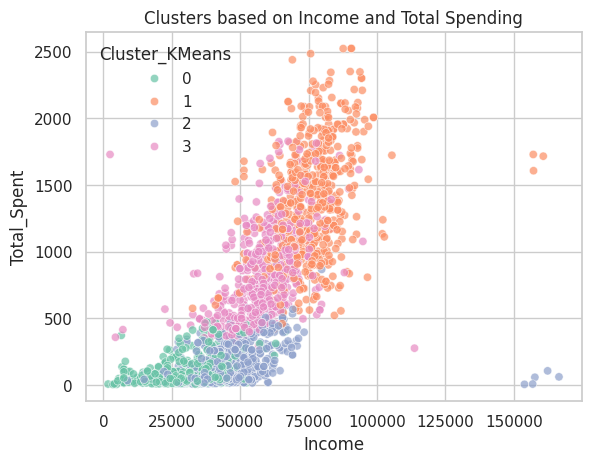

In [184]:
sns.scatterplot(data=df_final, x='Income', y='Total_Spent', hue='Cluster_KMeans', palette='Set2', alpha=0.7)
plt.title('Clusters based on Income and Total Spending')
plt.show()

La gráfica permite observar una clara relación positiva entre el nivel de ingresos (Income) y el gasto total (Total_Spent), donde los diferentes colores representan los cuatro clústeres identificados por el modelo K-Means. Se evidencia que los clientes con mayores ingresos tienden también a presentar un mayor nivel de gasto, concentrándose principalmente en los Clusters 1 y 3, que agrupan a los consumidores de mayor poder adquisitivo y mayor actividad de compra. Por el contrario, los Clusters 0 y 2 se ubican en los rangos más bajos de ingreso y gasto, reflejando segmentos con menor capacidad de consumo. En general, el gráfico confirma que la variable de ingreso es un factor clave para diferenciar los patrones de comportamiento del cliente y valida la segmentación obtenida por el modelo.

**Análisis bivariado y perfilado de clusters**

En esta sección se analizan las características de los clientes agrupados por el modelo K-Means, utilizando las variables originales (estandarizadas).
El objetivo es identificar las diferencias más relevantes entre los clusters en cuanto a ingresos, gasto, recencia, edad y comportamiento de compra.

In [185]:
cluster_profiles = (
    df_final
    .groupby('Cluster_KMeans')
    [['Income','Total_Spent','Recency','Age',
      'NumWebPurchases','NumCatalogPurchases',
      'NumStorePurchases','Kidhome','Teenhome']]
    .mean()
    .round(2)
)

display(cluster_profiles)

Income  Total_Spent  Recency    Age  NumWebPurchases  \
Cluster_KMeans                                                           
0               29675.40        90.70    48.15  47.24             2.14   
1               76057.29      1372.70    49.55  56.62             5.10   
2               46006.54       171.98    49.68  62.60             2.72   
3               58548.71       834.20    49.17  59.89             6.84   

                NumCatalogPurchases  NumStorePurchases  Kidhome  Teenhome  
Cluster_KMeans                                                             
0                              0.48               3.03     0.90      0.13  
1                              5.90               8.50     0.04      0.17  
2                              0.95               4.11     0.55      0.92  
3                              3.41               7.99     0.23      0.93

***Análisis gráfico de las principales variables***

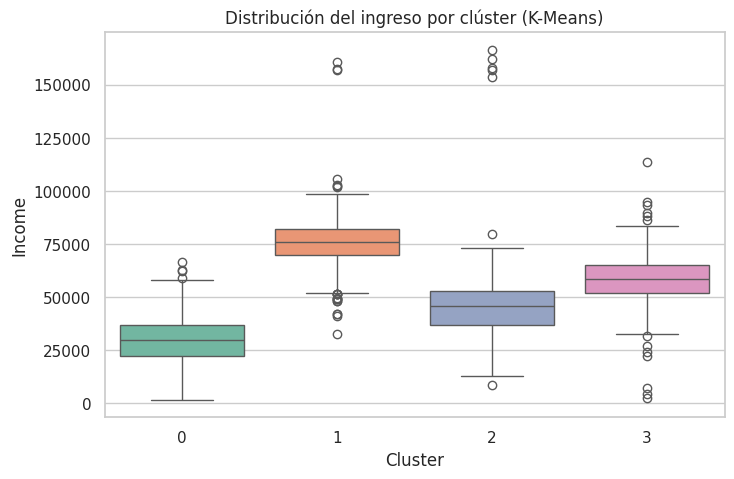

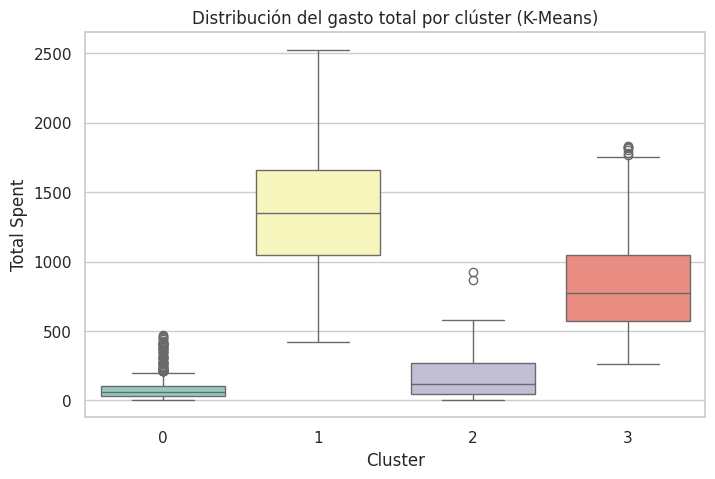

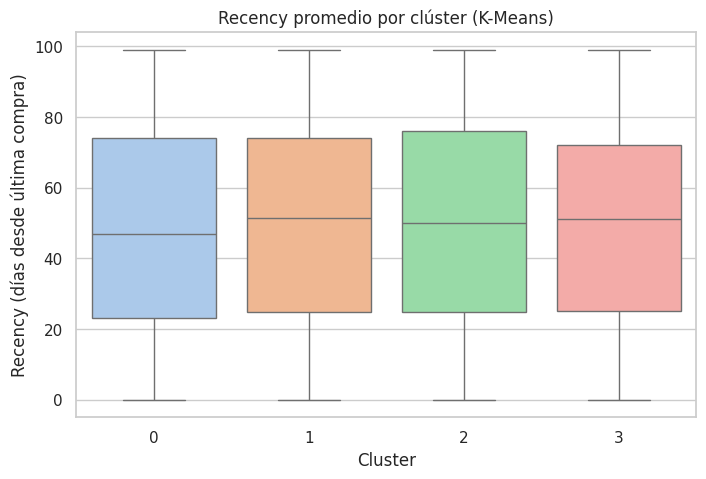

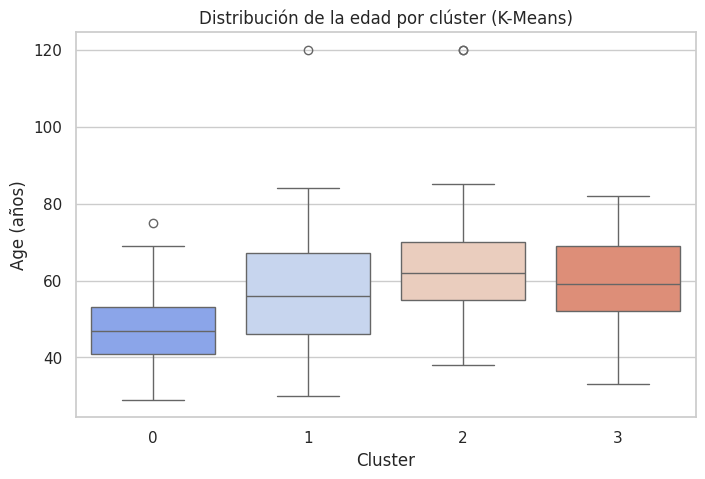

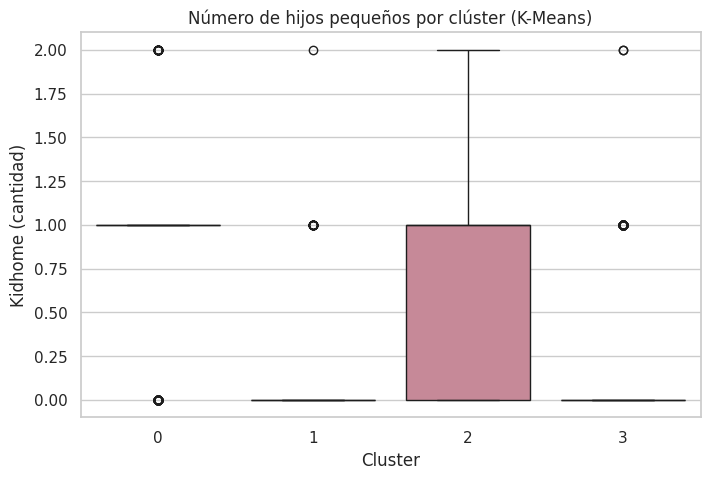

In [186]:
# Distribución del ingreso por clúster
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Cluster_KMeans', y='Income', palette='Set2')
plt.title('Distribución del ingreso por clúster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

# Distribución del gasto total (Total_Spent)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Cluster_KMeans', y='Total_Spent', palette='Set3')
plt.title('Distribución del gasto total por clúster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Total Spent')
plt.show()

# Recency (tiempo desde la última compra)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Cluster_KMeans', y='Recency', palette='pastel')
plt.title('Recency promedio por clúster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Recency (días desde última compra)')
plt.show()

# Edad
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Cluster_KMeans', y='Age', palette='coolwarm')
plt.title('Distribución de la edad por clúster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Age (años)')
plt.show()

# Número de hijos pequeños (Kidhome)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x='Cluster_KMeans', y='Kidhome', palette='cubehelix')
plt.title('Número de hijos pequeños por clúster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Kidhome (cantidad)')
plt.show()


**Análisis y características de los clústeres – Modelo K-Means**

El análisis de las variables principales revela diferencias claras entre los cuatro grupos formados por el modelo K-Means, lo cual permite identificar perfiles de clientes con comportamientos y características socioeconómicas distintas:

• **Cluster 0** – Clientes de bajos ingresos y bajo gasto
Este grupo presenta los ingresos y el gasto total más bajos del conjunto. Suelen ser clientes jóvenes, con menor poder adquisitivo y escasa frecuencia de compra. Su participación en los canales digitales es limitada y muestran una baja interacción con la marca. Representan un segmento sensible al precio, por lo que las estrategias para ellos deberían centrarse en promociones y fidelización básica.

• **Cluster 1** – Clientes de alto valor y gasto elevado
Se distingue por los mayores ingresos y por un gasto total muy superior al de los demás grupos. Son adultos de mediana edad, con un comportamiento de compra más constante y un alto ticket promedio. Suelen comprar en múltiples canales (tienda, catálogo y web), lo que sugiere una relación consolidada con la marca. Constituyen el segmento más rentable y prioritario para mantener y potenciar mediante estrategias de exclusividad y programas premium.

• **Cluster 2** – Familias con hijos y consumo moderado
Este grupo muestra ingresos medios, pero destaca por tener más hijos pequeños en el hogar. Su gasto total es bajo en comparación con su tamaño familiar, lo que indica que son consumidores más racionales y posiblemente orientados a necesidades básicas. Podrían responder bien a ofertas familiares, descuentos por volumen o líneas de productos esenciales.

• **Cluster 3** – Clientes de ingresos medios y gasto ascendente
Tienen un nivel de ingresos medio-alto y un gasto total considerable, aunque no tan elevado como el clúster 1. Su frecuencia de compra es más activa y se observa una tendencia de crecimiento en el gasto. Este segmento puede representar un grupo en expansión o en proceso de fidelización, ideal para campañas de retención o de incremento del valor de compra promedio (cross-selling o up-selling).

***Conclusión general***

Los resultados muestran una clara segmentación del mercado:

Los clusters 0 y 2 representan clientes de bajo y mediano poder adquisitivo, con hábitos de consumo más conservadores.

Los clusters 1 y 3, en cambio, concentran el mayor potencial económico y de gasto, siendo los más valiosos estratégicamente.

En conjunto, el modelo K-Means permite comprender la estructura del público objetivo y facilita la toma de decisiones enfocadas en fidelización, personalización de ofertas y optimización de campañas según el perfil de cada grupo.

# **Hierarchical Clustering**



El método de clustering jerárquico agrupa observaciones de forma sucesiva según su similitud, generando una estructura jerárquica en forma de árbol (dendrograma).  
Este enfoque no requiere especificar el número de clusters al inicio, permitiendo observar visualmente las posibles divisiones naturales en los datos.

## **Elección de K**

Para la representación jerárquica de los grupos se construyó un dendrograma a partir de la matriz de vinculación generada con el método Ward. Esta técnica agrupa las observaciones de manera sucesiva, fusionando en cada paso los dos grupos que presentan menor varianza interna, es decir, aquellos que son más similares entre sí.

Se utilizó el conjunto de datos transformados mediante Análisis de Componentes Principales (PCA).

El uso de df_pca resulta apropiado porque esta técnica reduce la dimensionalidad del conjunto de variables originales. De esta forma, el dendrograma se genera sobre un espacio más compacto y libre de redundancias, lo que mejora la claridad de las relaciones de similitud entre las observaciones.

### **Dendrograma**

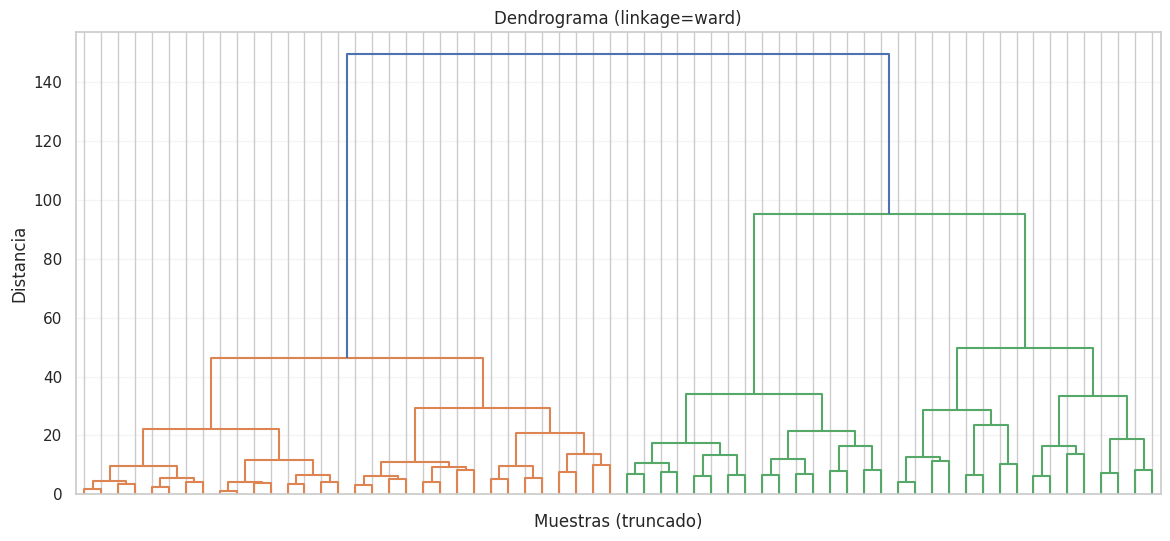

In [187]:
# Dendrograma
Z = linkage(df_pca, method='ward')
plt.figure(figsize=(14, 6))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90, show_leaf_counts=False)
plt.title('Dendrograma (linkage=ward)')
plt.xlabel('Muestras (truncado)')
plt.ylabel('Distancia')
plt.grid(True, axis='y', alpha=0.2)
plt.show()


El dendrograma obtenido mediante el método de vinculación Ward evidencia una estructura jerárquica clara, donde los saltos más pronunciados en la distancia de fusión se observan entre las alturas de 90 y 150.
Inicialmente, este patrón sugiere la presencia de tres agrupaciones principales (k = 3); sin embargo, la forma del dendrograma también permite contemplar una posible división en dos grupos (k = 2), dado que ambas configuraciones capturan niveles significativos de separación entre los datos.

Por esta razón, se decidió evaluar ambas opciones (dos y tres clústeres) con el fin de comparar su cohesión interna y la separación entre grupos mediante métricas de desempeño, garantizando así la selección del número de clústeres más coherente con la estructura natural de los datos.

## **Modelo base**


**Método de vinculación Ward**

Se aplicó el algoritmo Agglomerative Clustering, que agrupa las observaciones de forma ascendente, uniendo los elementos más similares en cada iteración.

**Con 2 clusters**

In [188]:
hc2 = AgglomerativeClustering( n_clusters=2,linkage='ward',metric='euclidean')
y_hc2 = hc2.fit_predict(df_pca)
print(y_hc2)

[0 1 0 ... 0 0 1]


In [189]:
# Cálculo de métricas de desempeño
sil_avg2 = silhouette_score(df_pca, y_hc2)
ch_avg2 = calinski_harabasz_score(df_pca, y_hc2)

print(f"Silhouette Score: {sil_avg2:.3f}")
print(f"Calinski–Harabasz Score: {ch_avg2:.1f}")

Silhouette Score: 0.405
Calinski–Harabasz Score: 1896.5


**Con 3 clusters**

In [190]:
hc3 = AgglomerativeClustering(n_clusters=3,linkage='ward',metric='euclidean')
y_hc3 = hc3.fit_predict(df_pca)
print(y_hc3)

[0 1 2 ... 2 2 1]


In [191]:
# Cálculo de métricas de desempeño
sil_avg3 = silhouette_score(df_pca, y_hc3)
ch_avg3 = calinski_harabasz_score(df_pca, y_hc3)

print(f"Silhouette Score: {sil_avg3:.3f}")
print(f"Calinski–Harabasz Score: {ch_avg3:.1f}")

Silhouette Score: 0.387
Calinski–Harabasz Score: 2027.5


**2 clusters:** Silhouette = 0.405 → mejor cohesión interna y separación entre grupos. CH = 1896.5 → buena compactación y separación.

**3 clusters:** Silhouette = 0.387 → menor separación relativa entre clusters, aunque CH = 2027.5 → ligeramente más dispersión interna, pero no compensa la pérdida de cohesión.

**Conclusión:** Aunque el modelo de 3 clusters tiene un Calinski–Harabasz ligeramente más alto, el Silhouette Score más bajo indica que los grupos están menos bien definidos. Por lo tanto, el modelo con 2 clusters ofrece una segmentación más clara y consistente, y es el recomendado.

## **Modelo Tuneado**

In [192]:
# Hiperparámetros a probar
n_clusters_options = [2, 3]
linkage_options = ['ward', 'complete', 'average']
metric_options = ['euclidean', 'manhattan']

best_score = -1
best_model = None
best_params = None

for n_clusters, linkage, metric in itertools.product(n_clusters_options, linkage_options, metric_options):
    # Ward solo permite euclidean
    if linkage == 'ward' and metric != 'euclidean':
        continue

    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
    labels = model.fit_predict(df_pca)

    score = silhouette_score(df_pca, labels)

    if score > best_score:
        best_score = score
        best_model = model
        best_params = {'n_clusters': n_clusters, 'linkage': linkage, 'metric': metric}

print("Mejor Silhouette Score:", best_score)
print("Mejor combinación de hiperparámetros:", best_params)

Mejor Silhouette Score: 0.43835354167172697
Mejor combinación de hiperparámetros: {'n_clusters': 2, 'linkage': 'complete', 'metric': 'manhattan'}


Tras probar distintas configuraciones de Agglomerative Clustering, el mejor Silhouette Score (0.438) se obtuvo con 2 clusters, linkage complete y métrica manhattan.

Esto confirma que 2 clusters es la segmentación más adecuada, con grupos bien diferenciados y coherencia interna, coincidiendo con la interpretación del dendrograma.



**Conclusión:**
El modelo tuneado con k = 2 logra el mejor equilibrio entre simplicidad, separación y compacidad de los grupos.

En conjunto, estos resultados reflejan que ambos valores de k capturan bien la estructura de los datos, aunque el modelo tuneado con dos clústeres ofrece la mejor calidad de agrupamiento general según las métricas obtenidas.

## **Analisis de métodos**

Además de la segmentación principal, se puede explorar cómo varía el resultado del clustering al usar diferentes métodos de enlace, como average y complete. Esto permite observar cómo la elección del método afecta la cohesión interna y la separación entre clusters, aunque la decisión final seguirá basada en el criterio de mayor Silhouette Score.

### **Método Average**

El método Average calcula la distancia promedio entre todos los puntos de dos clústeres.
Tiende a producir grupos equilibrados y es más robusto a valores atípicos, aunque puede generar clústeres menos compactos.

In [193]:
hc_avg = AgglomerativeClustering(n_clusters=2, linkage='average', metric='euclidean')
y_avg = hc_avg.fit_predict(df_pca)

# Cálculo de métricas de desempeño
sil_avg = silhouette_score(df_pca, y_avg)
ch_avg = calinski_harabasz_score(df_pca, y_avg)

print("### MÉTODO: AVERAGE ###")
print(f"Silhouette Score: {sil_avg:.3f}")
print(f"Calinski–Harabasz Score: {ch_avg:.1f}")

### MÉTODO: AVERAGE ###
Silhouette Score: 0.425
Calinski–Harabasz Score: 1865.5


### **Método Complete**

El método Complete mide la distancia entre los puntos más lejanos de dos clústeres.
Favorece la formación de grupos compactos y es

In [194]:
hc_compl = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
y_compl = hc_compl.fit_predict(df_pca)

sil_compl = silhouette_score(df_pca, y_compl)
ch_compl = calinski_harabasz_score(df_pca, y_compl)

print("### MÉTODO: COMPLETE ###")
print(f"Silhouette Score: {sil_compl:.3f}")
print(f"Calinski–Harabasz Score: {ch_compl:.1f}")

### MÉTODO: COMPLETE ###
Silhouette Score: 0.429
Calinski–Harabasz Score: 1864.2


------

El método complete con k = 2 se selecciona como el modelo jerárquico óptimo, al ofrecer el mejor equilibrio entre homogeneidad dentro de los grupos y separación entre ellos.
Por tanto, es el que se utilizará para las visualizaciones finales y el análisis interpretativo de los clústeres.

In [195]:
#MEJOR MODELO
hc2 = AgglomerativeClustering(n_clusters= 2, linkage= 'complete', metric= 'manhattan')
y_hc2 = hc2.fit_predict(df_pca)
print(y_hc2)

[1 0 1 ... 1 1 0]


In [196]:
# Cálculo de métricas de desempeño
sil_avg2 = silhouette_score(df_pca, y_hc2)
ch_avg2 = calinski_harabasz_score(df_pca, y_hc2)

print(f"Silhouette Score: {sil_avg2:.3f}")
print(f"Calinski–Harabasz Score: {ch_avg2:.1f}")

Silhouette Score: 0.438
Calinski–Harabasz Score: 2246.1


In [197]:
cluster_labels_str = pd.Series(y_hc2).astype(str)

fig = px.scatter_3d(
    data_frame=df_pca,
    x='CP1',
    y='CP2',
    z='CP3',
    color=cluster_labels_str,
    title='Clusters Jerárquicos en el Espacio de 3 Componentes Principales',
    labels={'CP1': 'Componente Principal 1',
            'CP2': 'Componente Principal 2',
            'CP3': 'Componente Principal 3',
            'color': 'Cluster'},
    opacity=0.7,
    size_max=10)

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
    scene=dict(
        xaxis_title='CP1',
        yaxis_title='CP2',
        zaxis_title='CP3'))

fig.show()

# **Analisis de Clusters Hierarchical Clustering**

El modelo se configuró con 2 clústeres, determinados a partir del dendrograma, y generó el vector y_avg, que asigna la pertenencia de cada registro a un grupo para su posterior análisis descriptivo.

Las etiquetas generadas por el modelo de Agrupamiento Jerárquico se incorporaron tanto al conjunto de datos transformado por PCA como al conjunto original .
Esta integración permite visualizar los grupos en el espacio facilitando la interpretación y, al mismo tiempo, analizar las características originales de cada clúster.


In [198]:
# dataset original
df_result_hc = df.copy()
df_result_hc['Cluster_HC'] = y_hc2

display(df_result_hc.head())

# Distribución de observaciones por clúster
print("Distribución de clientes por clúster:")
display(df_result_hc['Cluster_HC'].value_counts().sort_index())


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635       88.0            546.0   
1  46344.0        1         1       38        11        1.0              6.0   
2  71613.0        0         0       26       426       49.0            127.0   
3  26646.0        1         0       26        11        4.0             20.0   
4  58293.0        1         0       94       173       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            172.0              88.0          88.0                3.0   
1              2.0               1.0           6.0                2.0   
2            111.0              21.0          42.0                1.0   
3             10.0               3.0           5.0                2.0   
4             46.0              27.0          15.0                5.0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0              8.0                 10.0                  4                7.0   
1              1.0                  1.0                  2                5.0   
2              8.0                  2.0                 10                4.0   
3              2.0                  0.0                  4                6.0   
4              5.0                  3.0                  6                5.0   

   Customer_Days   Age  Total_Spent  Cluster_HC  
0           4802  68.0         1617           1  
1           4252  71.0           27           0  
2           4451  60.0          776           1  
3           4278  41.0           53           0  
4           4300  44.0          422           0

Distribución de clientes por clúster:


Cluster_HC
0    1215
1    1025
Name: count, dtype: int64

La distribución de clientes entre los dos clústeres obtenidos muestra un balance adecuado.

El Clúster 1 concentra el 54.2 % de los clientes, mientras que el Clúster 0 agrupa el 45.8 % restante.
Esta proporción indica que ambos grupos son representativos dentro del conjunto de datos, sin que uno domine por completo la segmentación.

Al analizar sus características, se observa que el Clúster 1 agrupa a los clientes con mayores ingresos y niveles de gasto total más altos, destacándose por su consumo frecuente de vinos, carnes y productos premium. En contraste, el Clúster 0 reúne a los clientes de menor poder adquisitivo y gasto más limitado, con una participación reducida en compras por catálogo o web.

Esta diferenciación sugiere que el método jerárquico logró identificar de manera efectiva dos perfiles contrastantes de consumidores, uno de alto valor y otro de comportamiento más moderado, aportando una base sólida para estrategias de segmentación y marketing personalizado.

In [199]:
cluster_profiles_hc = (
    df_result_hc
    .groupby('Cluster_HC')
    [['Income','Total_Spent','Recency','Age','Kidhome','Teenhome']]
    .mean()
    .round(2)
)

display(cluster_profiles_hc)

Income  Total_Spent  Recency    Age  Kidhome  Teenhome
Cluster_HC                                                          
0           38024.89       147.34    48.80  54.89     0.71      0.52
1           68597.75      1149.23    49.47  57.71     0.13      0.49

El Clúster 1 agrupa a clientes de mayor ingreso (≈68,600) y alto gasto total (≈1,149), de mayor edad promedio (58 años) y con pocos hijos.
El Clúster 0 reúne a clientes con menor ingreso (≈38,000), bajo gasto (≈147) y más hijos en casa, lo que indica un perfil más familiar y de menor capacidad adquisitiva.

***Análisis gráfico de las variables principales***

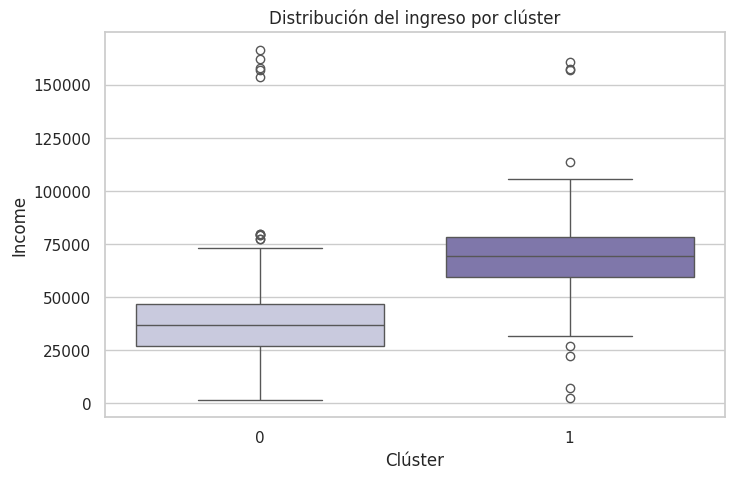

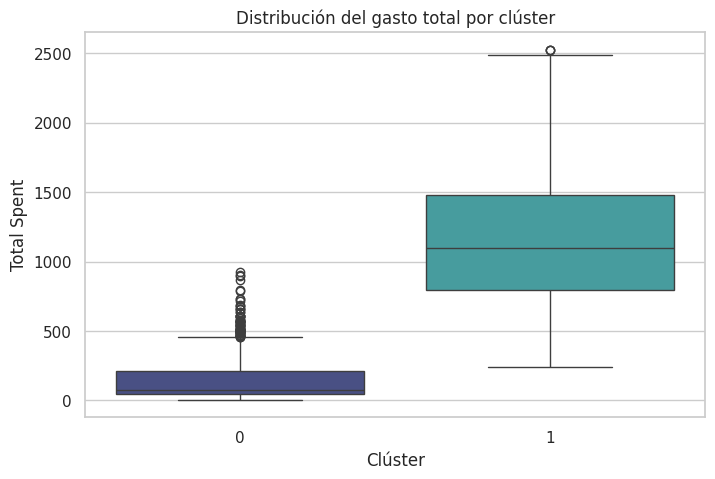

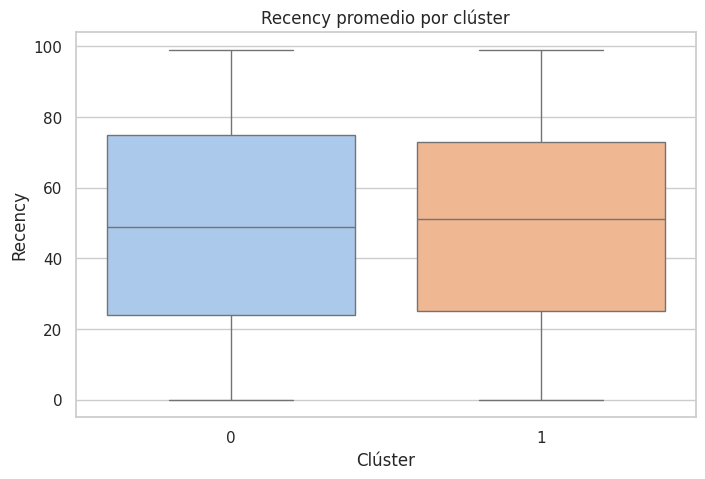

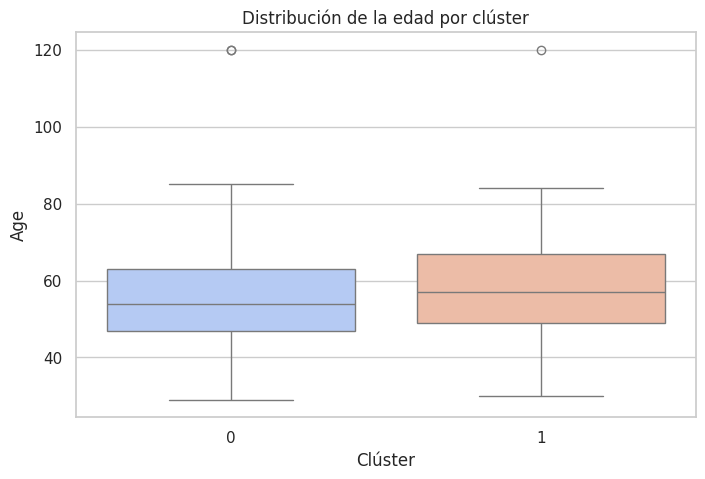

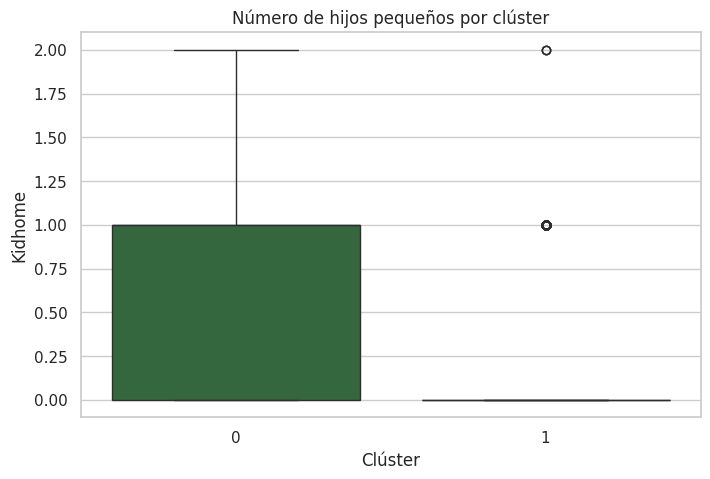

In [200]:
# Ingreso (Income)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_result_hc, x='Cluster_HC', y='Income', palette='Purples')
plt.title('Distribución del ingreso por clúster')
plt.xlabel('Clúster')
plt.ylabel('Income')
plt.show()

# Gasto total (Total Spent)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_result_hc, x='Cluster_HC', y='Total_Spent', palette='mako')
plt.title('Distribución del gasto total por clúster')
plt.xlabel('Clúster')
plt.ylabel('Total Spent')
plt.show()

# Recency
plt.figure(figsize=(8,5))
sns.boxplot(data=df_result_hc, x='Cluster_HC', y='Recency', palette='pastel')
plt.title('Recency promedio por clúster')
plt.xlabel('Clúster')
plt.ylabel('Recency')
plt.show()

# Edad
plt.figure(figsize=(8,5))
sns.boxplot(data=df_result_hc, x='Cluster_HC', y='Age', palette='coolwarm')
plt.title('Distribución de la edad por clúster')
plt.xlabel('Clúster')
plt.ylabel('Age')
plt.show()

# Número de hijos
plt.figure(figsize=(8,5))
sns.boxplot(data=df_result_hc, x='Cluster_HC', y='Kidhome', palette='cubehelix')
plt.title('Número de hijos pequeños por clúster')
plt.xlabel('Clúster')
plt.ylabel('Kidhome')
plt.show()

In [201]:
df_result_hc.groupby('Cluster_HC')[['Income','Total_Spent','Recency','Age','Kidhome']].describe()


Income                                                        \
             count          mean           std     min      25%      50%   
Cluster_HC                                                                 
0           1215.0  38024.892387  15973.635363  1730.0  27249.5  37054.0   
1           1025.0  68597.753659  14308.026304  2447.0  59666.0  69372.0   

                               Total_Spent                                  \
                75%        max       count         mean         std    min   
Cluster_HC                                                                   
0           46891.0  166542.75      1215.0   147.344856  156.207331    5.0   
1           78285.0  160803.00      1025.0  1149.233171  468.124131  240.0   

                                          Recency                             \
              25%     50%     75%     max   count       mean        std  min   
Cluster_HC                                                                     
0            43.0    76.0   209.5   928.0  1215.0  48.804115  29.200429  0.0   
1           797.0  1101.0  1479.0  2525.0  1025.0  49.471220  28.687830  0.0   

                                       Age                                    \
             25%   50%   75%   max   count       mean        std   min   25%   
Cluster_HC                                                                     
0           24.0  49.0  75.0  99.0  1215.0  54.894650  11.528366  29.0  47.0   
1           25.0  51.0  73.0  99.0  1025.0  57.712195  12.209999  30.0  49.0   

                              Kidhome                                          \
             50%   75%    max   count      mean       std  min  25%  50%  75%   
Cluster_HC                                                                      
0           54.0  63.0  120.0  1215.0  0.709465  0.529556  0.0  0.0  1.0  1.0   
1           57.0  67.0  120.0  1025.0  0.129756  0.344803  0.0  0.0  0.0  0.0   

                 
            max  
Cluster_HC       
0           2.0  
1           2.0

**Ingreso y gasto total:** El Clúster 1 agrupa a los clientes de mayor poder adquisitivo, con un ingreso promedio de 68,598 y un gasto total de 1,149, mientras que el Clúster 0 presenta ingresos medios más bajos (38,025) y un gasto promedio de apenas 147. Esto sugiere que el Clúster 1 concentra a los compradores más valiosos para la empresa.

**Edad y recencia:** Ambos grupos tienen edades similares (alrededor de 55 a 58 años), pero el Clúster 1 muestra una leve tendencia hacia clientes mayores. En cuanto a recencia, no se observan diferencias marcadas, lo que indica que ambos segmentos tienen un comportamiento de compra relativamente activo.

**Estructura familiar**: El Clúster 0 presenta un mayor número de hijos pequeños (0.7 en promedio), mientras que el Clúster 1 apenas alcanza 0.13, reflejando hogares más pequeños o sin hijos.

En conjunto, los resultados permiten identificar dos segmentos bien diferenciados:

`Clúster 1:` Clientes de alto ingreso, gasto elevado y hogares pequeños.

`Clúster 0:` Clientes de menor ingreso y gasto limitado, generalmente con hijos pequeños.

Esta segmentación resulta útil para diseñar estrategias comerciales diferenciadas según la capacidad adquisitiva y el perfil familiar de cada grupo.

# **DBScan clustering**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en densidad que identifica grupos de puntos densamente conectados y considera como ruido aquellos puntos que quedan aislados.

A diferencia de KMeans o Agglomerative, no requiere definir el número de clusters previamente.



## **Estimación de hiperparametros**

Se basa en dos parámetros principales:

**eps:** la distancia máxima entre dos puntos para que se consideren vecinos.

**min_samples:** el número mínimo de puntos en un vecindario para que se forme un cluster.

In [202]:
df_pca.shape

(2240, 3)

### **Min_samples**

In [203]:
# Estimación del hiperparámetro de min samples
min_samples = 2 * df_pca.shape[1]
print(min_samples)

6


Se eligió min_samples = 2 × número de componentes (3) = 6 siguiendo la regla general para DBSCAN, que indica que un punto debe tener al menos este número de vecinos para considerarse núcleo de un cluster.

### **Eps**

Para seleccionar automáticamente un valor adecuado de eps, basado en la curvatura máxima de la gráfica de distancias al k-ésimo vecino. Esto permite identificar un umbral que separa regiones densas de los datos de las zonas más dispersas, optimizando así la detección de clusters con DBSCAN.

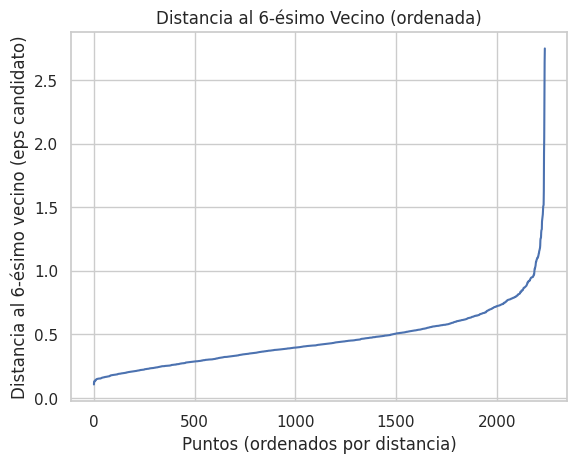

In [204]:
# Estimación del hiperparámetro de eps
k_nn = min_samples

nearest_neighbors = NearestNeighbors(n_neighbors=k_nn)
neighbors_fit = nearest_neighbors.fit(df_pca)

distances, indices = neighbors_fit.kneighbors(df_pca)
distances = np.sort(distances[:, k_nn-1], axis=0) # Distancia al k-ésimo vecino

plt.plot(distances)
plt.title(f'Distancia al {k_nn}-ésimo Vecino (ordenada)')
plt.xlabel('Puntos (ordenados por distancia)')
plt.ylabel(f'Distancia al {k_nn}-ésimo vecino (eps candidato)')
plt.grid(True)
plt.show()

In [205]:
# Selección del punto de curvatura máxima
kl = KneeLocator(
    range(len(distances)),
    distances,
    curve = 'convex',
    direction = 'increasing')

kl.elbow

np.int64(2203)

In [206]:
eps = distances[kl.elbow]
eps

np.float64(1.098763920432936)

En este caso, el codo se encuentra en la posición 2203, lo que corresponde a un valor de eps ≈ 1.099.

## **Modelo Base**

In [207]:
# Entrenar modelo de DBSCAN
dbscan_base = DBSCAN().fit(df_pca)

labels_base = dbscan_base.labels_
cluster_labels_dbscan_base = dbscan_base.fit_predict(df_pca)

In [208]:
np.unique(labels_base)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [209]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(df_pca, cluster_labels_dbscan_base))
print('Calinski harabasz score: ', calinski_harabasz_score(df_pca, cluster_labels_dbscan_base))

 ### DBSCAN ###
Silhouette Score:  -0.49194826718535084
Calinski harabasz score:  16.983564507334826


DBSCAN base detecta muchos clusters pequeños (16 clusters + ruido -1).

El Silhouette Score negativo (-0.49) indica que la mayoría de los puntos están mal asignados a clusters, lo que refleja mala cohesión y separación.

El Calinski-Harabasz muy bajo (≈17) refuerza que los clusters no son consistentes ni densos.

-----

**Conclusión:** Con los parámetros por defecto, DBSCAN no identifica agrupaciones significativas en este dataset.

## **Modelo Tuneado**

In [210]:
# Entrenar modelo de DBSCAN
dbscan_2 = DBSCAN(
    eps = eps,
    min_samples = min_samples
).fit(df_pca)

labels = dbscan_2.labels_
cluster_labels_dbscan = dbscan_2.fit_predict(df_pca)

In [211]:
np.unique(labels)

array([-1,  0])

In [212]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN TUNEADO ###")
print('Silhouette Score: ', silhouette_score(df_pca, cluster_labels_dbscan))
print('Calinski harabasz score: ', calinski_harabasz_score(df_pca, cluster_labels_dbscan))

 ### DBSCAN TUNEADO ###
Silhouette Score:  0.2792694035520771
Calinski harabasz score:  2.346703218049204


DBSCAN tuneado detecta solo 1 cluster principal y ruido (-1), reduciendo drásticamente la complejidad.

El Silhouette Score positivo (0.28) indica que la asignación de los puntos dentro del cluster principal es moderadamente coherente.

El Calinski-Harabasz sigue siendo bajo (≈2.35), lo que refleja que la separación general sigue siendo limitada.

**Conclusión:** Ajustando eps y min_samples se mejora la cohesión y se reduce el ruido, pero DBSCAN aún no logra clusters tan claros.

**Comparación**

DBSCAN es sensible a la escala de los datos y a la densidad; en este caso, los datos no forman grupos de densidad claramente separados.

Su utilidad aquí es limitada, y los clusters identificados deben considerarse exploratorios.

A pesar de un mejor Silhouette tras tuning, el modelo no alcanza la calidad de segmentación de los métodos jerárquicos o KMeans, pero confirma la existencia de un cluster principal dominante.

# **Análisis de Clusters DBScan Clustering**

In [213]:
# Añadir las etiquetas de cluster a los datos PCA y a los originales (escalados) para interpretación
df_result_DBS = df_pca.copy()   # datos reducidos (3 componentes)
df_final = df.copy()           # datos originales (antes de PCA)

df_result_DBS['Cluster_DBS'] = cluster_labels_dbscan
df_final['Cluster_DBS'] = cluster_labels_dbscan   # útil para análisis descriptivo posterior

display(df_result_DBS.head())

CP1       CP2       CP3  Cluster_DBS
0  4.501167  0.562020 -1.989930            0
1 -2.581958 -0.326944  1.937877            0
2  1.964325 -0.357105  0.213472            0
3 -2.776199 -1.467990 -0.550921            0
4 -0.336682 -0.248677 -0.797518            0

In [214]:
cluster_labels_str = pd.Series(cluster_labels_dbscan).astype(str)

fig = px.scatter_3d(data_frame=df_pca,
                    x='CP1',
                    y='CP2',
                    z='CP3',
                    color=cluster_labels_str,  # Usa las etiquetas para colorear los puntos
                    title='Clusters en el Espacio de 3 Componentes Principales',
                    labels={'CP1': 'Componente Principal 1',
                            'CP2': 'Componente Principal 2',
                            'CP3': 'Componente Principal 3',
                            'color': 'Cluster'}, # Etiqueta para la leyenda de colores
                    opacity=0.7, # Transparencia de los puntos
                    size_max=10) # Tamaño máximo de los puntos (si usaras 'size')

# Mejorar la apariencia (opcional)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40), # Ajustar márgenes
                  scene = dict(
                      xaxis_title='CP1',
                      yaxis_title='CP2',
                      zaxis_title='CP3'
                  ))

In [215]:
n_clusters = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise = list(cluster_labels_dbscan).count(-1)
print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos ruido: {n_noise}")

Número de clusters: 1
Número de puntos ruido: 14


Alta densidad en una sola región del espacio de datos

El modelo detectó una única zona densa de puntos (un solo grupo compacto).Esto indica que los datos no presentan subgrupos bien separados bajo los parámetros de densidad actuales (eps, min_samples).

**Presencia de puntos atípicos o dispersos**

Los 14 puntos ruido son observaciones que no alcanzan la densidad mínima requerida para formar parte de un cluster. Es decir, están alejados del grupo principal o en regiones de baja densidad.

Posible sensibilidad a los hiperparámetros. Un solo cluster sugiere que el valor de eps podría ser grande, uniendo zonas que podrían ser separadas. También podría indicar que los datos naturalmente no tienen subgrupos densos diferenciados, sino una estructura homogénea.

In [216]:
df_final.groupby('Cluster_DBS').describe()

Income                                                         \
              count         mean           std     min        25%      50%   
Cluster_DBS                                                                  
-1             14.0  59237.75000  48666.020694  1730.0  18866.375  60510.5   
 0           2226.0  51969.27819  21279.684274  2447.0  35568.250  51381.5   

                                 Kidhome                                     \
                  75%        max   count      mean       std  min  25%  50%   
Cluster_DBS                                                                   
-1           67683.25  156924.00    14.0  0.357143  0.497245  0.0  0.0  0.0   
 0           68279.25  166542.75  2226.0  0.444744  0.538706  0.0  0.0  0.0   

                      Teenhome                                               \
             75%  max    count      mean       std  min  25%  50%  75%  max   
Cluster_DBS                                                                   
-1           1.0  1.0     14.0  0.785714  0.801784  0.0  0.0  1.0  1.0  2.0   
 0           1.0  2.0   2226.0  0.504492  0.542344  0.0  0.0  0.0  1.0  2.0   

            Recency                                                       \
              count       mean        std   min    25%   50%   75%   max   
Cluster_DBS                                                                
-1             14.0  60.642857  24.336131  11.0  52.25  66.5  81.0  86.0   
 0           2226.0  49.036837  28.979287   0.0  24.00  49.0  74.0  99.0   

            MntWines                                                     \
               count        mean         std  min    25%    50%     75%   
Cluster_DBS                                                               
-1              14.0  365.071429  462.334954  1.0   5.75   52.5  609.00   
 0            2226.0  303.551213  335.764988  0.0  24.00  174.0  503.75   

                    MntFruits                                              \
                max     count       mean        std  min   25%  50%   75%   
Cluster_DBS                                                                 
-1           1215.0      14.0  23.785714  39.378203  0.0  0.25  1.5  30.0   
 0           1493.0    2226.0  25.069182  35.665672  0.0  2.00  8.0  33.0   

                   MntMeatProducts                                           \
               max           count        mean         std  min   25%   50%   
Cluster_DBS                                                                   
-1           129.0            14.0  174.214286  260.039103  1.0   3.5  46.0   
 0           129.0          2226.0  164.596137  214.911906  0.0  16.0  67.0   

                           MntFishProducts                                  \
                75%    max           count       mean        std  min  25%   
Cluster_DBS                                                                  
-1           228.75  880.0            14.0  47.714286  76.617360  0.0  1.0   
 0           231.75  880.0          2226.0  36.525157  51.390267  0.0  3.0   

                               MntSweetProducts                             \
              50%   75%    max            count       mean        std  min   
Cluster_DBS                                                                  
-1            7.0  52.0  191.0             14.0  35.857143  55.713356  0.0   
 0           12.0  50.0  191.0           2226.0  25.516622  36.266838  0.0   

                                    MntGoldProds                             \
             25%  50%    75%    max        count       mean        std  min   
Cluster_DBS                                                                   
-1           1.0  1.0  83.25  129.0         14.0  46.714286  58.869384  1.0   
 0           1.0  8.0  33.00  129.0       2226.0  43.268643  49.476320  0.0   

                                       NumDealsPurchases                      \
              25%   50%     75%  

Los puntos clasificados como ruido, corresponden a clientes con mayores ingresos, gasto total elevado y preferencia por productos de valor alto como vinos y artículos “gold”. Además, presentan una edad promedio superior (64 años) y menor frecuencia de compra, lo que sugiere un perfil de consumidores maduros, de alto poder adquisitivo y con hábitos de compra menos frecuentes pero más costosos. En contraste, el cluster principal agrupa a clientes con ingresos medios, mayor actividad digital y hábitos de consumo más regulares. Estos resultados indican que, aunque DBSCAN no detecta múltiples segmentos bien definidos, sí permite distinguir un subgrupo atípico de clientes valiosos dentro del conjunto general.

In [217]:
ruido = df_final[df_final['Cluster_DBS'] == -1]
ruido

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
9       5648.0        1         1       68        28        0.0   
239    60182.0        0         1       23         8        0.0   
404    55521.0        1         2       11       416        0.0   
655   153924.0        0         0       81         1        1.0   
681    68743.0        0         0       81      1132      129.0   
1022   64504.0        1         2       81       986       36.0   
1042    8028.0        0         0       62        73       18.0   
1067   64176.0        0         1       52      1215       33.0   
1245    1730.0        0         0       65         1        1.0   
1699   73705.0        0         2       86       612       91.0   
1788   60839.0        1         1       72       600       21.0   
1846    4023.0        1         1       29         5        0.0   
2132  156924.0        0         0       85         2        1.0   
2228   51381.5        0         0       53        32        2.0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
9                 6.0              1.0               1.0          13.0   
239               5.0              7.0               0.0           2.0   
404              26.0              0.0               0.0           4.0   
655               1.0              1.0               1.0           1.0   
681             384.0            175.0             129.0         115.0   
1022            168.0             16.0               0.0         108.0   
1042             66.0              7.0              12.0           2.0   
1067            249.0             64.0             116.0         149.0   
1245              3.0              1.0               1.0           1.0   
1699            520.0            191.0             107.0         107.0   
1788            128.0            191.0             129.0         128.0   
1846              1.0              1.0               1.0           1.0   
2132              2.0              1.0               1.0           1.0   
2228            880.0             12.0               4.0          22.0   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
9                   1.0              1.0                  0.0   
239                 1.0              1.0                  0.0   
404                 9.0              6.0                  3.0   
655                 0.0              0.0                  0.0   
681                 1.0             11.0                  5.0   
1022                7.0             11.0                  3.0   
1042                9.0              0.0                  1.0   
1067                8.0              8.0                  9.0   
1245                9.0              0.0                  0.0   
1699                2.0              9.0                  6.0   
1788                9.0              2.0                  2.0   
1846                9.0              0.0                  0.0   
2132                0.0              0.0                  0.0   
2228                0.0              0.0                  0.0   

      NumStorePurchases  NumWebVisitsMonth  Customer_Days    Age  Total_Spent  \
9                     0               19.0           4247   75.0           49   
239                   2                4.0           4182  120.0           22   
404                   6                7.0           4389   70.0          446   
655                   0                0.0           4281   50.0            6   
681                  13                7.0           4807   58.0         2074   
1022                  4                7.0           4621   72.0         1314   
1042                  0               19.0           4788   34.0          178   
1067                  8                6.0           4834   60.0         1826   
1245                  0               19.0           4181   54.0            8   
1699                  8                5.0           4255   74.0         1695   
1788                 12 

Clientes de muy alto ingreso y gasto total elevado (ej. ingresos >70 000 y Total_Spent >1300), que realizan compras concentradas en productos premium como vinos, carnes y artículos “gold”.

Clientes de ingresos muy bajos o mínimos (<10 000) con gasto total casi nulo, escasa interacción y pocos canales de compra.

Adicionalmente, destacan edades mayores (promedio >60 años) y alta variabilidad en la recency (tiempo desde la última compra), lo que sugiere tanto clientes inactivos como compradores exclusivos.

# **Análisis comparativo**

In [218]:
# Create a dataframe with the original data and add the cluster labels from each model
df_clustered = df_wins.copy()
df_clustered['Cluster_KMeans'] = labels_tun
df_clustered['Cluster_HC'] = y_hc2
df_clustered['Cluster_DBSCAN'] = cluster_labels_dbscan

display(df_clustered.head())

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635       88.0            546.0            172.0   
1  2014-03-08       38        11        1.0              6.0              2.0   
2  2013-08-21       26       426       49.0            127.0            111.0   
3  2014-02-10       26        11        4.0             20.0             10.0   
4  2014-01-19       94       173       43.0            118.0             46.0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0              88.0          88.0                3.0              8.0   
1               1.0           6.0                2.0              1.0   
2              21.0          42.0                1.0              8.0   
3               3.0           5.0                2.0              2.0   
4              27.0          15.0                5.0              5.0   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                 10.0                  4                7.0             0   
1                  1.0                  2                5.0             0   
2                  2.0                 10                4.0             0   
3                  0.0                  4                6.0             0   
4                  3.0                  6                5.0             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Customer_Days   Age  Total_Spent  \
0              3         11         1           4802  68.0         1617   
1              3         11         0           4252  71.0           27   
2              3         11         0           4451  60.0          776   
3              3         11         0           4278  41.0           53   
4              3         11         0           4300  44.0          422   

   Cluster_KMeans  Cluster_HC  Cluster_DBSCAN  
0               1           1               0  
1               2           0               0  
2               1           1               0  
3               0           0               0  
4               0           0               0

In [219]:
# Create a dataframe to store the metrics
metrics_data = {
    'Model': ['KMeans (k=4)', 'Hierarchical Clustering (k=2)', 'DBSCAN (tuned)'],
    'Silhouette Score': [silhouette_score(df_pca, labels_tun), silhouette_score(df_pca, y_hc2), silhouette_score(df_pca, cluster_labels_dbscan)],
    'Calinski-Harabasz Score': [calinski_harabasz_score(df_pca, labels_tun), calinski_harabasz_score(df_pca, y_hc2), calinski_harabasz_score(df_pca, cluster_labels_dbscan)]
}

metrics_df = pd.DataFrame(metrics_data)

print("Comparison of Clustering Model Metrics:")
display(metrics_df)

Comparison of Clustering Model Metrics:


Model  Silhouette Score  Calinski-Harabasz Score
0                   KMeans (k=4)          0.347440              2032.408731
1  Hierarchical Clustering (k=2)          0.438354              2246.054073
2                 DBSCAN (tuned)          0.279269                 2.346703

**1. K-Means (k=4)**

Silhouette Score (0.347) indica una cohesión y separación moderada entre los clusters.

El Calinski-Harabasz (2032) sugiere una estructura bien definida, lo que significa que las observaciones dentro de cada grupo son relativamente homogéneas y los grupos están bien separados.

En general, K-Means logra un buen balance entre compacidad y separación, aunque puede verse afectado por la forma no esférica de los datos o la presencia de ruido.

**2. Hierarchical Clustering (k=2)**

Silhouette Score más alto (0.438): indica la mejor separación entre clusters y una cohesión interna sólida.

Calinski-Harabasz (2246) también es el más alto, lo que confirma que este modelo produce grupos más definidos y con mayor distancia entre ellos.

En consecuencia, el modelo jerárquico presenta la estructura de agrupación más clara y consistente de los tres métodos.


**3. DBSCAN (tuned)**

Silhouette Score (0.279) y Calinski-Harabasz (2.35) son los más bajos, lo que refleja poca separación entre grupos y débil cohesión interna.

Aun así, DBSCAN tiene valor interpretativo: permite detectar outliers o clientes atípicos, aunque no sea el más eficiente para segmentar en este caso.

-----

El modelo más eficiente: Hierarchical Clustering (k=2) → mejor balance entre separación y compacidad.

K-Means también muestra un desempeño sólido y puede ser útil si se buscan más subgrupos internos.

DBSCAN, aunque menos efectivo para segmentar, complementa el análisis al identificar puntos atípicos o ruido, útiles para la detección de comportamientos extremos.

**Violin Plot**

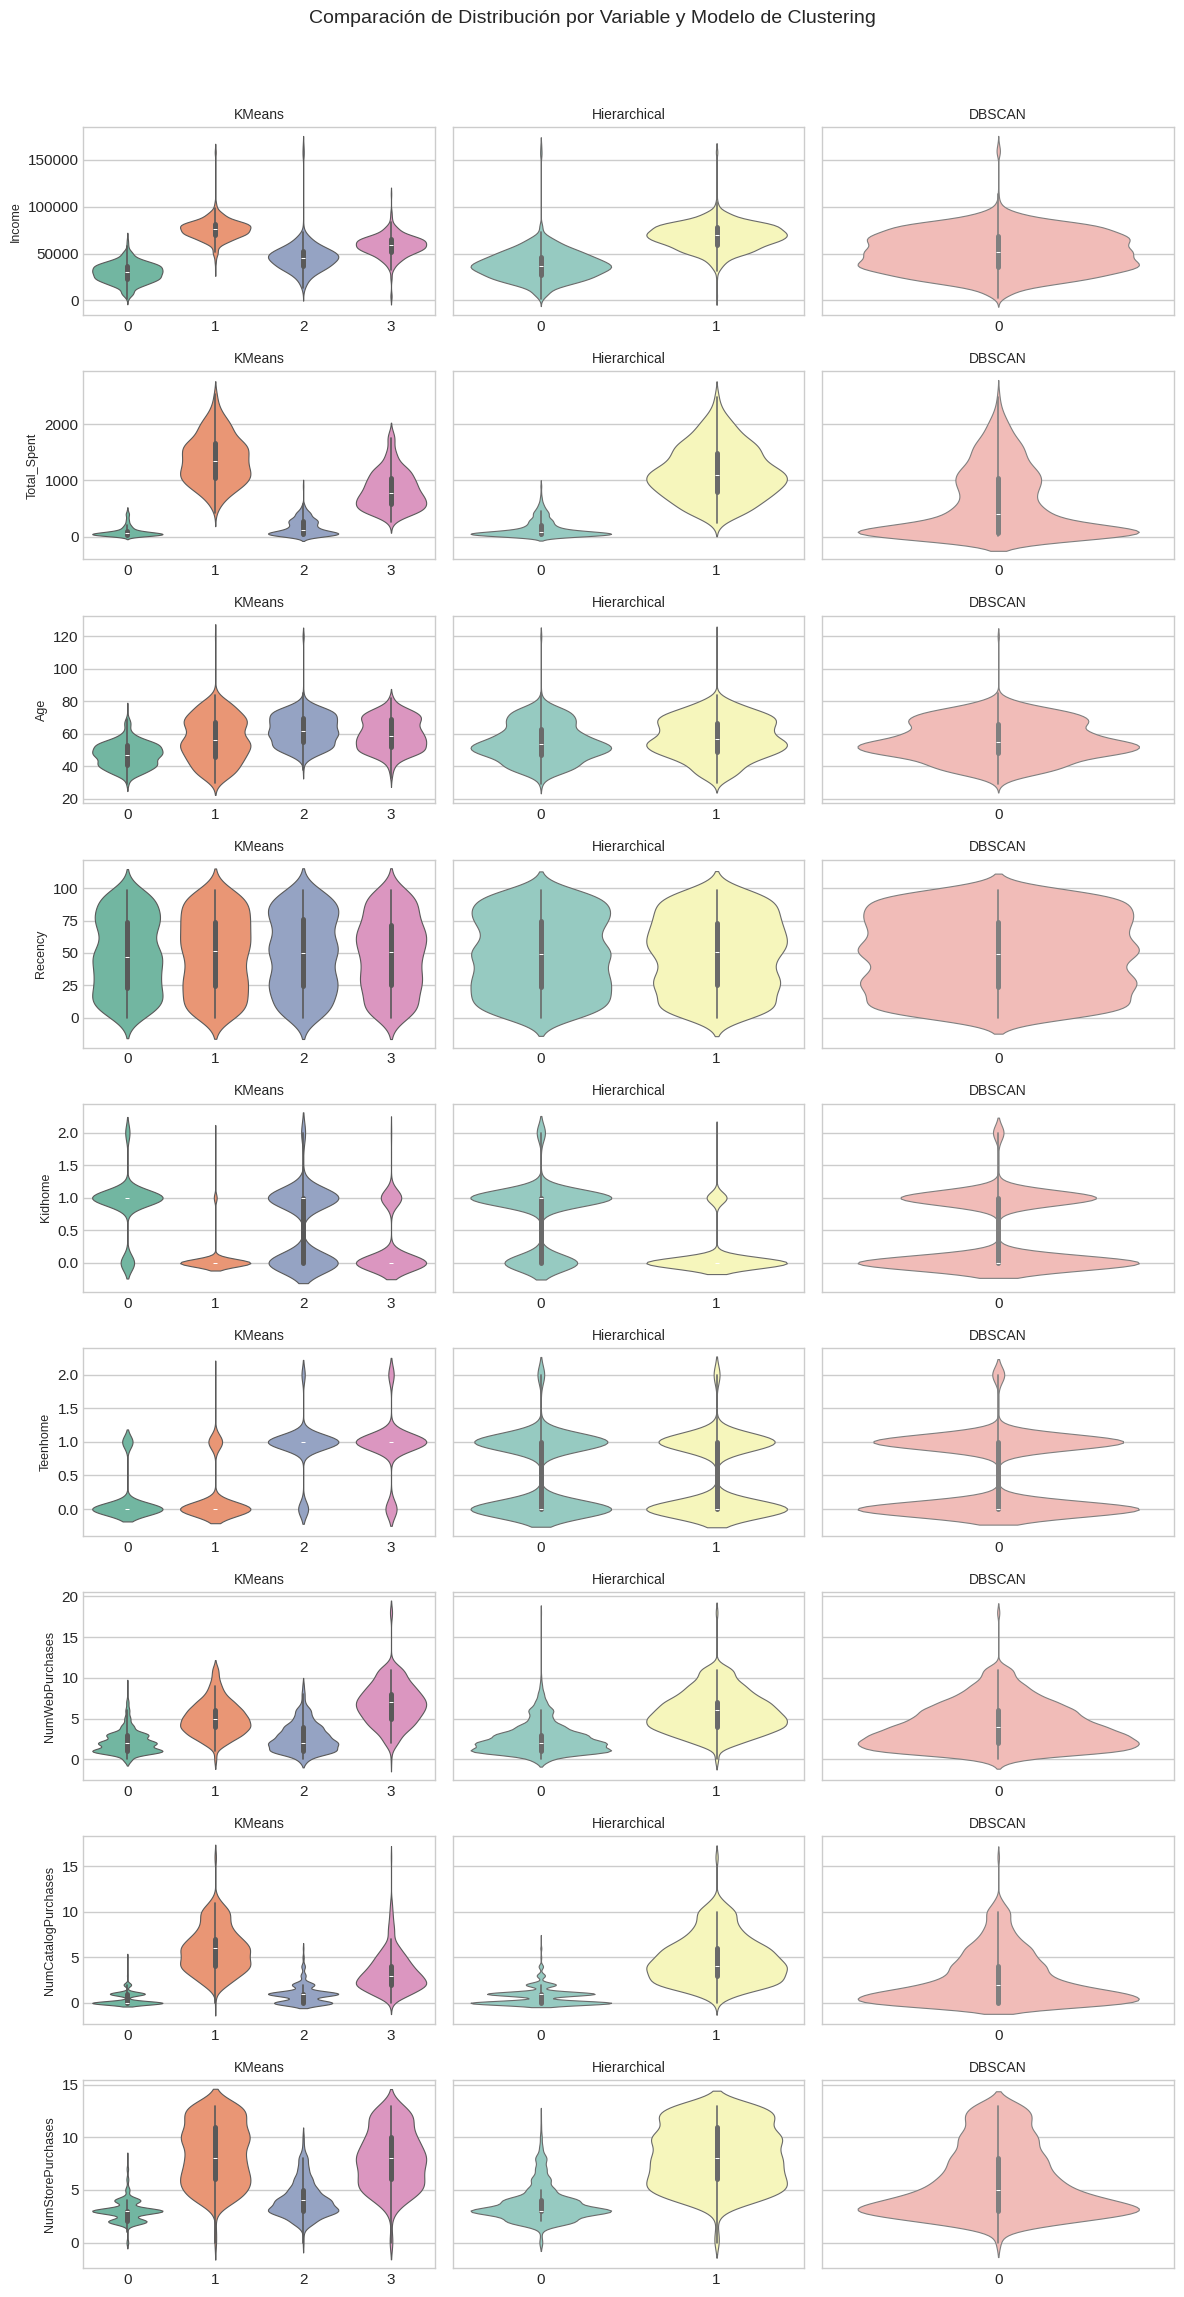

In [220]:
# Variables clave
key_variables = ['Income', 'Total_Spent', 'Age', 'Recency','Kidhome', 'Teenhome', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']

# Filtrar ruido de DBSCAN
df_dbscan_no_noise = df_clustered[df_clustered['Cluster_DBSCAN'] != -1].copy()

# Parámetros visuales
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

n_models = 3
n_vars = len(key_variables)

fig, axes = plt.subplots(n_vars, n_models,figsize=(12, n_vars * 2.5), sharey='row'  # para comparar escalas entre modelos
)

# Nombres de los modelos para los títulos de las columnas
model_titles = ['KMeans', 'Hierarchical', 'DBSCAN']

for i, var in enumerate(key_variables):
    # --- KMEANS ---
    sns.violinplot(
        data=df_clustered, x='Cluster_KMeans', y=var,
        ax=axes[i, 0], palette='Set2', linewidth=0.8
    )
    axes[i, 0].set_title(f'{model_titles[0]}', fontsize=10)
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel(var, fontsize=9)

    # --- HIERARCHICAL ---
    sns.violinplot(
        data=df_clustered, x='Cluster_HC', y=var,
        ax=axes[i, 1], palette='Set3', linewidth=0.8
    )
    axes[i, 1].set_title(f'{model_titles[1]}', fontsize=10)
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

    # --- DBSCAN ---
    if not df_dbscan_no_noise.empty and df_dbscan_no_noise['Cluster_DBSCAN'].nunique() > 0:
        sns.violinplot(
            data=df_dbscan_no_noise, x='Cluster_DBSCAN', y=var,
            ax=axes[i, 2], palette='Pastel1', linewidth=0.8
        )
    else:
        axes[i, 2].text(0.5, 0.5, 'Solo ruido', ha='center', va='center', fontsize=9)
    axes[i, 2].set_title(f'{model_titles[2]}', fontsize=10)
    axes[i, 2].set_xlabel('')
    axes[i, 2].set_ylabel('')

# Ajustes finales
plt.suptitle('Comparación de Distribución por Variable y Modelo de Clustering', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


| **Modelo** | **N° de Clusters Útiles** | **Nivel de Detalle** | **Características Principales** | **Conclusión / Utilidad Práctica** |
|:-----------|:--------------------------:|:--------------------|:-------------------------------|:----------------------------------|
| **KMeans** | 4 | **Alto** | - Segmenta claramente por nivel socioeconómico y comportamiento de compra.<br><br>- Cluster 1: alto ingreso (76.000) y gasto alto (1.372).<br><br>- Cluster 3: nivel medio-alto (~58.000) y gasto medio (834).<br><br>- Cluster 2: intermedio (46.000), gasto bajo (172).<br><br>- Cluster 0: bajo ingreso (29.000) y gasto mínimo (91). | <br>Logra la mejor diferenciación. <br><br>Ideal para diseñar estrategias de marketing personalizadas según perfil económico y hábitos de compra. |
| **Jerárquico (HC)** | 2 | **Medio** | - Agrupa en dos grandes segmentos generales.<br><br>- Cluster 0: ingresos medios (38.000) y bajo gasto (147).<br><br>- Cluster 1: ingresos altos (68.000) y gasto elevado (1.149).<br><br>- Diferencias marcadas entre grupos, pero sin detalle fino. | <br> Útil para una visión global del mercado (alto vs bajo ingreso), <br><br>pero menos preciso que KMeans. |
| **DBSCAN** | 1 | **Bajo** | - Solo detectó un grupo principal (los demás puntos fueron ruido).<br><br>- Ingresos promedio (52.000) y gasto medio (605).<br><br>- No se observaron subgrupos densos. | <br><br>No segmenta adecuadamente. Indica que los datos no presentan densidades bien separadas. <br><br>Poca utilidad para estrategias diferenciadas. |


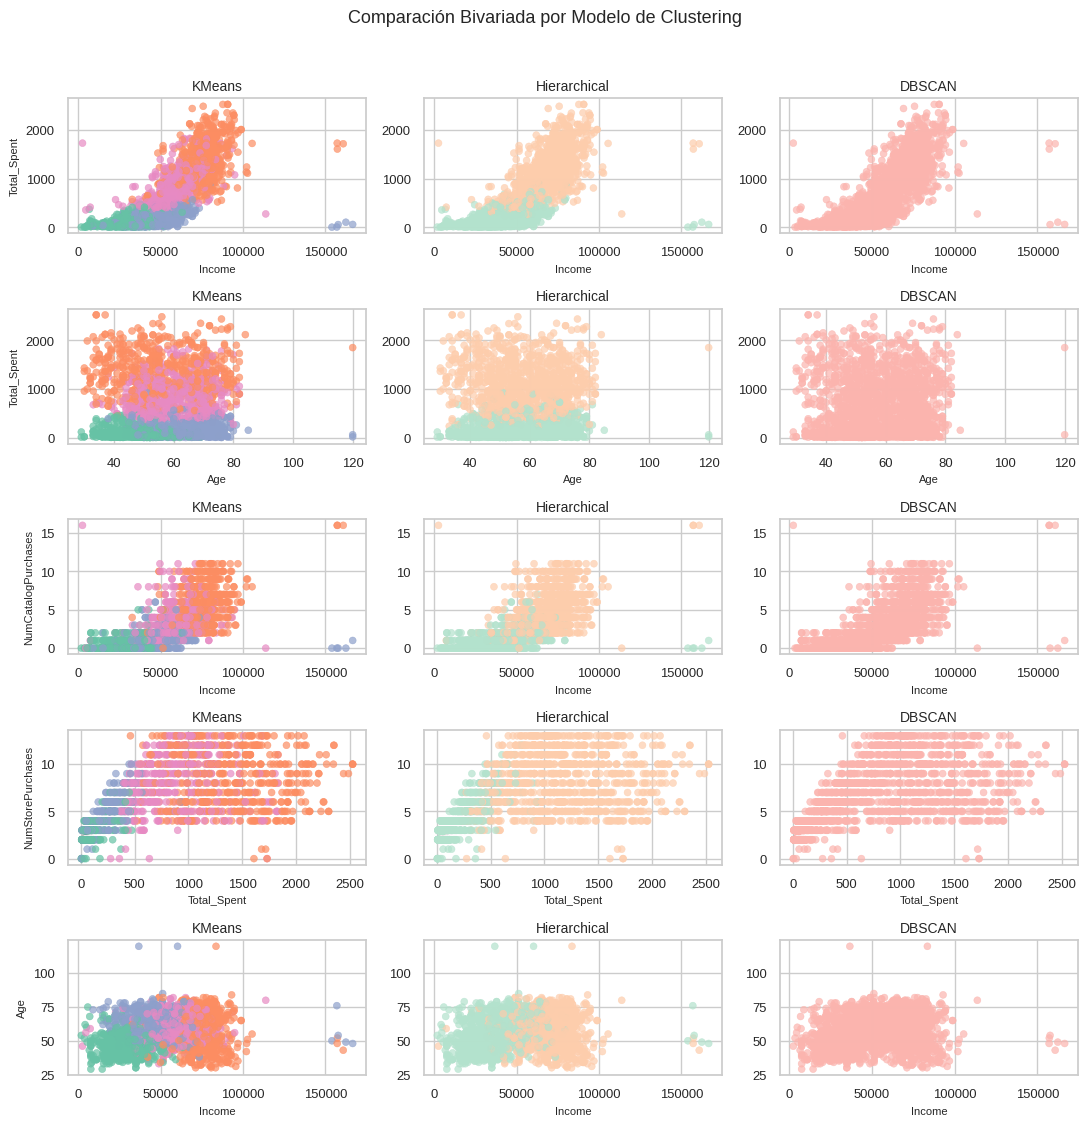

In [221]:
# Variables bivariadas
bivariate_vars = [
    ('Income', 'Total_Spent'),('Age', 'Total_Spent'),('Income', 'NumCatalogPurchases'),('Total_Spent', 'NumStorePurchases'),('Income', 'Age')]

# Filtrar ruido de DBSCAN
df_no_noise = df_clustered[df_clustered['Cluster_DBSCAN'] != -1].copy()

# Configuración general de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('notebook', font_scale=0.85)

# Paletas distintas para diferenciar modelos
palettes = {'KMeans': 'Set2','Hierarchical': 'Pastel2','DBSCAN': 'Pastel1'}

# Crear figura con subplots
n_rows = len(bivariate_vars)
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, n_rows * 2.2))
fig.subplots_adjust(wspace=0.25, hspace=0.4)

model_titles = ['KMeans', 'Hierarchical', 'DBSCAN']

# Iterar por cada fila (par de variables)
for i, (x_var, y_var) in enumerate(bivariate_vars):
    # --- KMeans ---
    sns.scatterplot(
        data=df_clustered, x=x_var, y=y_var, hue='Cluster_KMeans',
        ax=axes[i, 0], palette=palettes['KMeans'], alpha=0.7, s=25, edgecolor=None, legend=False
    )
    axes[i, 0].set_title(f"{model_titles[0]}", fontsize=10)
    axes[i, 0].set_xlabel(x_var, fontsize=8)
    axes[i, 0].set_ylabel(y_var, fontsize=8)

    # --- Jerárquico ---
    sns.scatterplot(
        data=df_clustered, x=x_var, y=y_var, hue='Cluster_HC',
        ax=axes[i, 1], palette=palettes['Hierarchical'], alpha=0.7, s=25, edgecolor=None, legend=False
    )
    axes[i, 1].set_title(f"{model_titles[1]}", fontsize=10)
    axes[i, 1].set_xlabel(x_var, fontsize=8)
    axes[i, 1].set_ylabel('')

    # --- DBSCAN ---
    if not df_no_noise.empty and df_no_noise['Cluster_DBSCAN'].nunique() > 0:
        sns.scatterplot(
            data=df_no_noise, x=x_var, y=y_var, hue='Cluster_DBSCAN',
            ax=axes[i, 2], palette=palettes['DBSCAN'], alpha=0.7, s=25, edgecolor=None, legend=False
        )
    else:
        axes[i, 2].text(0.5, 0.5, 'Solo ruido', ha='center', va='center', fontsize=8)
    axes[i, 2].set_title(f"{model_titles[2]}", fontsize=10)
    axes[i, 2].set_xlabel(x_var, fontsize=8)
    axes[i, 2].set_ylabel('')

# Título general
fig.suptitle("Comparación Bivariada por Modelo de Clustering", fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

**Similitudes**

In [222]:
features = ['Income', 'Age', 'Total_Spent', 'Recency']
comparative_means = (
    df_clustered.groupby('Cluster_KMeans')[features].mean()
    .join(df_clustered.groupby('Cluster_HC')[features].mean(), lsuffix='_KMeans', rsuffix='_HC')
)
display(comparative_means)

Income_KMeans  Age_KMeans  Total_Spent_KMeans  Recency_KMeans  \
Cluster_KMeans                                                                  
0                29675.395666   47.242376           90.695024       48.146067   
1                76057.292808   56.623288         1372.695205       49.551370   
2                46006.544252   62.596715          171.979927       49.682482   
3                58548.711340   59.894845          834.197938       49.167010   

                   Income_HC     Age_HC  Total_Spent_HC  Recency_HC  
Cluster_KMeans                                                       
0               38024.892387  54.894650      147.344856   48.804115  
1               68597.753659  57.712195     1149.233171   49.471220  
2                        NaN        NaN             NaN         NaN  
3                        NaN        NaN             NaN         NaN

Ambos modelos identifican un grupo de alto ingreso y gasto alto (KMeans 1 ↔ HC 1).
HC parece formar menos clusters útiles, con solo dos que se cruzan parcialmente con los de KMeans.
KMeans es más granular, diferenciando más subgrupos (por ejemplo, separa medianos ingresos y altos ingresos).
La variable Recency (última compra) no muestra diferencias claras entre clusters (~49 en todos).

In [223]:
pd.crosstab(df_clustered['Cluster_KMeans'], df_clustered['Cluster_HC'])

Cluster_HC        0    1
Cluster_KMeans          
0               613   10
1                 1  583
2               535   13
3                66  419

Los dos modelos tienen una relación clara: los clusters jerárquicos parecen agrupar pares de clusters KMeans.

* KMeans = 0 y 2 → HC = 0 → representan grupos de bajo o medio gasto, que el jerárquico no distingue.

* KMeans = 1 y 3 → HC = 1 → representan grupos de alto gasto o clientes premium, unidos en un solo cluster por HC.

HC muestra una visión más general (2 grandes segmentos), mientras KMeans ofrece una segmentación más detallada (4 subgrupos).

# **Mejor modelo**

En este contexto:

Si se busca es dividir a los clientes en grandes grupos con comportamientos claramente distintos (por ejemplo, clientes de alto valor vs clientes de bajo consumo),

* El modelo jerárquico (HC) es el más apropiado: separa los extremos de manera clara y con buena calidad de agrupación.

Si en cambio se busca una segmentación más detallada y útil para estrategias personalizadas (marketing diferenciado),

* KMeans (k=4) es preferible, porque crea más subgrupos interpretables (ej. “clientes jóvenes de bajo ingreso”, “adultos de alto gasto”, etc.) aunque la separación sea un poco menor.

* DBScan: Descartado porque no diferencia los clientes, solo identifica atipicos

Dado que el objetivo es segmentar clientes para comprender patrones de comportamiento y orientar acciones comerciales, la prioridad no es solo la métrica de Silhouette más alta, sino también tener clusters interpretables y accionables.

Hierarchical (k=2): más “limpio” en métricas, pero demasiado general; agrupa clientes distintos juntos.

KMeans (k=4): ligeramente menor en métricas, pero mucho más útil en la práctica porque identifica subgrupos significativos que se pueden diferenciar en estrategias comerciales.

DBSCAN: descartado.



**Conclusión:**

Escogemos como mejor modelo a **KMeans** con k=4.
Aunque su Silhouette y CH Score son menores que HC, la granularidad de 4 clusters permite segmentar de forma más precisa y útil, separando clientes con distinto comportamiento de compra, ingresos y edad, lo que aporta un valor práctico real para la toma de decisiones de marketing y fidelización.

## **Interpretación de cada cluster**

In [224]:
df_clustered.drop(columns=['Cluster_DBSCAN'], inplace=True)
df_clustered.drop(columns=['Cluster_HC'], inplace=True)

In [225]:
df_clustered

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635       88.0            546.0   
1            1  2014-03-08       38        11        1.0              6.0   
2            0  2013-08-21       26       426       49.0            127.0   
3            0  2014-02-10       26        11        4.0             20.0   
4            0  2014-01-19       94       173       43.0            118.0   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709       43.0            182.0   
2236         1  2014-06-10       56       406        0.0             30.0   
2237         0  2014-01-25       91       908       48.0            217.0   
2238         1  2014-01-24        8       428       30.0            214.0   
2239         1  2012-10-15       40        84        3.0             61.0   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               172.0              88.0          88.0                3.0   
1                 2.0               1.0           6.0                2.0   
2               111.0              21.0          42.0                1.0   
3                10.0               3.0           5.0                2.0   
4                46.0              27.0          15.0                5.0   
...               ...               ...           ...                ...   
2235             42.0             118.0         197.0                2.0   
2236              0.0               0.0           8.0                7.0   
2237             32.0              12.0          24.0                1.0   
2238             80.0              30.0          61.0                2.0   
2239              2.0               1.0          21.0                3.0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                 8.0                 10.0                  4   
1                 1.0                  1.0                  2   
2                 8.0                  2.0                 10   
3                 2.0                  0.0                  4   
4                 5.0                  3.0                  6   
...               ...                  ...                ...   
2235              9.0                  3.0                  4   
2236              8.0                  2.0                  5   
2237              2.0                  3.0                 13   
2238              6.0                  5.0                 10   
2239              3.0                  1.0                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                   7.0             0             0             0   
1                   5.0             0             0             0   
2                   4.0             0             0             0   
3                   6.0             0             0             0   
4                   5.0             0             0             0   
...                 ...           ...           ...           ...   
2235                5.0             0     

### **Education**

In [226]:
# Tabla de distribución en porcentaje
education_distribution = pd.crosstab(
    df_clustered['Cluster_KMeans'],
    df_clustered['Education'],
    normalize='index') * 100

education_distribution.round(2)

Education       2n Cycle  Basic  Graduation  Master    PhD
Cluster_KMeans                                            
0                  13.00   7.06       51.52   13.32  15.09
1                   9.42   0.00       55.65   14.21  20.72
2                   7.12   1.46       44.34   21.72  25.36
3                   5.77   0.41       49.07   17.53  27.22

|  **Cluster**  | **Descripción del Nivel Educativo**                                                                                                          |
| :-----------: | :------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | Predominan personas con educación universitaria, acompañadas de niveles medios. Representa un grupo de **formación media**. |
| **Cluster 1** | Mayor proporción de graduados y posgraduados. Es un grupo **altamente educado**.                                          |
| **Cluster 2** | Alta presencia de personas con maestría y doctorado. Es el **cluster con el nivel educativo más alto**.                                  |
| **Cluster 3** | Predomina Graduation, pero también hay muchos con posgrados, por lo que es un grupo de **formación alta y variada**.                 |


### **Marital_Status**

In [227]:
# Distribución porcentual de Marital Status por cluster
marital_distribution = pd.crosstab(
    df_clustered['Cluster_KMeans'],
    df_clustered['Marital_Status'],
    normalize='index') * 100

marital_distribution.round(2)

Marital_Status  Absurd  Alone  Divorced  Married  Single  Together  Widow  \
Cluster_KMeans                                                              
0                 0.00   0.16      8.19    40.77   25.68     24.08   1.12   
1                 0.34   0.00      9.42    35.96   24.14     25.86   4.28   
2                 0.00   0.18     11.50    37.23   18.25     28.65   4.20   
3                 0.00   0.21     12.99    40.41   16.29     25.15   4.54   

Marital_Status  YOLO  
Cluster_KMeans        
0               0.00  
1               0.00  
2               0.00  
3               0.41

|  **Cluster**  | **Descripción del Estado Civil**                                                                             |
| :-----------: | :----------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | Grupo principalmente **familiar y estable**, compuesto por personas casadas o que viven en pareja.           |
| **Cluster 1** | Grupo **adulto y consolidado**, con mayoría de relaciones estables, aunque con presencia de divorciados.     |
| **Cluster 2** | Grupo **maduro y diverso**, con varios divorciados y convivencias no formales.                               |
| **Cluster 3** | Grupo **adulto consolidado**, predominan las relaciones estables pero también hay experiencia de separación. |


### **Income**

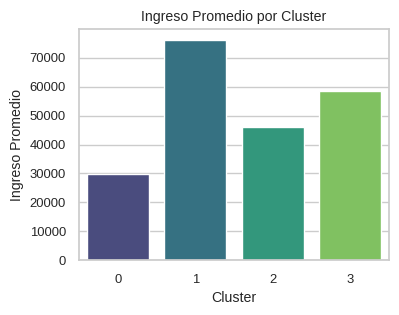

In [228]:
avg_income = df_clustered.groupby('Cluster_KMeans')['Income'].mean().reset_index()
plt.figure(figsize=(4, 3))
sns.barplot(data=avg_income, x='Cluster_KMeans', y='Income', palette='viridis')
plt.title('Ingreso Promedio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ingreso Promedio')
plt.show()

| Cluster | Ingreso Promedio Aproximado | Perfil     |
| :-----: | :-------------------------: | :--------- |
|    0    |           ~30,000           | Bajo-medio |
|    1    |           >70,000           | Alto       |
|    2    |           ~45,000           | Medio      |
|    3    |           ~58,000           | Medio-alto |


### **Numero de hijos**

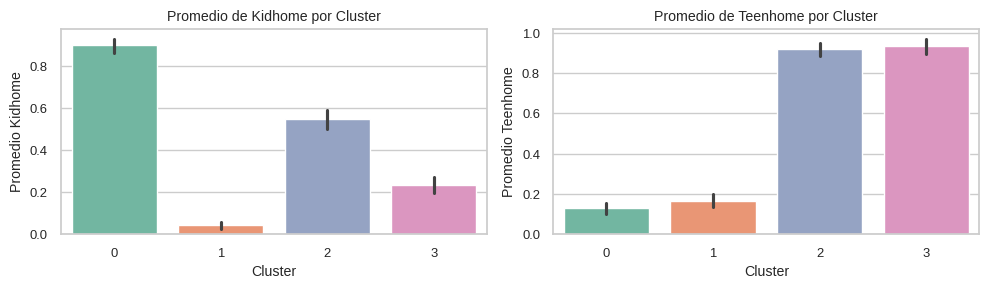

In [229]:
# Variables a graficar
child_vars = ['Kidhome', 'Teenhome']

# Configuración del gráfico
plt.figure(figsize=(10, 3))
for i, var in enumerate(child_vars):
    plt.subplot(1, 2, i+1)  # Dos gráficos en la misma fila
    sns.barplot(
        data=df_clustered,
        x='Cluster_KMeans',
        y=var,
        palette='Set2',
        estimator='mean'  # Promedio de hijos por cluster
    )
    plt.title(f'Promedio de {var} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Promedio {var}')
plt.tight_layout()
plt.show()

|  **Cluster**  | **Perfil de hijos**                                            |
| :-----------: | :------------------------------------------------------------- |
| **Cluster 0** | Familias con **varios hijos pequeños**, pocos adolescentes.    |
| **Cluster 1** | Mayoría de **adultos sin hijos o con muy pocos hijos**.        |
| **Cluster 2** | Hogares con **pocos hijos pequeños pero muchos adolescentes**. |
| **Cluster 3** | Hogares con **pocos hijos pequeños y varios adolescentes**.    |


### **Tipo de Producto**

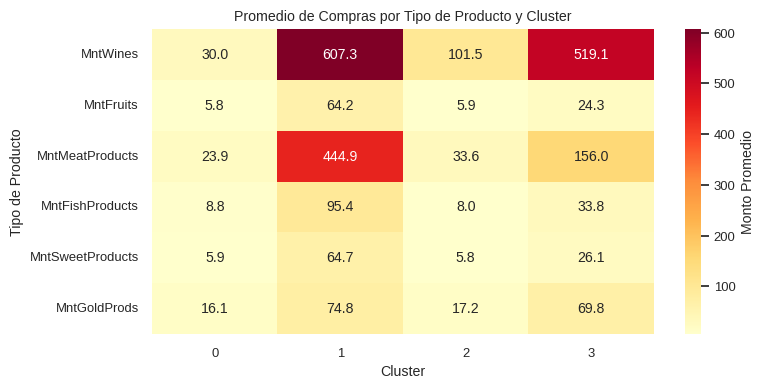

In [230]:
# Variables de productos
product_vars = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

# Promedio de compras por cluster
avg_products = df_clustered.groupby('Cluster_KMeans')[product_vars].mean()

# Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(avg_products.T, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Monto Promedio'})
plt.title('Promedio de Compras por Tipo de Producto y Cluster')
plt.ylabel('Tipo de Producto')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

|  **Cluster**  | **Perfil de compras**                                                                                                              |
| :-----------: | :--------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | Compras moderadas, con énfasis en **carnes y productos premium (GoldProds)**. Bajo consumo de vinos y dulces.                      |
| **Cluster 1** | Grupo de **alto consumo en todos los productos**, especialmente **vinos, carnes y productos premium**. Clientes con gasto elevado. |
| **Cluster 2** | Compras bajas en general, ligeramente más en **carnes y GoldProds**. Grupo de bajo consumo.                                        |
| **Cluster 3** | Compras altas en **vinos y productos premium**, con consumo moderado de carnes y dulces. Grupo de consumo medio-alto.              |

### **Canal de compra**

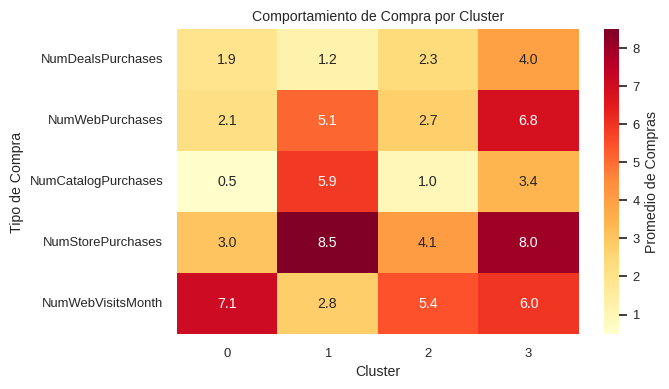

In [231]:
purchase_vars = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
avg_purchase_behavior = df_clustered.groupby('Cluster_KMeans')[purchase_vars].mean()

plt.figure(figsize=(7,4))
sns.heatmap(avg_purchase_behavior.T, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label':'Promedio de Compras'})
plt.title('Comportamiento de Compra por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tipo de Compra')
plt.tight_layout()
plt.show()

|  **Cluster**  | **Perfil de compra**                                                                                                                       |
| :-----------: | :----------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | Clientes moderados, compran en **tienda física y online** de manera equilibrada, pero pocas promociones y visitas web moderadas.           |
| **Cluster 1** | Usuarios que **compran mucho por web y catálogo**, visitan poco la web, y hacen compras presenciales importantes; sensibles a promociones. |
| **Cluster 2** | Clientes de **bajo a moderado consumo**, compran algo en todos los canales, **visitas web moderadas**.                                     |
| **Cluster 3** | Compradores muy activos, especialmente en **web y tienda física**, también realizan promociones frecuentes; cluster de alto engagement.    |


### **Aceptación a campañas**

In [232]:
campaign_vars = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
avg_campaigns = df_clustered.groupby('Cluster_KMeans')[campaign_vars].mean().round(2)
avg_campaigns

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Cluster_KMeans                                                           
0                       0.00          0.00          0.08          0.00   
1                       0.20          0.03          0.08          0.12   
2                       0.01          0.01          0.05          0.04   
3                       0.04          0.02          0.08          0.14   

                AcceptedCmp5  
Cluster_KMeans                
0                       0.00  
1                       0.25  
2                       0.00  
3                       0.03

|  **Cluster**  | **Perfil de aceptación de campañas**                                                       |
| :-----------: | :----------------------------------------------------------------------------------------- |
| **Cluster 0** | Muy poco receptivo a todas las campañas, prácticamente no acepta ninguna.                  |
| **Cluster 1** | Bastante receptivo, especialmente a **Cmp1 y Cmp5**, con aceptación moderada en las demás. |
| **Cluster 2** | Receptividad baja a todas las campañas, ligeramente más a **Cmp4**.                        |
| **Cluster 3** | Receptivo a **Cmp4 y Cmp3**, aceptación moderada en las demás campañas.                    |


### **Quejas y respuestas a la oferta en la última campaña**

In [233]:
binary_vars = ['Complain','Response']
avg_binary = df_clustered.groupby('Cluster_KMeans')[binary_vars].mean().round(2)

# Mostrar tabla
display(avg_binary)

Complain  Response
Cluster_KMeans                    
0                   0.01      0.12
1                   0.01      0.28
2                   0.01      0.05
3                   0.01      0.15

| **Cluster** | **Quejas (Complain)** | **Respuesta (Response)** |
| :---------: | :-------------------: | :----------------------: |
|    **0**    |    Muy pocas quejas   |   Baja respuesta (12%)   |
|    **1**    |    Muy pocas quejas   |   Mayor respuesta (28%)  |
|    **2**    |    Muy pocas quejas   |  Muy baja respuesta (5%) |
|    **3**    |    Muy pocas quejas   | Respuesta moderada (15%) |


**Otras**

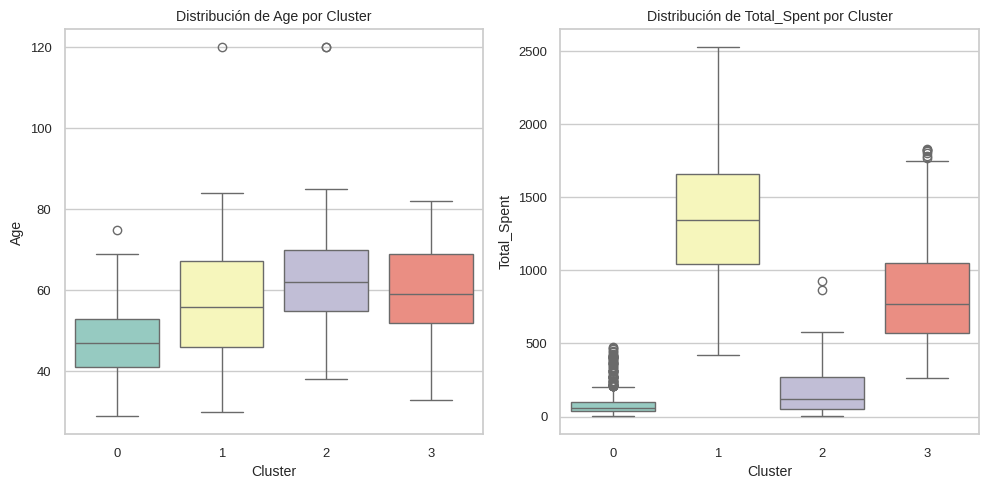

In [234]:
# Variables a graficar
cont_vars = ['Age', 'Total_Spent']

# Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, var in enumerate(cont_vars):
    sns.boxplot(data=df_clustered, x='Cluster_KMeans', y=var, palette='Set3', ax=axes[i])
    axes[i].set_title(f'Distribución de {var} por Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

| Cluster | Edad (Age)            | Gasto Total (Total_Spent) |
| ------- | --------------------- | ------------------------- |
| 0       | Jóvenes               | Bajo gasto                |
| 1       | Adultos de edad media | Muy alto gasto            |
| 2       | Mayores               | Gasto moderado            |
| 3       | Adultos               | Gasto alto                |



-----

**Resumen - Caracteristicas de cada cluster**

| Cluster | Educación   | Estado civil     | Kids         | Ingreso  | Edad    | Tipo de productos | Compras / Canales | Campañas | Reclamaciones / Respuesta |
| ------- | ----------- | ---------------- | ------------ | -------- | ------- | ----------------- | ----------------- | -------- | ------------------------- |
| 0       | Graduación  | Married/Single   | Niños        | Bajo     | Jóvenes | Vinos/Carne       | Bajo              | Pocas    | Baja                      |
| 1       | Posgrado    | Married/Together | Pocos        | Muy alto | Adultos | Todo              | Alto              | Varias   | Alta                      |
| 2       | Posgrado    | Married/Divorced | Adolescentes | Medio    | Mayores | Vinos/Carne       | Medio             | Pocas    | Muy baja                  |
| 3       | Graduación+ | Married/Together | Adolescentes | Alto     | Adultos | Variado           | Alto              | Varias   | Media                     |


# **Conclusiones**

La segmentación muestra cuatro perfiles de clientes bien definidos y con impacto directo en la gestión comercial.
El **grupo 1** concentra el mayor poder adquisitivo (ingreso >70.000), registra el gasto total más alto y la mayor aceptación de campañas; el **grupo 3** se ubica en nivel medio-alto (~ 58.000) con alta actividad multicanal; el **grupo 2**, de ingreso medio (~ 45.000), reúne clientes de mayor edad con gasto moderado y baja interacción promocional; y el **grupo 0**, de ingreso bajo-medio (~30.000), mantiene niveles reducidos de gasto y alta sensibilidad al precio.

Estas diferencias también se reflejan por categoría (vinos, carnes y productos “gold”) y por canal (web, tienda y catálogo), lo que confirma que el comportamiento de compra no es uniforme y que el aporte de valor por segmento es heterogéneo.

Desde el punto de vista práctico, el modelo jerárquico mostró la mejor separación entre los grupos, pero el modelo K-Means con cuatro clusters resultó más útil para el negocio, ya que permite entender mejor los distintos tipos de clientes y comunicar los resultados de forma clara.
Por su parte, DBSCAN sirvió principalmente para identificar casos atípicos o comportamientos poco comunes, más que para definir una segmentación comercial completa.

Con el apoyo del análisis PCA y la coincidencia entre los tres modelos, los resultados son consistentes: se observa una clara diferencia socioeconómica entre los clientes, junto con variaciones en los canales de compra y en la respuesta a las campañas, que se mantienen sin importar el método utilizado.

En la práctica, el estudio ofrece a la empresa una visión clara y confiable de sus clientes, agrupados en cuatro perfiles con diferencias marcadas en ingresos, gastos y hábitos de compra. Estos resultados sirven como punto de partida para entender mejor cómo se comportan los distintos tipos de clientes y para apoyar futuras decisiones comerciales basadas en datos.

## **Recomendaciones**

Los cuatro grupos identificados no solo difieren en su nivel de ingreso, sino también en su manera de comprar, en los canales que prefieren y en cómo reaccionan ante las promociones. Esto implica que las estrategias deben adaptarse a la realidad y necesidades de cada uno para aumentar tanto las ventas como la fidelidad.

**En cuanto a productos y promociones**:

* El grupo de mayor ingreso y gasto constante es el público ideal para consolidar la línea premium de la empresa. Este segmento valora la exclusividad y la calidad, por lo que resulta más efectivo ofrecerle lanzamientos limitados, experiencias personalizadas y beneficios por recompra, antes que descuentos frecuentes.

* El grupo de ingreso medio-alto muestra una conducta activa en distintos canales y está más abierto a probar nuevos productos; con ellos, las promociones combinadas y los paquetes de valor pueden estimular la recompra.

* El grupo de ingreso medio, de mayor edad y menor respuesta promocional, se inclina por la practicidad y el servicio; su fidelidad puede fortalecerse con beneficios silenciosos, como programas de puntos o atención prioritaria.

* Por último, el grupo de ingreso bajo-medio, sensible al precio, responderá mejor a ofertas directas y mensajes centrados en el ahorro y la conveniencia, siempre cuidando los márgenes del negocio.

**En cuanto a canales de compra:**

Los resultados muestran que no existe un patrón único: mientras los clientes de mayor valor combinan web, tienda y catálogo, los de ingresos medios y bajos prefieren canales tradicionales o presenciales. Por lo tanto, la estrategia debe mantener la omnicanalidad, pero con diferente énfasis según el segmento.

* En los grupos de alto valor se deben potenciar las compras online con beneficios exclusivos, mientras que en los segmentos medios y bajos conviene fortalecer la experiencia en tienda física, optimizando la atención y la comunicación visual del punto de venta.

**Respecto a las campañas y comunicación:**
El tono y la frecuencia deben variar.

* Los clientes de mayor valor no requieren presión promocional, sino reconocimiento y trato diferenciado.
* Los grupos intermedios responden bien a incentivos que combinan precio y utilidad, como descuentos por segunda compra o regalos funcionales.
* El grupo más sensible al precio necesita mensajes claros, cortos y con un beneficio inmediato.

Las campañas deben calendarizarse por momento de consumo y no de manera genérica, de forma que cada grupo reciba estímulos en el punto exacto de su ciclo de compra.

**Sobre los clientes prioritarios**

Los grupos de ingresos altos y medio-altos deben considerarse de alta prioridad por su aporte a las ventas y por el potencial de fidelización que tienen. Representan la base del crecimiento rentable de la empresa y requieren mantenimiento constante a través de programas exclusivos y seguimiento personalizado.

Por otro lado, los grupos de ingreso medio y bajo demandan estrategias más cuidadosas: el primero puede estabilizar sus compras con un acompañamiento más cercano, mientras que el segundo necesita una gestión eficiente de costos para mantener su participación sin comprometer los márgenes.

---

A largo plazo, la empresa debería consolidar un modelo de relación continua basado en datos. Cada cliente debe estar identificado en el sistema con su cluster correspondiente para medir resultados por segmento y actualizar la estrategia según los cambios de comportamiento.

El análisis sugiere oportunidades para diversificar el portafolio, lanzar líneas ajustadas a cada perfil y diseñar campañas más predictivas. Reentrenar periódicamente el modelo y evaluar indicadores como retención, frecuencia y ticket promedio permitirá mantener actualizada la lectura del mercado. De esta forma, la empresa podrá avanzar hacia un marketing verdaderamente personalizado, donde cada acción esté sustentada en evidencia y cada grupo reciba exactamente lo que necesita para seguir eligiendo la marca.